In [149]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Import The Data-Set

In [150]:
# import train data
train = pd.read_excel('capstone_train.xlsx')

# import test data
#test = pd.read_excel('capstone_test.xlsx')

 # Data Understanding

# Read the Dataset

In [151]:
#Show the first 10 row of train data set
train.head(10)

Loan_ID  Loan_Amount_Requested Length_Employed Home_Owner  \
0  10000001.0                 7000.0        < 1 year       Rent   
1  10000002.0                30000.0         4 years   Mortgage   
2  10000003.0                24725.0         7 years   Mortgage   
3  10000004.0                16000.0        < 1 year        NaN   
4  10000005.0                17000.0         8 years        Own   
5  10000006.0                 4500.0         2 years       Rent   
6  10000007.0                18075.0         4 years       Rent   
7  10000008.0                15000.0        < 1 year       Rent   
8  10000009.0                 6300.0       10+ years       Rent   
9  10000010.0                30000.0       10+ years        Own   

   Annual_Income           Income_Verified     Purpose_Of_Loan  \
0        68000.0              not verified                 car   
1            NaN         VERIFIED - income  debt_consolidation   
2        75566.4  VERIFIED - income source  debt_consolidation   
3        56160.0  VERIFIED - income source  debt_consolidation   
4        96000.0  VERIFIED - income source  debt_consolidation   
5        30000.0  VERIFIED - income source         credit_card   
6        85000.0         VERIFIED - income  debt_consolidation   
7       115000.0         VERIFIED - income  debt_consolidation   
8            NaN              not verified  debt_consolidation   
9       163000.0         VERIFIED - income  debt_consolidation   

   Debt_To_Income  Inquiries_Last_6Mo  Months_Since_Deliquency  \
0           18.37                 0.0                      NaN   
1           14.93                 0.0                     17.0   
2           15.88                 0.0                      NaN   
3           14.34                 3.0                      NaN   
4           22.17                 1.0                      NaN   
5           10.88                 1.0                      NaN   
6            5.65                 0.0                      NaN   
7            7.97                 1.0                     16.0   
8           16.12                 3.0                      NaN   
9           11.13                 0.0                      NaN   

   Number_Open_Accounts  Total_Accounts  Gender  Interest_Rate  
0                   9.0            14.0  Female            1.0  
1                  12.0            24.0  Female            3.0  
2                  12.0            16.0    Male            3.0  
3                  16.0            22.0    Male            3.0  
4                  19.0            30.0  Female            1.0  
5                  12.0            15.0    Male            3.0  
6                   9.0            12.0    Male            3.0  
7                  25.0            31.0  Female            2.0  
8                   8.0             9.0  Female            3.0  
9                  24.0            43.0    Male            1.0

# Size

In [152]:
r,c=train.shape
print("There are {} Row and {} Columns is the Data-set".format(r,c))

There are 164309 Row and 14 Columns is the Data-set


# Data-Type

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  float64
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  float64
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  float64
 11  Total_Accounts           164309 non-null  float64
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  float64
dtypes: f

In [154]:
# The target variable 'Interest_Rate' has 'object' datatype, it is already in encoded form.

In [155]:
cat=train.select_dtypes(include='object') 
num=train.select_dtypes(include=np.number)
print("There are {} category column".format(len(cat.columns)))
print("There are {} Numerical column".format(len(num.columns)))

There are 5 category column
There are 9 Numerical column


# Statistic

In [156]:
summary=train.describe()
five_summary=summary.loc[['min','25%','50%','75%','max']]
five_summary

Loan_ID  Loan_Amount_Requested  Annual_Income  Debt_To_Income  \
min  10000001.0                  500.0         4000.0            0.00   
25%  10041078.0                 8000.0        45000.0           11.37   
50%  10082155.0                12075.0        63000.0           16.84   
75%  10123232.0                20000.0        88697.5           22.78   
max  10164309.0                35000.0      7500000.0           39.99   

     Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
min                 0.0                      0.0                   0.0   
25%                 0.0                     16.0                   8.0   
50%                 0.0                     31.0                  10.0   
75%                 1.0                     50.0                  14.0   
max                 8.0                    180.0                  76.0   

     Total_Accounts  Interest_Rate  
min             2.0            1.0  
25%            17.0            2.0  
50%            23.0            2.0  
75%            32.0            3.0  
max           156.0            3.0

In [157]:
#  transposed 5 point summary of the data.
#  here min. of loan ammount requested is 500  where maximum ammount requested is 35000 
# min of Annual income is 4000 where as maximum 7500000
# min of Debt_To_Income is 0 while max is 39.99
# min of Inquiries_Last_6Mo is 0 while max is 8
# min of Months_Since_Deliquency is 0 where as max 180.00
# min of Number_Open_Accounts of 0 where max 76
# min of Total_Accounts 2 where max 156.00
# min of Interest_Rate is 1.0 where max is 3.00 

In [158]:
for i in cat:
    counts = cat[i].value_counts()
    percentages = round((counts / len(cat)) * 100, 2)
    summary = pd.DataFrame({'counts': counts, 'percentages': percentages})
    print(i)
    print(summary)
    print()

Length_Employed
           counts  percentages
10+ years   52915        32.20
2 years     14620         8.90
3 years     12974         7.90
< 1 year    12805         7.79
5 years     10814         6.58
1 year      10422         6.34
4 years      9784         5.95
7 years      9308         5.66
6 years      9094         5.53
8 years      7917         4.82
9 years      6285         3.83

Home_Owner
          counts  percentages
Mortgage   70345        42.81
Rent       56031        34.10
Own        12525         7.62
Other         49         0.03
None          10         0.01

Income_Verified
                          counts  percentages
VERIFIED - income          59421        36.16
VERIFIED - income source   53015        32.27
not verified               51873        31.57

Purpose_Of_Loan
                    counts  percentages
debt_consolidation   97101        59.10
credit_card          36684        22.33
home_improvement      9269         5.64
other                 8346         5.08
ma

In [159]:
# They are 32%  employed are working more than 10+ years
# the moslty loan is toked for mortgage 42% and for the rent 34%
# 

# Missing  Values

In [160]:
#sum of total missing values and sort to desending
Total = train.isnull().sum().sort_values(ascending=False)          
#total in percent of missing value
Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   
#create a Dataframe to show missing value sum and precent format 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Months_Since_Deliquency  88379                     53.788289
Home_Owner               25349                     15.427639
Annual_Income            25102                     15.277313
Length_Employed           7371                      4.486060
Loan_ID                      0                      0.000000
Loan_Amount_Requested        0                      0.000000
Income_Verified              0                      0.000000
Purpose_Of_Loan              0                      0.000000
Debt_To_Income               0                      0.000000
Inquiries_Last_6Mo           0                      0.000000
Number_Open_Accounts         0                      0.000000
Total_Accounts               0                      0.000000
Gender                       0                      0.000000
Interest_Rate                0                      0.000000

In [161]:
# Months_Since_Deliquency contain 53% of null values which is very high hence we need to treat all of them by significant approach
# Home_Owner contains 15% while Annual_Income 15% and Length_Employed is 4%

In [162]:
print("Total Missing Null in data-set is:",train.isnull().sum().sum()) 

Total Missing Null in data-set is: 146201


In [163]:
n=np.round(train.isnull().sum().sum()/(train.shape[0]*train.shape[1])*100,2) 
print(n,"% of Total Missing Value")

6.36 % of Total Missing Value


# Skewness

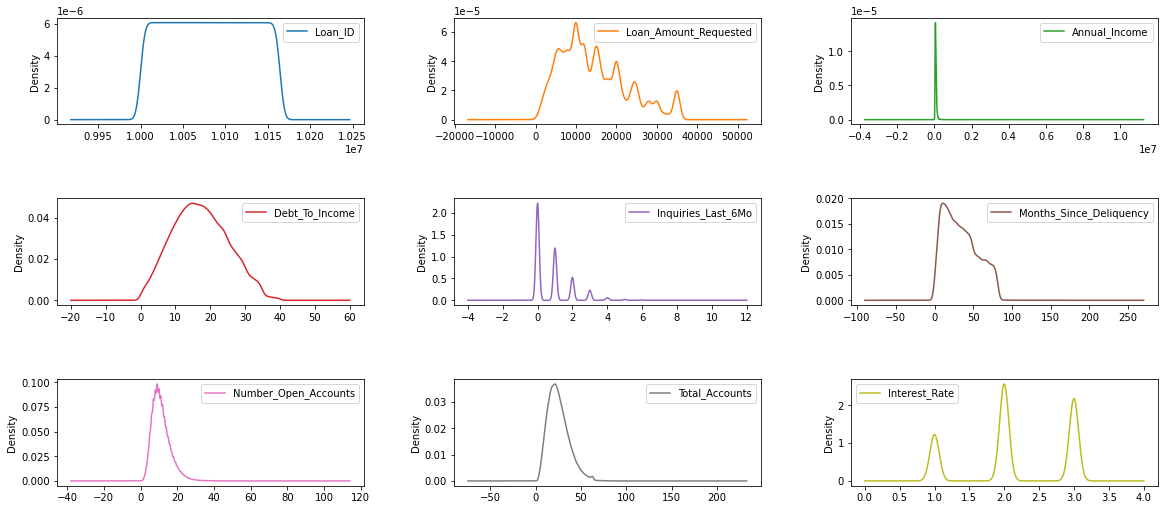

In [164]:
# Plot the skewness 
plt.rcParams["figure.figsize"] = [17,8]
df_num = train.select_dtypes(include = np.number )
df_num.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout(pad = 4)
plt.show()

In [165]:
#Skewness values
original_skew=train.skew().sort_values(ascending=False)
original_skew

Annual_Income              40.225306
Inquiries_Last_6Mo          1.550867
Number_Open_Accounts        1.164084
Total_Accounts              0.817347
Loan_Amount_Requested       0.727216
Months_Since_Deliquency     0.460900
Debt_To_Income              0.192204
Loan_ID                     0.000000
Interest_Rate              -0.260932
dtype: float64

### inference - 
'Annual_Income' has a highly asymmetric distribution that is left-skewed. This means that the distribution has a longer tail towards the lower values and a majority of the observations are clustered towards the higher values.

'Inquiries_Last_6Mo' and 'Number_Open_Accounts' are also left-skewed. This implies that the distribution has a longer tail towards the lower values and a majority of the observations are clustered towards the higher values.

'Interest_Rate' and 'Loan_Amount_Requested' have a right-skewed distribution. This indicates that the distribution has a longer tail towards the higher values and a majority of the observations are clustered towards the lower values.

# Standard Deviation

In [166]:
original_std=train.std().sort_values(ascending=False)
original_std

Annual_Income              60377.498294
Loan_ID                    47432.067027
Loan_Amount_Requested       8281.868700
Months_Since_Deliquency       21.761180
Total_Accounts                11.583067
Debt_To_Income                 7.845083
Number_Open_Accounts           4.991813
Inquiries_Last_6Mo             1.034747
Interest_Rate                  0.738364
dtype: float64

# Mean

In [167]:
original_mean=train.mean().sort_values(ascending=False)
original_mean

Loan_ID                    1.008216e+07
Annual_Income              7.333116e+04
Loan_Amount_Requested      1.434934e+04
Months_Since_Deliquency    3.422936e+01
Total_Accounts             2.506767e+01
Debt_To_Income             1.720719e+01
Number_Open_Accounts       1.119382e+01
Interest_Rate              2.158951e+00
Inquiries_Last_6Mo         7.816979e-01
dtype: float64

# UNIVARIATE ANALYSIS for numerical variable

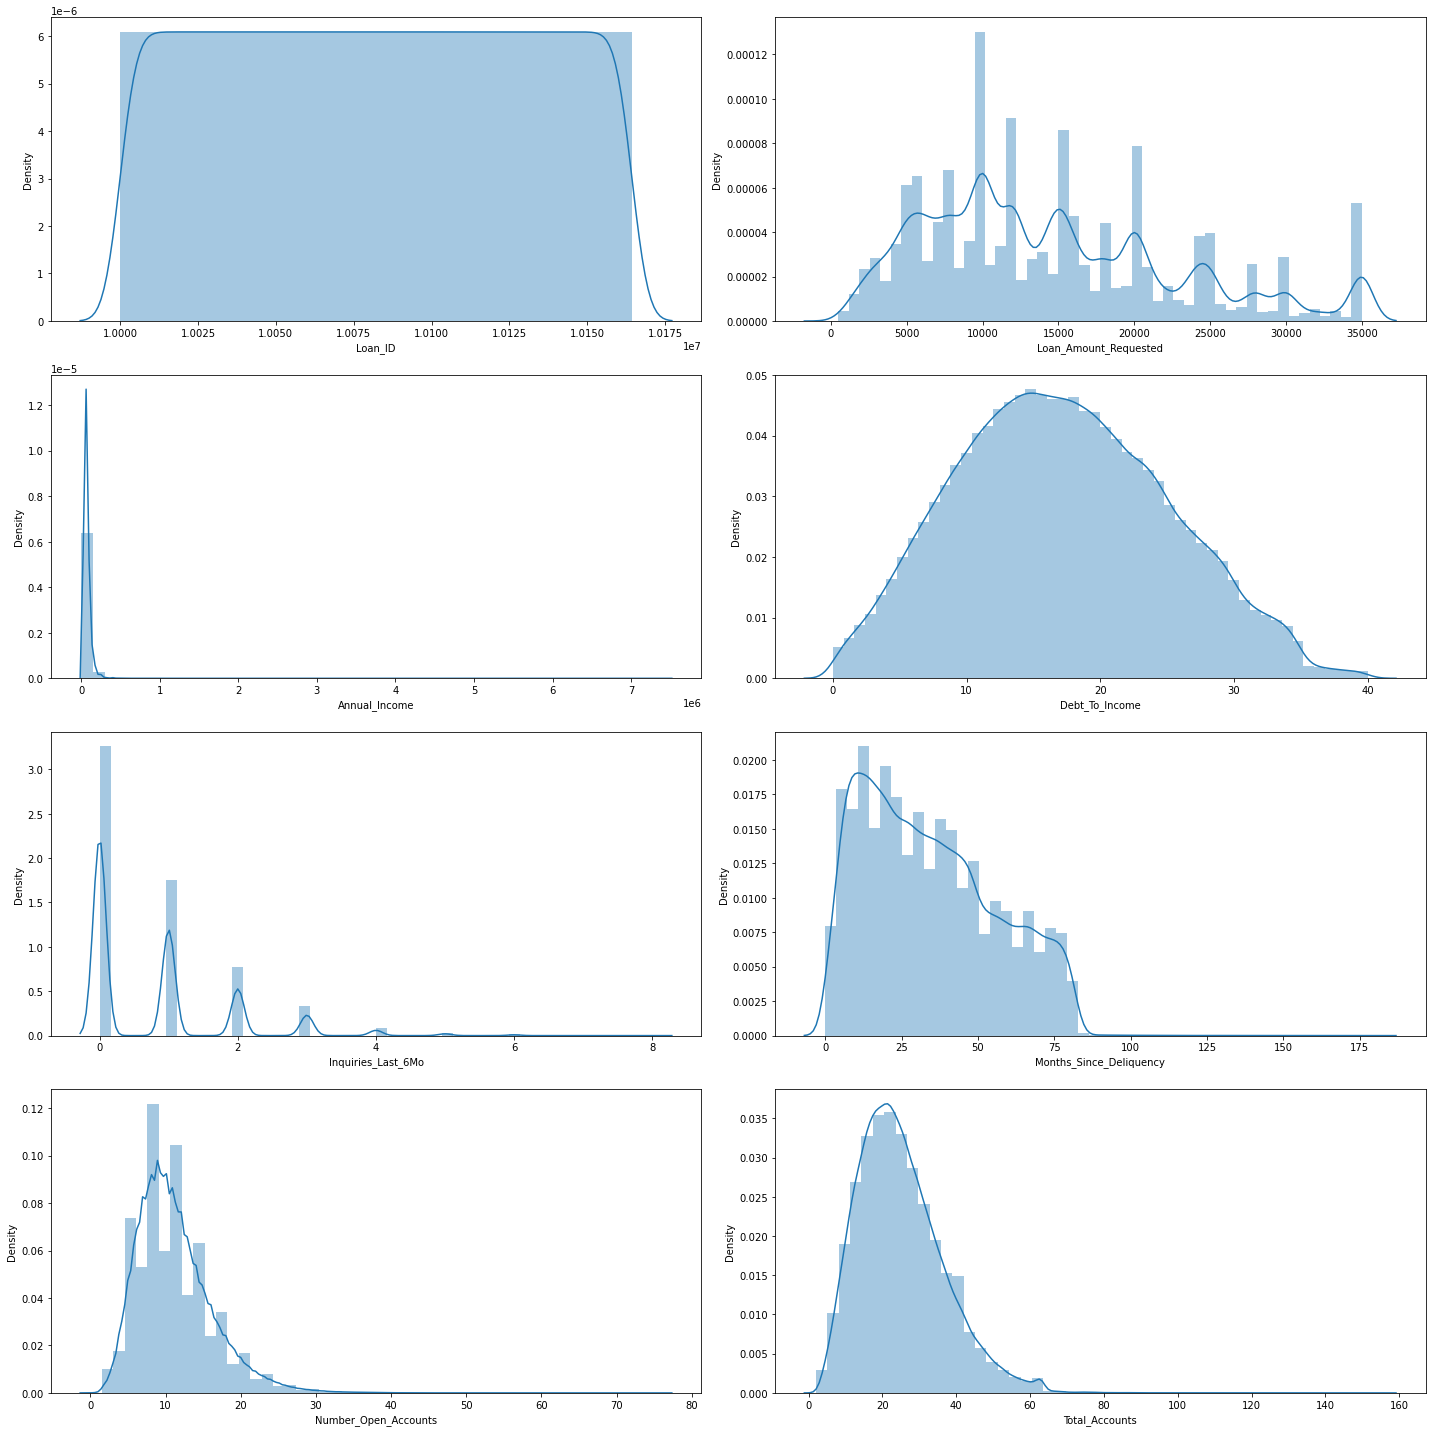

In [168]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i,a in zip(train.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(train[i],ax=a)
    plt.tight_layout()
    fig.show() 

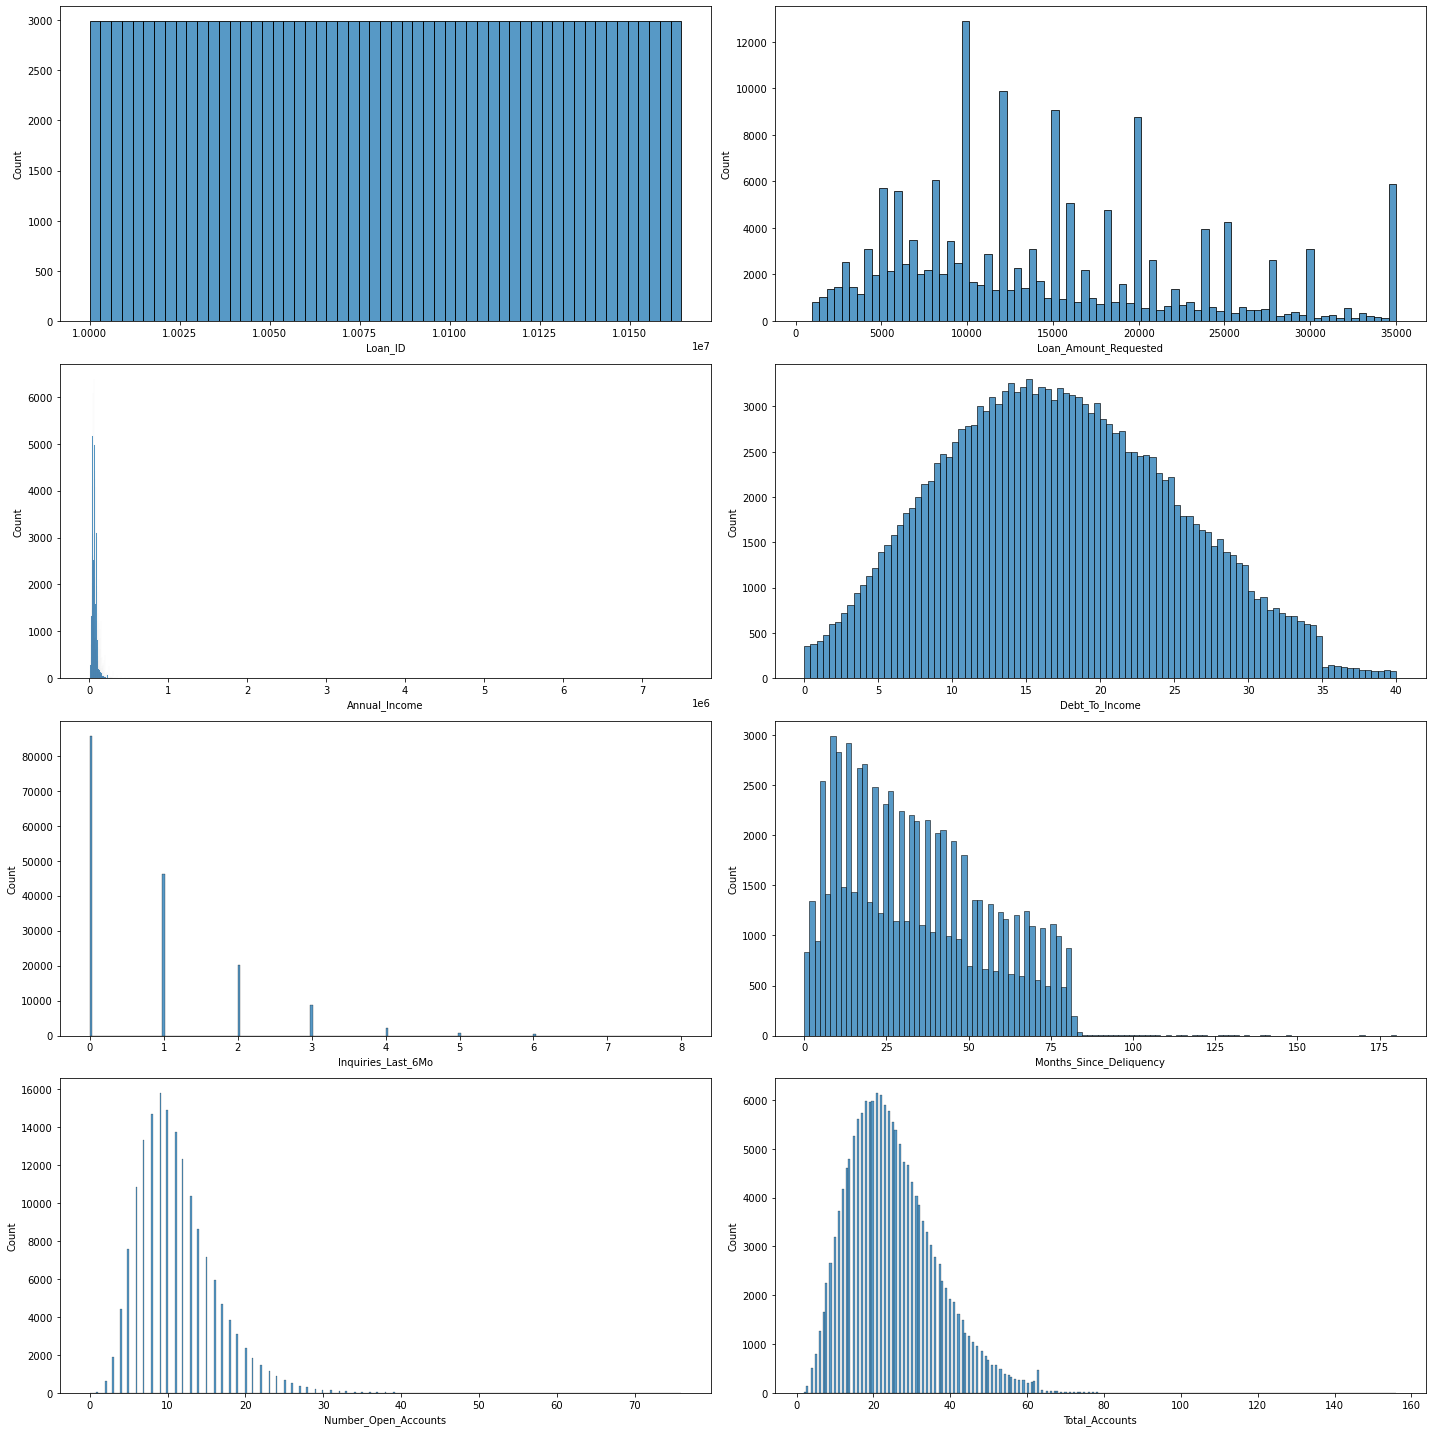

In [169]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i,a in zip(train.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.histplot(train[i],ax=a)
    plt.tight_layout()
    fig.show()

# UNIVARIATE ANALYSIS for categorical variable

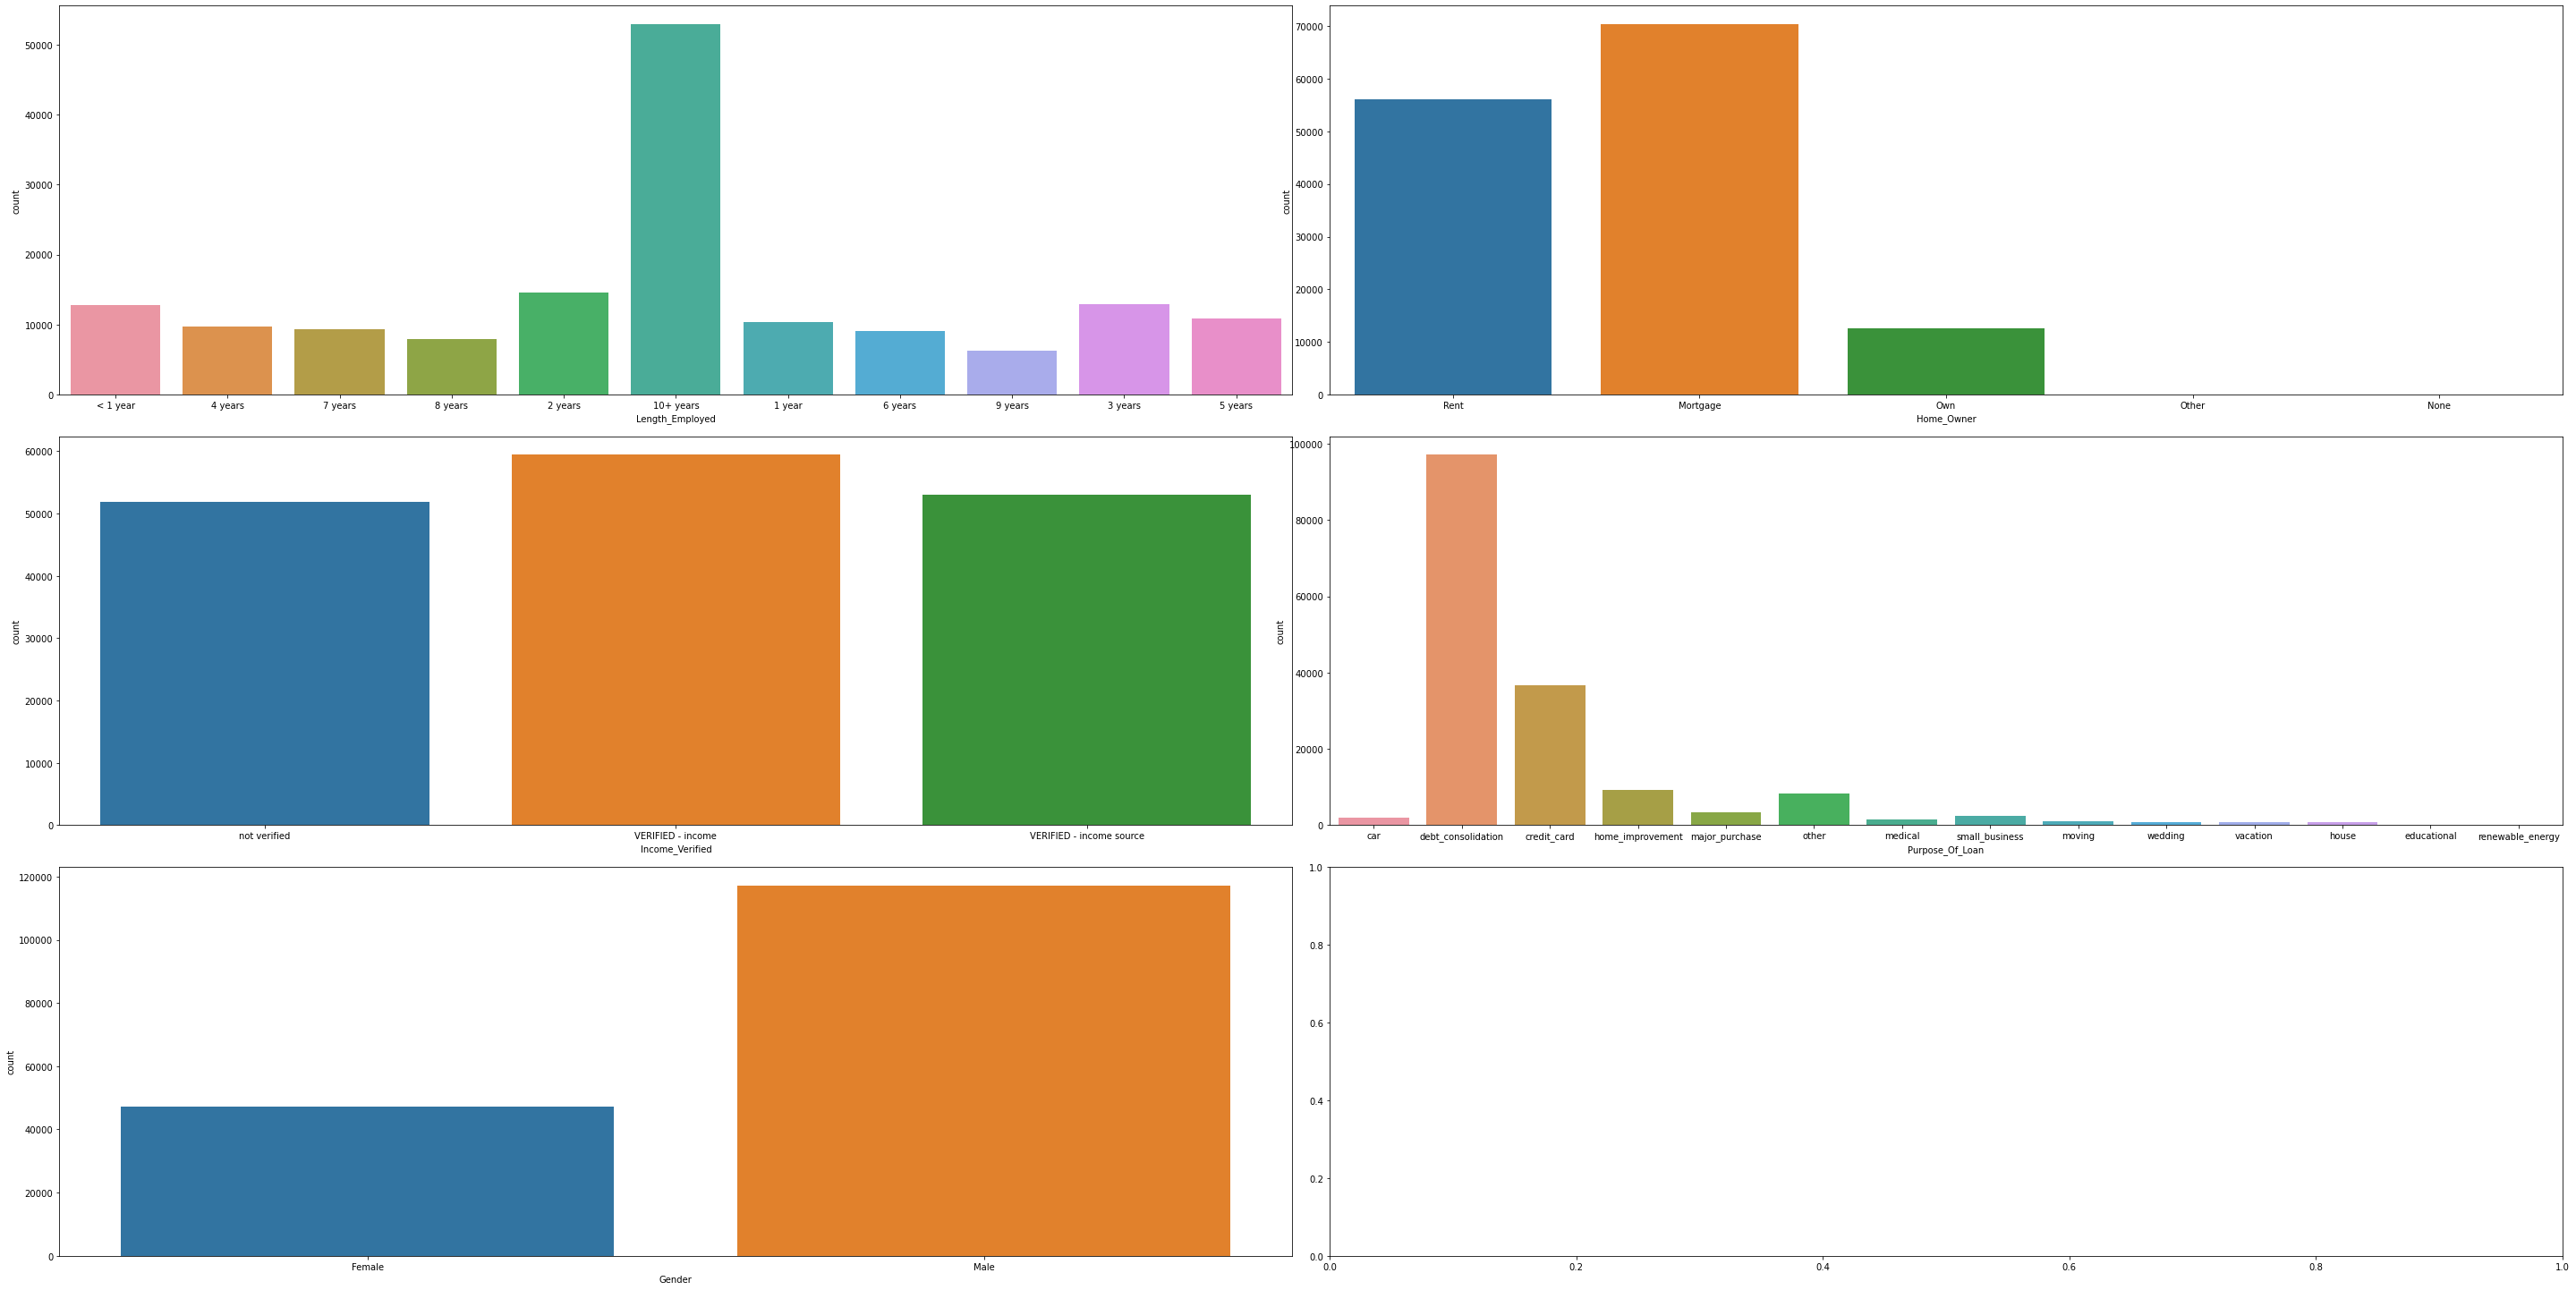

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

In [170]:
fig,ax=plt.subplots(3,2,figsize=(40,20))
for i,a in zip(train.select_dtypes(exclude=np.number).columns,ax.flatten()):
    sns.countplot(train[i],ax=a) 
    plt.tight_layout() 
    plt.figure() 

# Inference-

#Based on the information provided, we can infer the following:

#Among the different categories in 'Length_Employed', '10+ years' has the highest number of entries.

#Majority of the entries in 'Home_Owner' belong to the 'Mortgage' category.

#'VERIFIED - income' is the most common category in 'Income_Verified'.

#'Debt consolidation' is the most common category in 'Purpose_Of_Loan', followed by 'credit_card'.

#'Male' is the dominant gender class among the entries in the dataset.

#The dataset is divided into two parts, 'train' and 'test'. The 'train' part contains the data that will be used for training machine learning models, while the 'test' part contains the data that will be used for evaluating the performance of the models.

#These insights can be useful for feature engineering, exploratory data analysis, and modeling in the context of a loan prediction or credit scoring problem. For instance, knowing that debt consolidation and credit card are the most common loan purposes can help identify relevant features for prediction models. Similarly, knowing that males are the dominant gender class can help in identifying potential biases in the data and model evaluation.

# Bivariate analysis of numeric vaiable

<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Total_Accounts'>

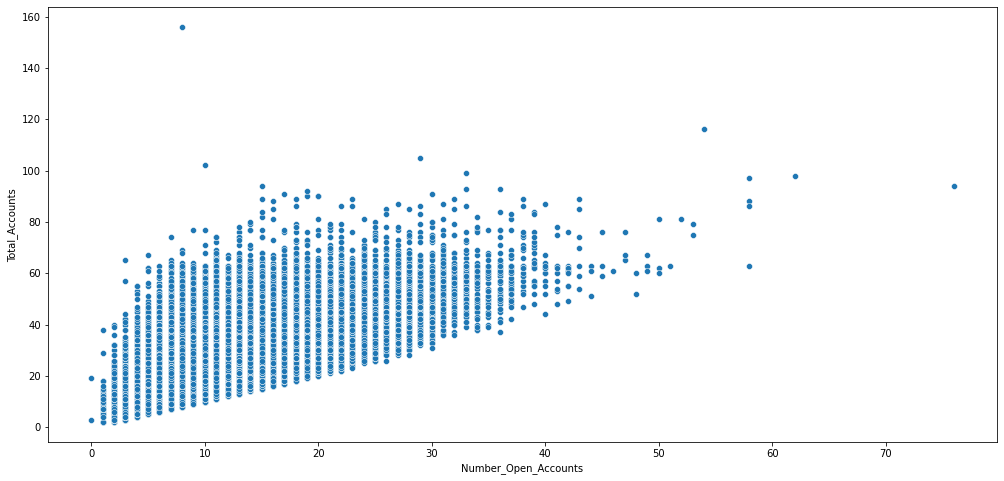

In [171]:
sns.scatterplot(train.Number_Open_Accounts,train.Total_Accounts)

### inference - 
 a positive correlation between 'Number_Open_Accounts' and 'Total_Accounts' indicates that as the number of open accounts increases, the total number of accounts also tends to increase. This correlation makes intuitive sense because the total number of accounts is simply the sum of all open and closed accounts. Therefore, if the number of open accounts increases, the total number of accounts is likely to increase as well.

# Bivariate analysis of Categorical vaiable

<AxesSubplot:xlabel='Length_Employed'>

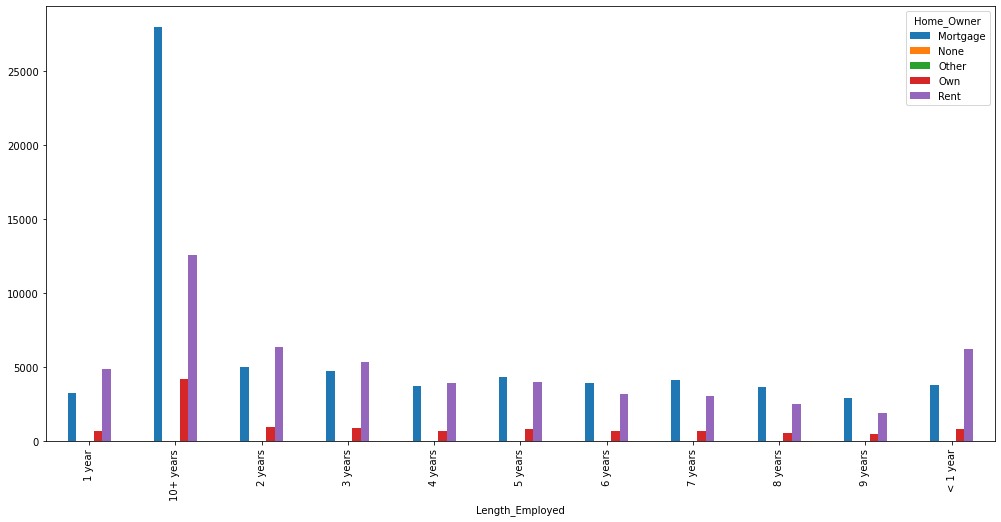

In [172]:
pd.crosstab(train.Length_Employed,train.Home_Owner).plot(kind='bar')

### inference - 
The category '10+ years' is the most common value in the 'Length_Employed' feature, indicating that a significant number of individuals in the dataset have been employed for more than 10 years.

Among the different categories in 'Home_Owner', 'Mortgage' has the highest share, indicating that a majority of individuals in the dataset own a mortgaged property.

The category '9 years' has the lowest value in the 'Length_Employed' feature, indicating that there are fewer individuals who have been employed for 9 years compared to the other categories.

<AxesSubplot:xlabel='Length_Employed'>

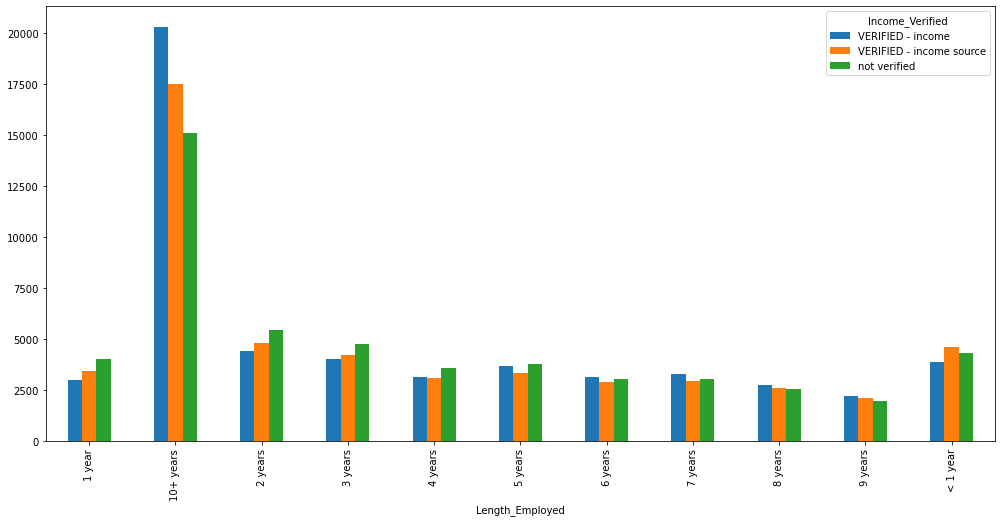

In [173]:
pd.crosstab(train.Length_Employed,train.Income_Verified).plot(kind='bar')

### inference - 
The category '10+ years' is the most common value in the 'Length_Employed' feature, indicating that a significant number of individuals in the dataset have been employed for more than 10 years.

Among the different categories in 'Income_Verified', 'VERIFIED - income' has the highest share, indicating that a majority of individuals in the dataset have their income verified.

The category '9 years' has the lowest value in the 'Length_Employed' feature, indicating that there are fewer individuals who have been employed for 9 years compared to the other categories.

<AxesSubplot:xlabel='Length_Employed'>

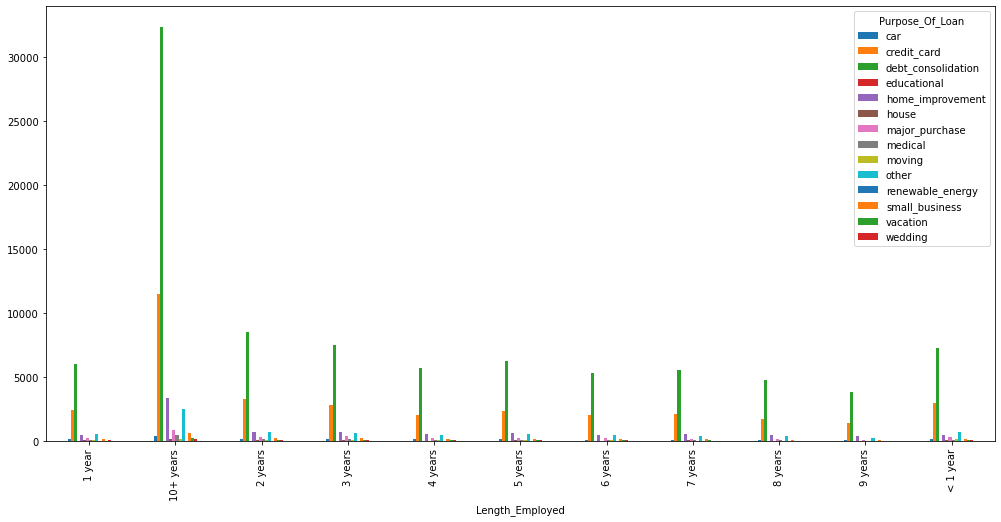

In [174]:
pd.crosstab(train.Length_Employed,train.Purpose_Of_Loan).plot(kind='bar')

### inference - 
10+ years dominating length employed where debt_consolidation has majority where 9 years has lowest value

<AxesSubplot:xlabel='Length_Employed'>

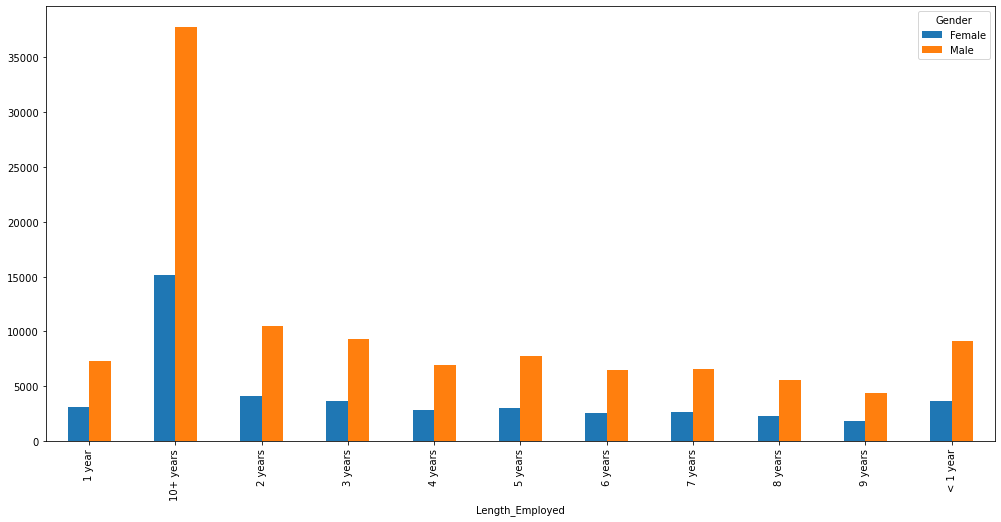

In [175]:
pd.crosstab(train.Length_Employed,train.Gender).plot(kind='bar')

### inference - 
here 10+ years of experiance clearly dominating class and males are majority in that class 9 years has lowest value 

# Bivariate Analysis

<AxesSubplot:xlabel='Length_Employed'>

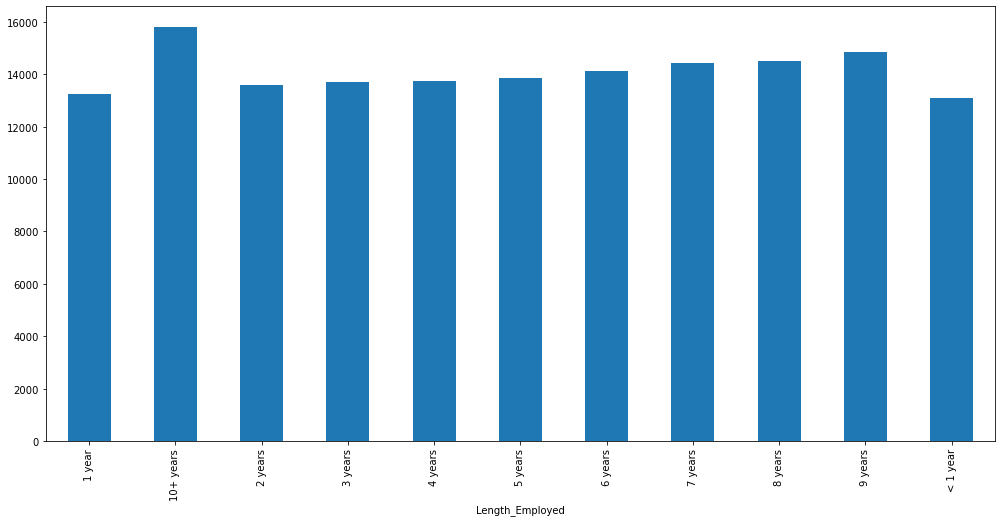

In [176]:
train.groupby('Length_Employed')['Loan_Amount_Requested'].mean().plot(kind='bar')

### inference - 
This indicates that individuals who have been employed for more than 10 years tend to request higher loan amounts compared to other employment categories.

The category '9 years' has the second-highest average value of loan amount requested, which is higher than the values for most other employment categories.

The category '< 1 year' has the lowest average value of loan amount requested, which is $12,500. This indicates that individuals who have been employed for less than a year tend to request lower loan amounts compared to other employment categories.

<AxesSubplot:xlabel='Length_Employed'>

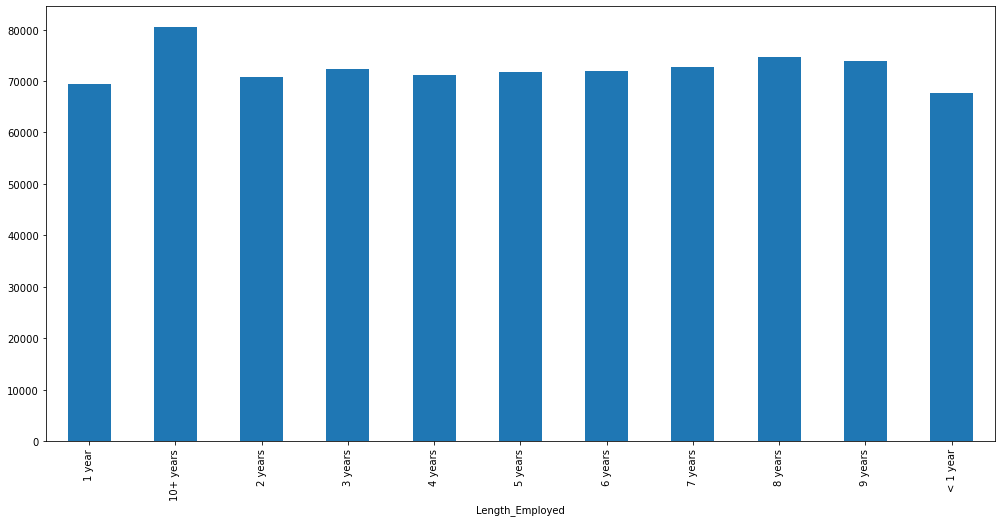

In [177]:
train.groupby('Length_Employed')['Annual_Income'].mean().plot(kind='bar')

The category '10+ years' has the highest average annual income, which is $8000. This indicates that individuals who have been employed for more than 10 years tend to have higher annual incomes compared to other employment categories.

The categories '8 years' and '9 years' have the second-highest average annual income values, indicating that individuals who have been employed for these durations tend to have relatively high annual incomes.

The category '< 1 year' has the lowest average annual income value, which is $6800. This indicates that individuals who have been employed for less than a year tend to have lower annual incomes compared to other employment categories.

<AxesSubplot:xlabel='Income_Verified'>

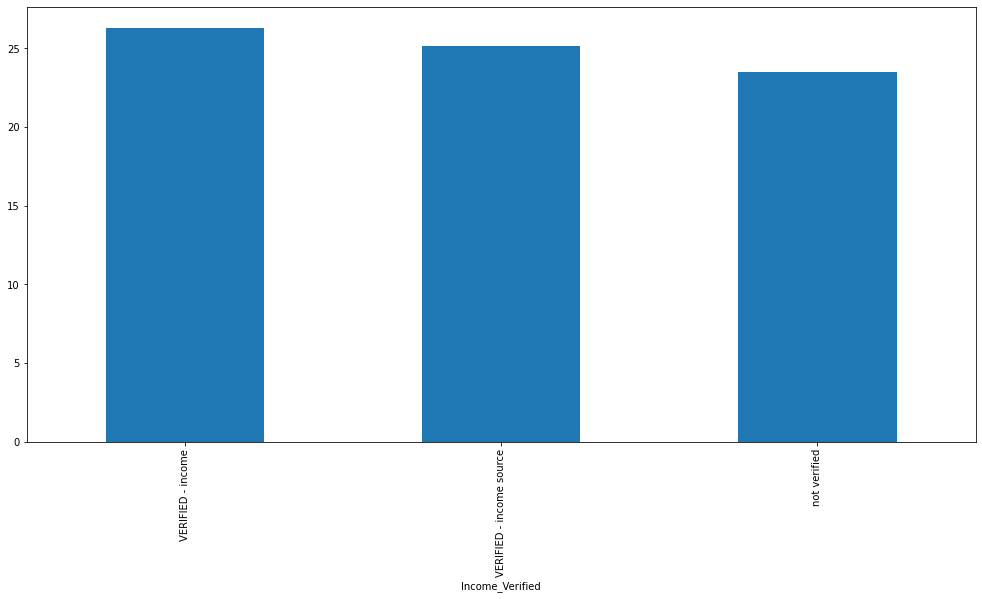

In [178]:
train.groupby('Income_Verified')['Total_Accounts'].mean().plot(kind='bar')

The category 'Verified - income' has the highest average total accounts value, which is 25. This indicates that individuals who have their income verified tend to have more total accounts compared to other income verification categories.

The category 'Verified - income source' has the second-highest average total accounts value, which is 23. This indicates that individuals who have their income and its source verified tend to have relatively high total accounts.

The category 'Not Verified' has the lowest average total accounts value, which is 22. This indicates that individuals who have not had their income verified tend to have fewer total accounts compared to other income verification categories.

<AxesSubplot:xlabel='Income_Verified'>

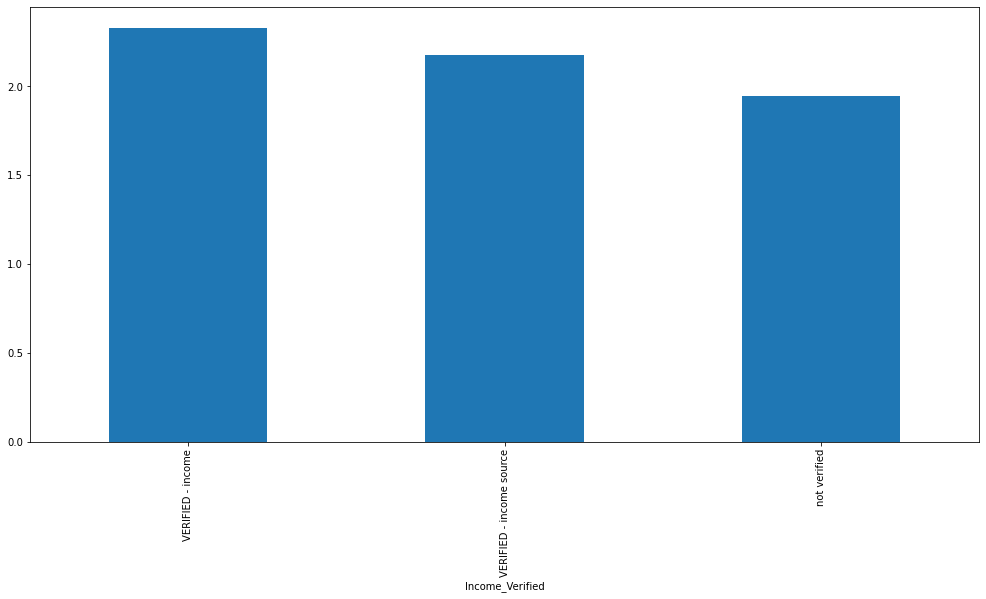

In [179]:
train.groupby('Income_Verified')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
The category 'Verified - income' is the dominating class in the 'Income_Verified' feature. This indicates that a large number of loan applicants have their income verified.

The category 'Verified - income source' is the second-most frequent class in the 'Income_Verified' feature. This indicates that a significant number of loan applicants have both their income and its source verified.

The category 'Not Verified' is the least frequent class in the 'Income_Verified' feature. This indicates that a small number of loan applicants do not have their income verified.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

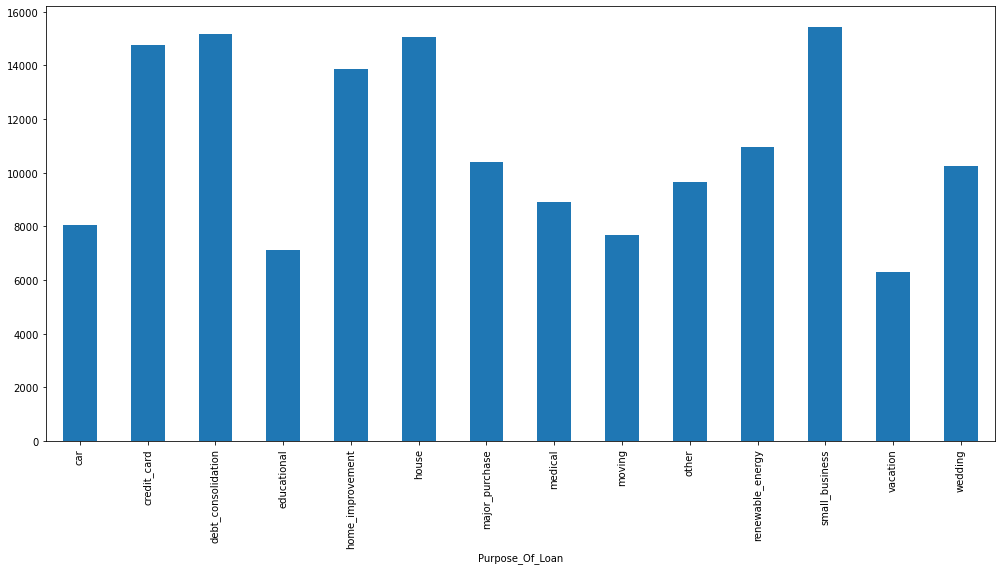

In [180]:
train.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Purpose_Of_Loan'>

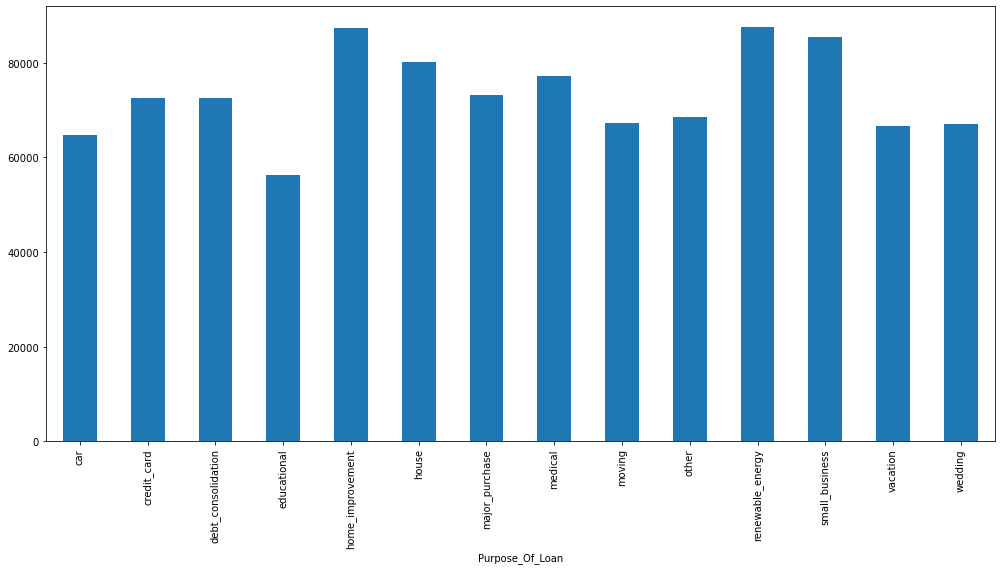

In [181]:
train.groupby('Purpose_Of_Loan')['Annual_Income'].mean().plot(kind='bar')

### inference - 
The category 'Debt Consolidation' is the dominating purpose of loan in the dataset. This indicates that a large number of loan applicants applied for a loan to consolidate their existing debts.

The category 'Credit Card' is the second-most frequent purpose of loan in the dataset. This indicates that a significant number of loan applicants applied for a loan to pay off their credit card debt.

The remaining categories such as 'Home Improvement', 'Major Purchase', 'Medical', etc. have relatively lower frequencies compared to 'Debt Consolidation' and 'Credit Card'.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

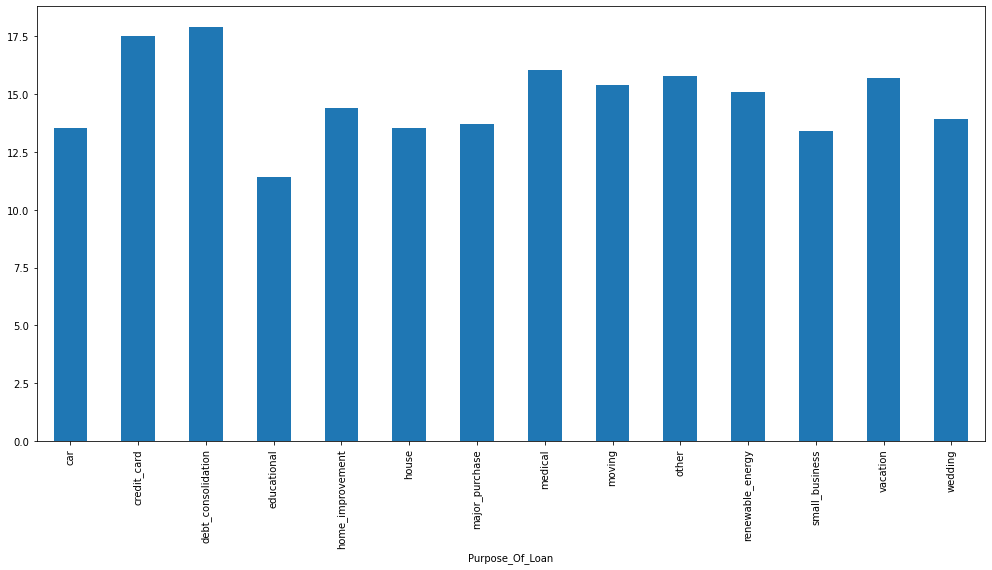

In [182]:
train.groupby('Purpose_Of_Loan')['Debt_To_Income'].mean().plot(kind='bar')

### inference - 
The category 'Debt Consolidation' has the highest debt-to-income ratio in the dataset. This indicates that loan applicants who applied for a loan for debt consolidation purposes have a higher ratio of debt compared to their income.

The category 'Credit Card' has the second-highest debt-to-income ratio in the dataset. This indicates that loan applicants who applied for a loan to pay off their credit card debt have a relatively high ratio of debt compared to their income.

The category 'Wedding' has the least debt-to-income ratio in the dataset. This indicates that loan applicants who applied for a loan for wedding purposes have a relatively low ratio of debt compared to their income.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

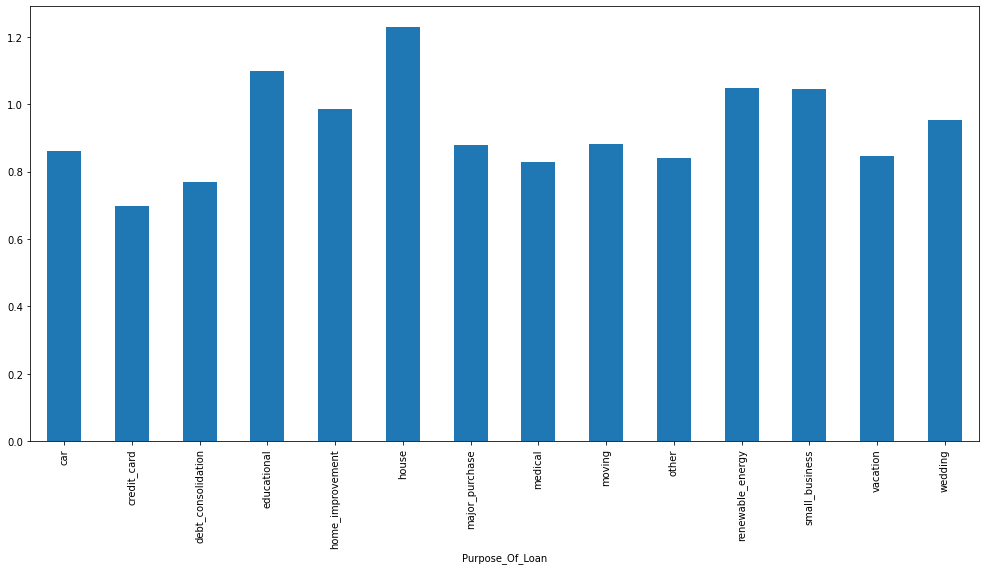

In [183]:
train.groupby('Purpose_Of_Loan')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

### inference - 
The category 'Debt Consolidation' has the highest number of inquiries in the dataset. This suggests that loan applicants who applied for a loan for debt consolidation purposes are more likely to have their credit scores pulled by lenders or financial institutions.

The category 'Credit Card' has the second-highest number of inquiries in the dataset. This suggests that loan applicants who applied for a loan to pay off their credit card debt are also likely to have their credit scores pulled by lenders or financial institutions.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

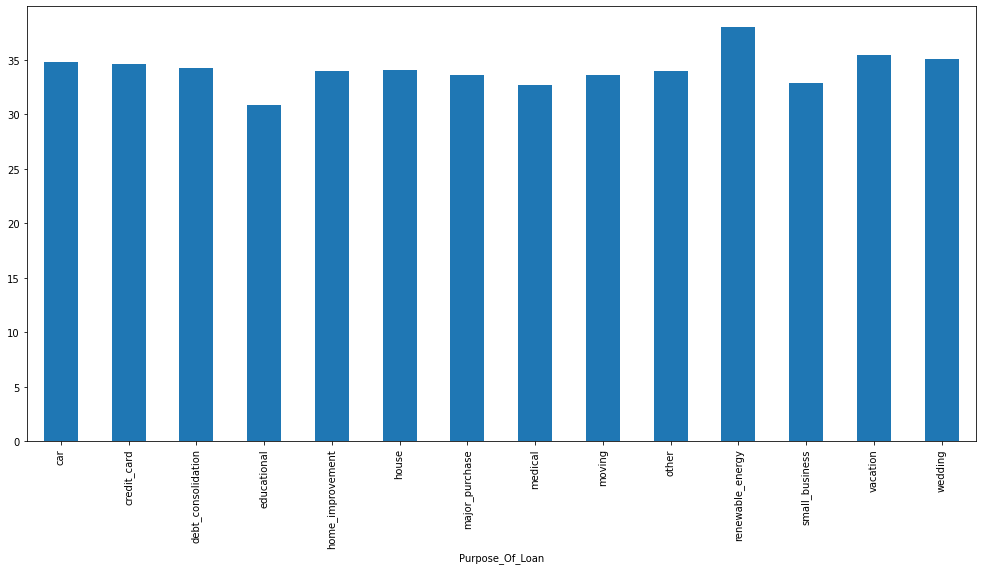

In [184]:
train.groupby('Purpose_Of_Loan')['Months_Since_Deliquency'].mean().plot(kind='bar')

### inference - 
The categories 'Debt Consolidation' and 'Credit Card' have the highest delinquency rates in the dataset. This suggests that borrowers who applied for loans for debt consolidation or credit card purposes are more likely to default on their loans than borrowers who applied for loans for other purposes.

Delinquency can have a negative impact on a borrower's credit score and can lead to late fees, penalties, and even legal action in some cases. Therefore, lenders may be more cautious when approving loans to borrowers who have a history of delinquency.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

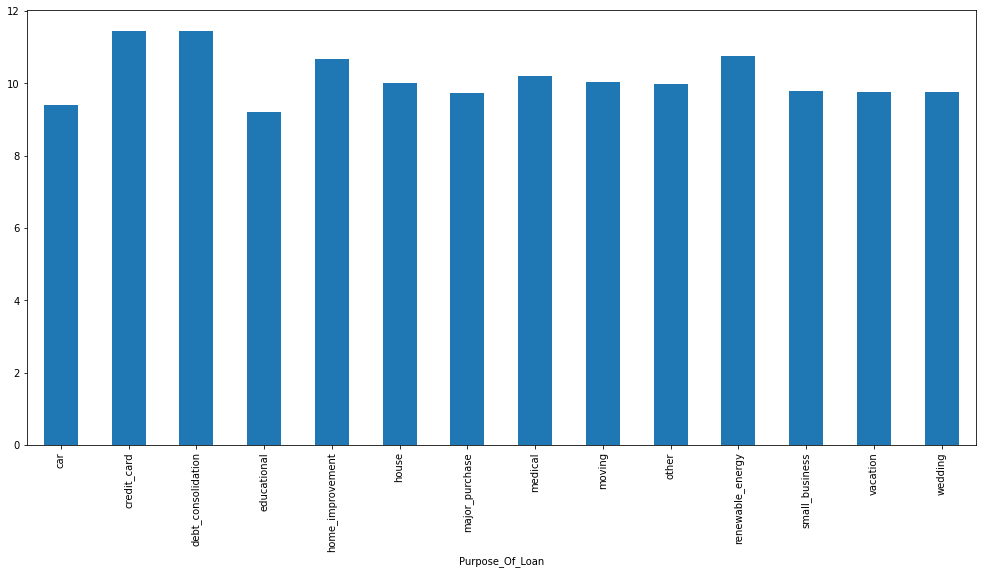

In [185]:
train.groupby('Purpose_Of_Loan')['Number_Open_Accounts'].mean().plot(kind='bar')

### inference - 
The loan purpose category 'Debt Consolidation' is the most common reason for borrowers to open new accounts. This suggests that many borrowers who apply for loans to consolidate their debts are likely to have multiple debts from various sources and are seeking a single loan to simplify their payments.

The number of open accounts can be an important factor in determining a borrower's creditworthiness, as it reflects their ability to manage credit responsibly and make timely payments. Therefore, lenders may take the number of open accounts into account when making loan approval decisions.

However, it is important to note that while 'Debt Consolidation' is the most common loan purpose for opening new accounts, it may not necessarily be the only reason. Borrowers may also open new accounts for other reasons such as home improvement, medical expenses, or education.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

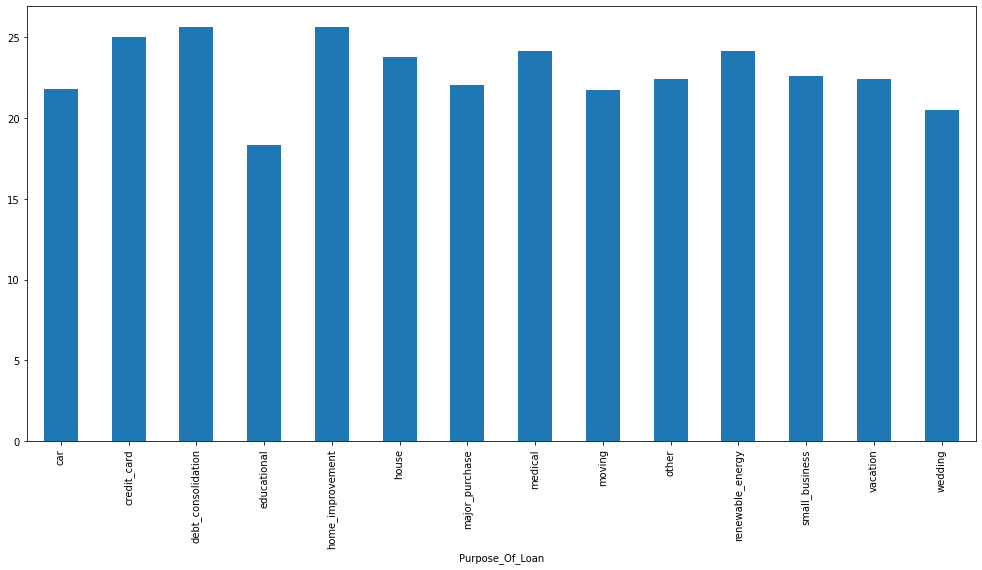

In [186]:
train.groupby('Purpose_Of_Loan')['Total_Accounts'].mean().plot(kind='bar')

### inference - 
 debt consolidation is the main purpose of loan for borrowers who have the most total accounts. This suggests that borrowers who have multiple accounts and are seeking to consolidate their debts may have a higher likelihood of having more debt than borrowers with fewer accounts.

Lenders may take this information into account when assessing a borrower's creditworthiness, as having a high amount of debt and multiple accounts may indicate a higher risk of default. It may also indicate that the borrower is seeking to consolidate their debts to improve their financial situation and make payments more manageable.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

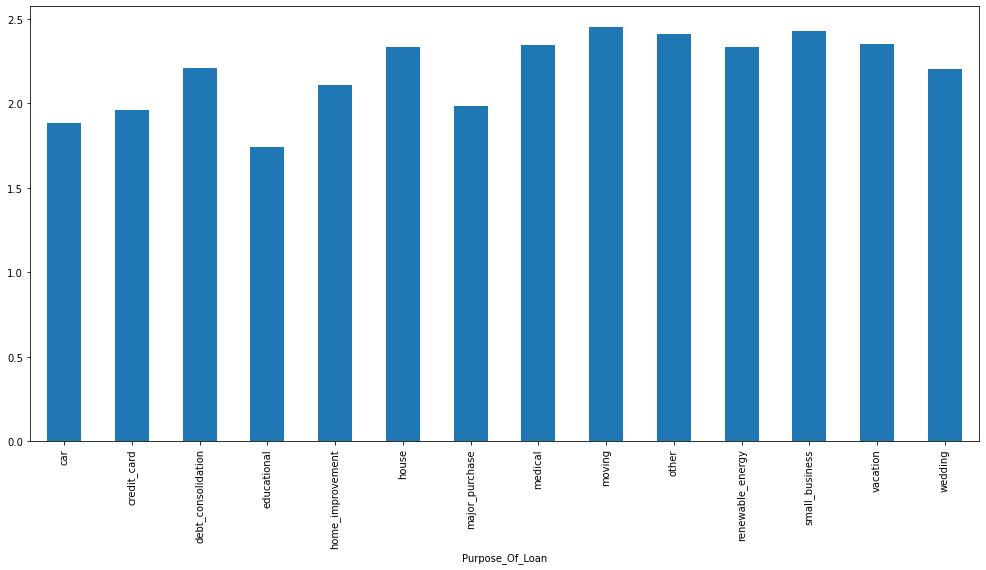

In [187]:
train.groupby('Purpose_Of_Loan')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
debt consolidation is the dominant purpose of loan, followed by credit card, while wedding, car, and house are the least common loan purposes. Additionally, we know that debt consolidation has a high interest rate.

This information may suggest that borrowers who are seeking debt consolidation loans may be more likely to have higher interest rates due to the higher risk associated with consolidating multiple debts into one payment. Credit card loans may also carry a higher interest rate due to their unsecured nature and higher risk of default. Conversely, wedding, car, and house loans may have lower interest rates due to their secured nature and lower risk of default.

Lenders may consider the purpose of the loan when assessing the risk associated with a borrower's application and determining the interest rate they offer. It is important to note, however, that lenders should also consider other factors such as credit score, income, and debt-to-income ratio when making informed loan approval decisions.

<AxesSubplot:xlabel='Gender'>

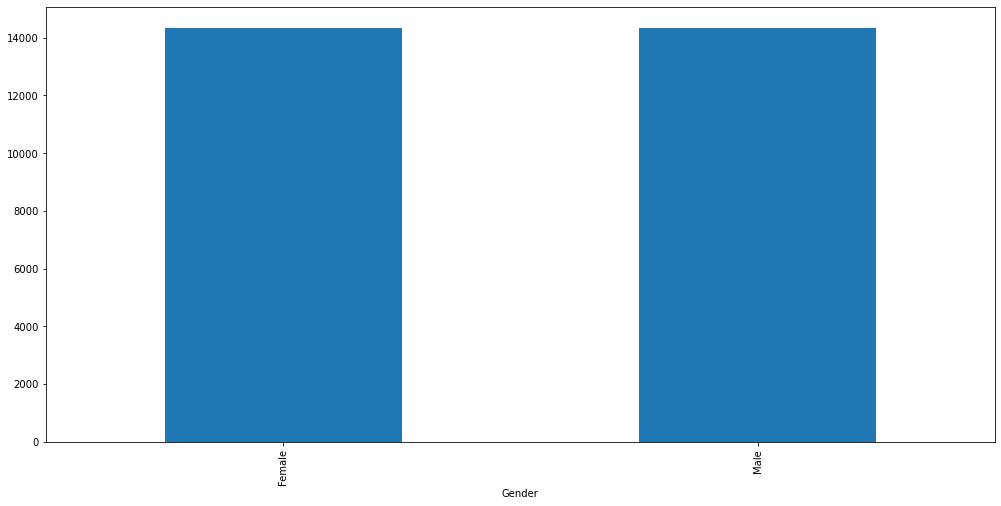

In [188]:
train.groupby('Gender')['Loan_Amount_Requested'].mean().plot(kind='bar')

### inference - 
males requested a higher loan amount compared to females. However, we cannot conclude that this difference is statistically significant without further analysis.

Gender may be one factor that lenders consider when assessing the risk associated with a borrower's application and determining the loan amount they offer. However, it is important to note that lenders should not base loan approval decisions solely on gender.

Lenders should consider other factors such as credit score, income, and debt-to-income ratio when making informed loan approval decisions. By using a data-driven approach to lending, lenders can help ensure that they are making fair and unbiased decisions while minimizing the risk of default.

<AxesSubplot:xlabel='Gender'>

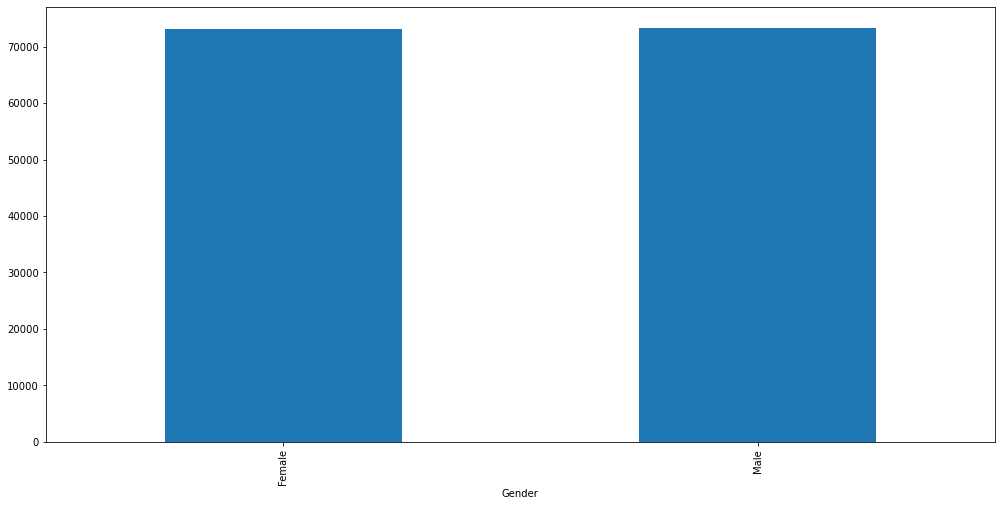

In [189]:
train.groupby('Gender')['Annual_Income'].mean().plot(kind='bar')

### inference - 
males have a higher average annual income compared to females. However, we cannot conclude that this difference is statistically significant without further analysis.
In the context of lending, income is a critical factor that lenders consider when assessing the creditworthiness of a borrower. However, lenders should not discriminate based on gender and should use a data-driven approach to evaluate loan applications based on objective criteria. By doing so, lenders can help promote fairness and equal opportunities for all borrowers.

<AxesSubplot:xlabel='Gender'>

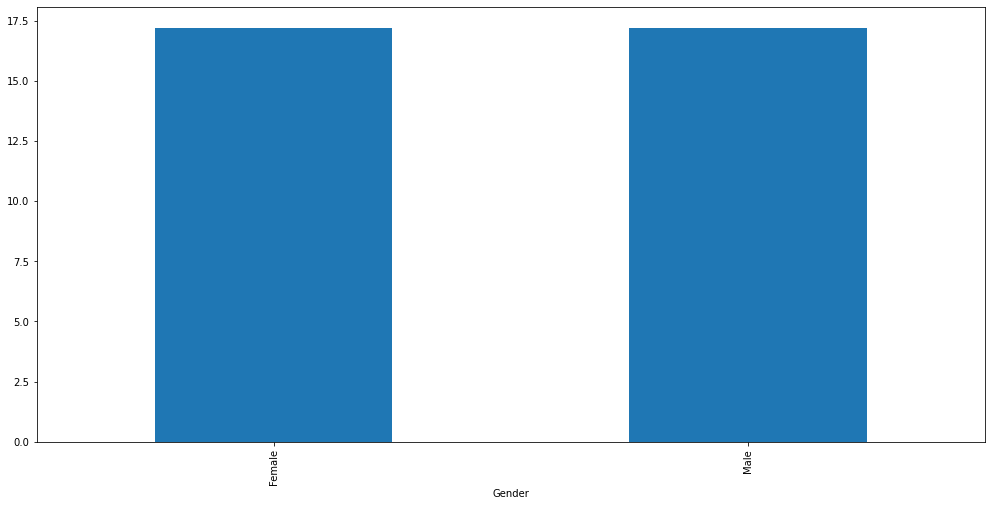

In [190]:
train.groupby('Gender')['Debt_To_Income'].mean().plot(kind='bar')

### inference - 
males have more debt to income.Debt to income ratio is a key factor that lenders use to evaluate creditworthiness of borrowers. A high debt to income ratio indicates that a borrower may have difficulty repaying their debts.

<AxesSubplot:xlabel='Gender'>

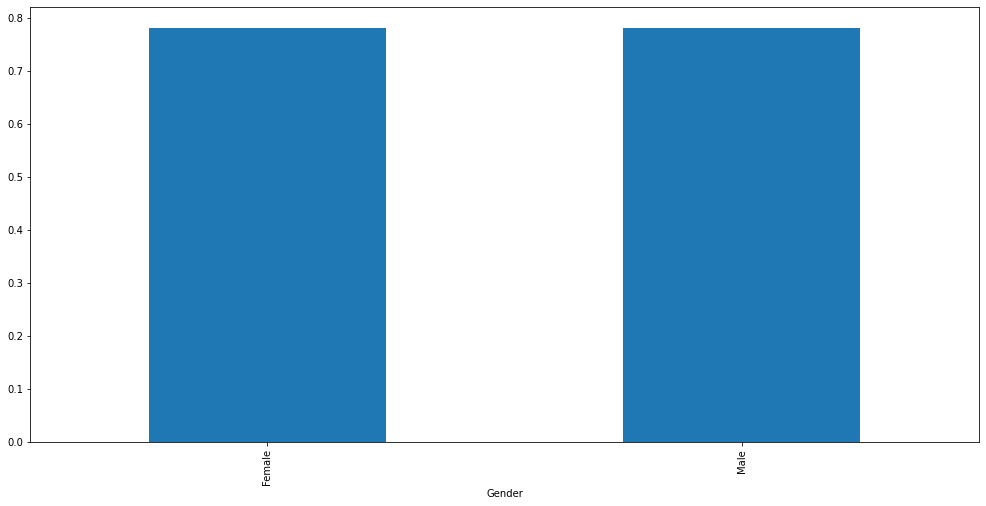

In [191]:
train.groupby('Gender')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

### inference - 
males inquiries in last 6 month compared to females

<AxesSubplot:xlabel='Gender'>

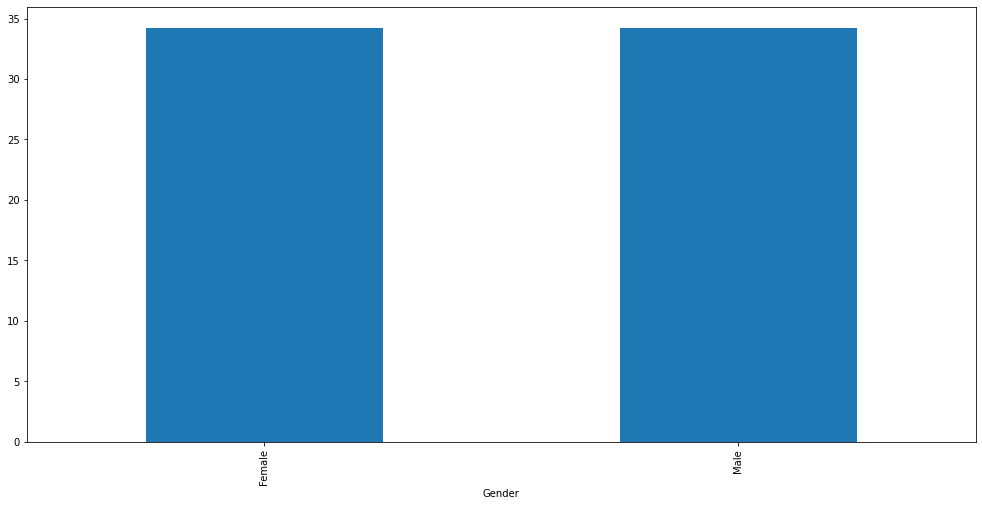

In [192]:
train.groupby('Gender')['Months_Since_Deliquency'].mean().plot(kind='bar')

### inference - 
According to the dataset, males take more default in emi's as compared to females

<AxesSubplot:xlabel='Gender'>

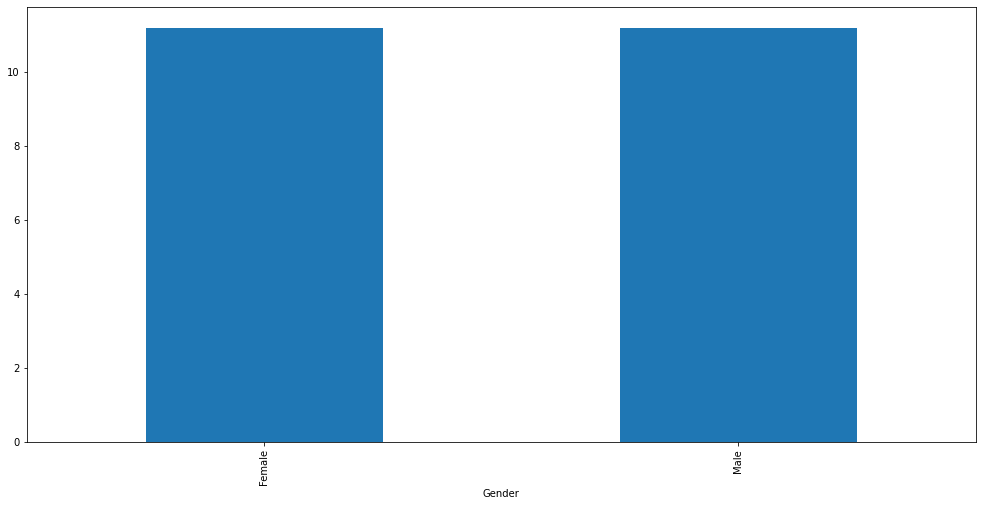

In [193]:
train.groupby('Gender')['Number_Open_Accounts'].mean().plot(kind='bar')

### inference - 
males have more number of open accounts as compared to females. However, it is important to note that having a higher number of open accounts does not necessarily indicate better financial health or creditworthiness.

Having too many open accounts can actually have a negative impact on one's credit score, as it can be seen as a potential indicator of financial instability or a high risk of default. On the other hand, having a moderate number of well-managed accounts can help improve one's credit score by demonstrating responsible borrowing behavior.

<AxesSubplot:xlabel='Gender'>

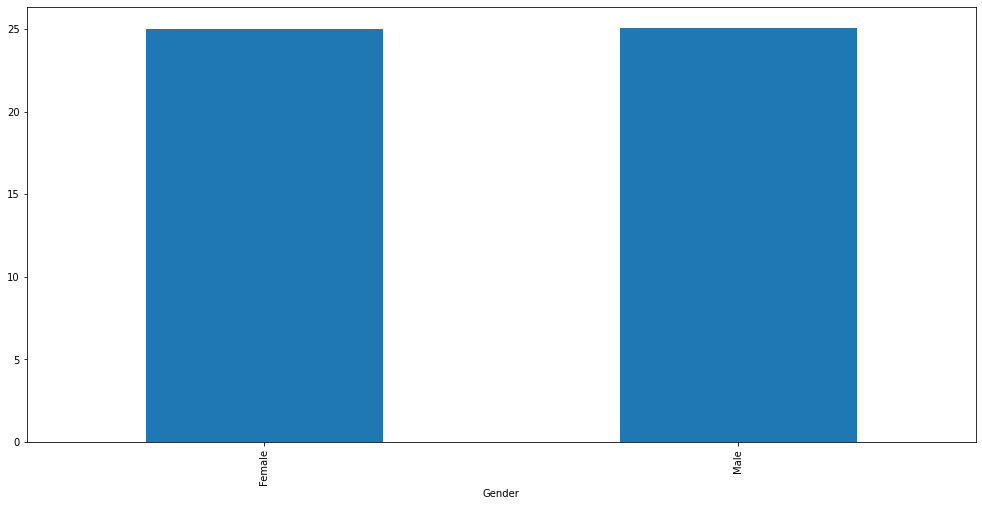

In [194]:
train.groupby('Gender')['Total_Accounts'].mean().plot(kind='bar')

### inference - 
males have more total accounts compared to females. However, it is important to note that the number of total accounts alone does not provide a complete picture of one's creditworthiness or financial health.

The types of accounts, their ages, and their payment histories are also important factors that contribute to a person's credit score and overall financial health. It is possible that males may have more accounts, but those accounts may have a shorter history or a less favorable payment history compared to females.

<AxesSubplot:xlabel='Gender'>

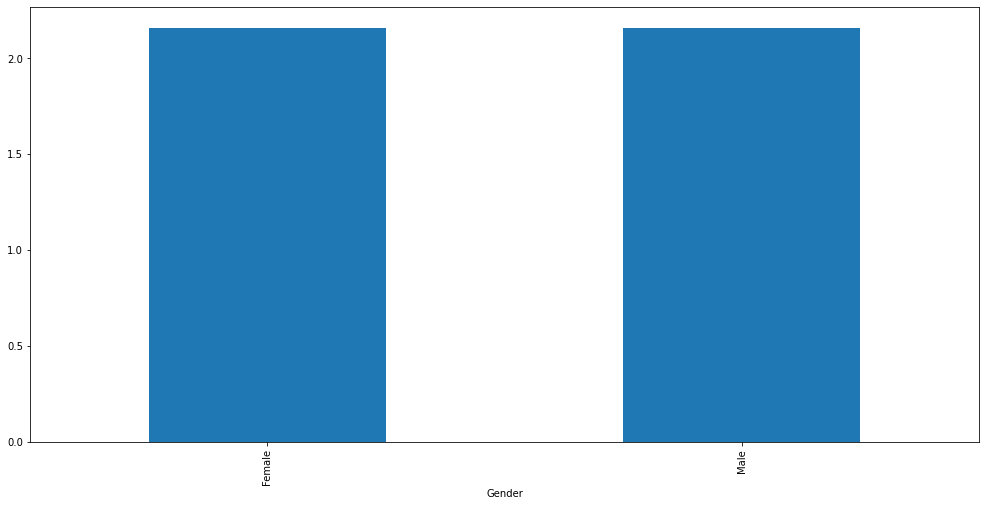

In [195]:
train.groupby('Gender')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
males are the majority in the Gender category, which may indicate that there are more male applicants for loans. Additionally, it appears that females tend to receive lower interest rates on their loans than males. However, it's important to note that there could be other factors at play, such as differences in credit scores or loan repayment history, which may affect the interest rates offered to different applicants.

# Multivariate analysis

<AxesSubplot:>

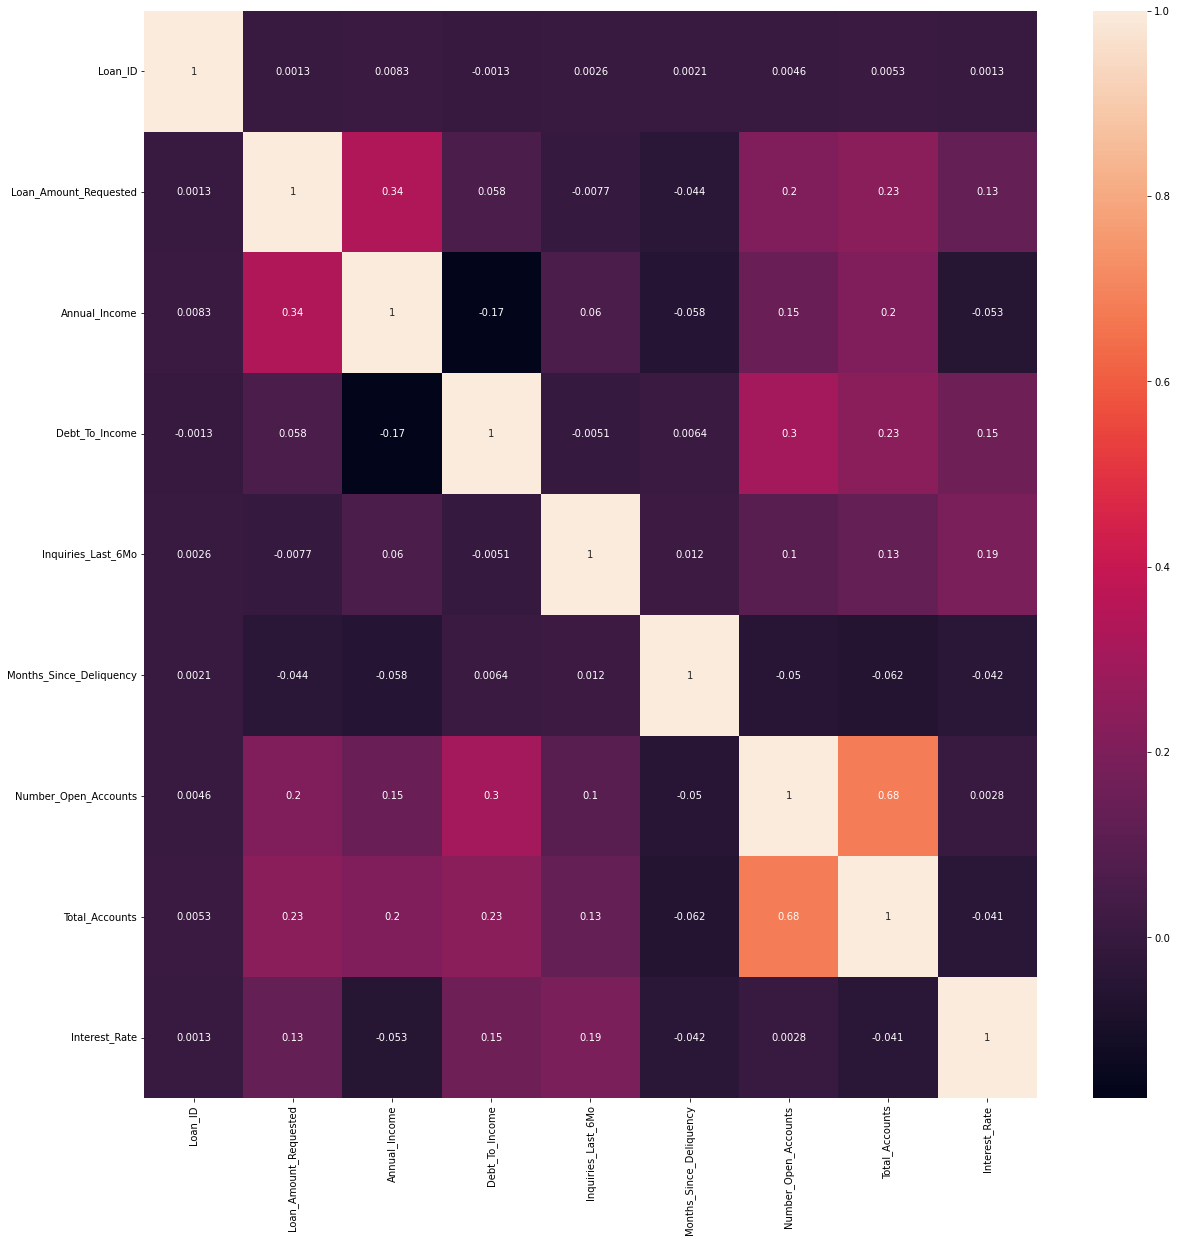

In [196]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

### inference - 
there is a strong positive correlation between the loan amount requested and annual income, which suggests that people with higher annual income are more likely to apply for a higher loan amount. On the other hand, there is a weak correlation between the loan amount requested and inquiries last six months, which means that the number of inquiries made in the last six months does not have a significant impact on the loan amount requested. However, we cannot make any assumptions about causality or predictability based solely on the correlation values.

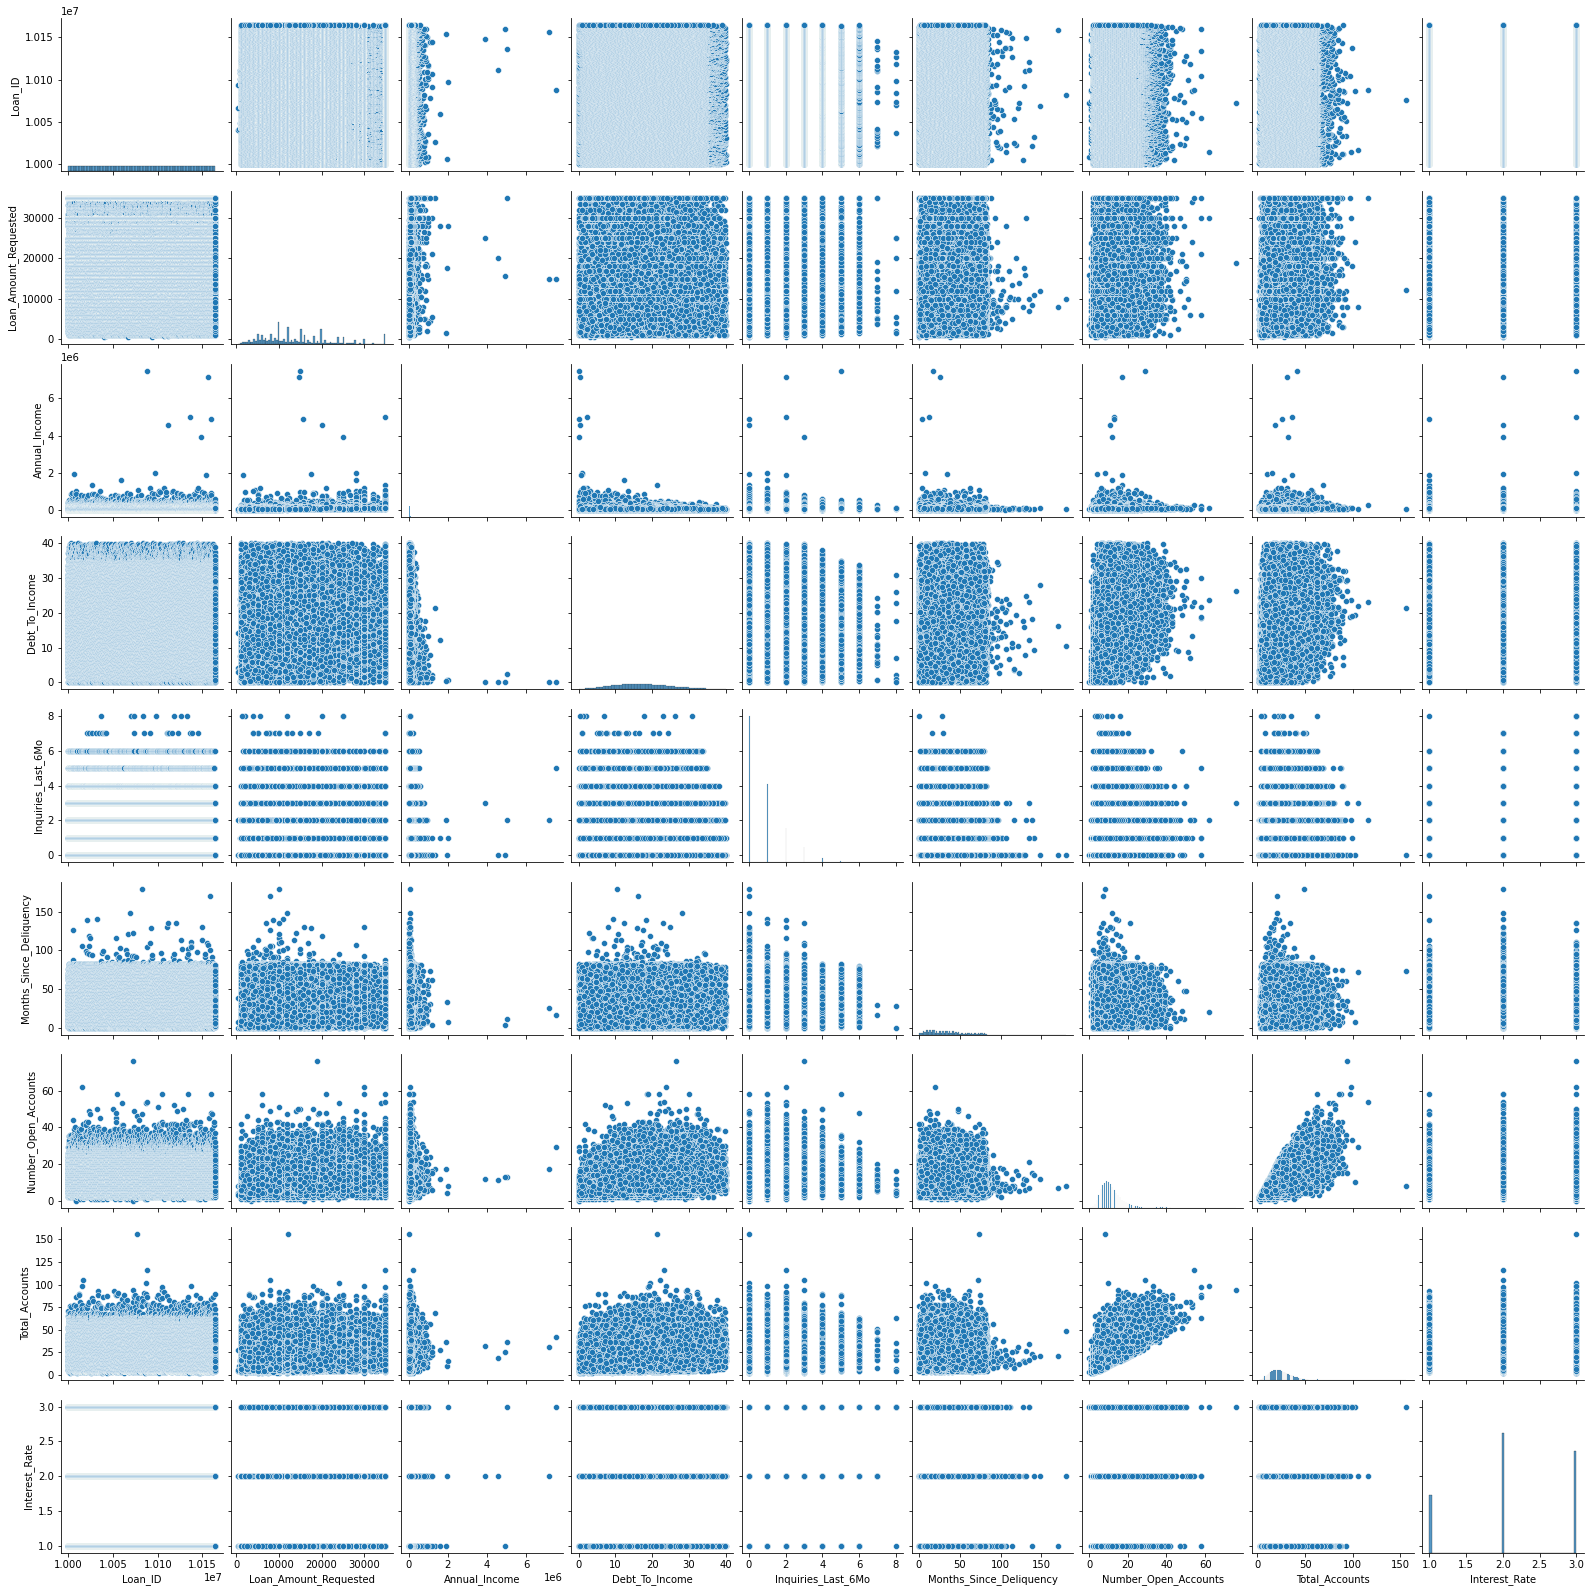

In [197]:
sns.pairplot(train)

# Numerical - categorical


<Figure size 1080x576 with 0 Axes>

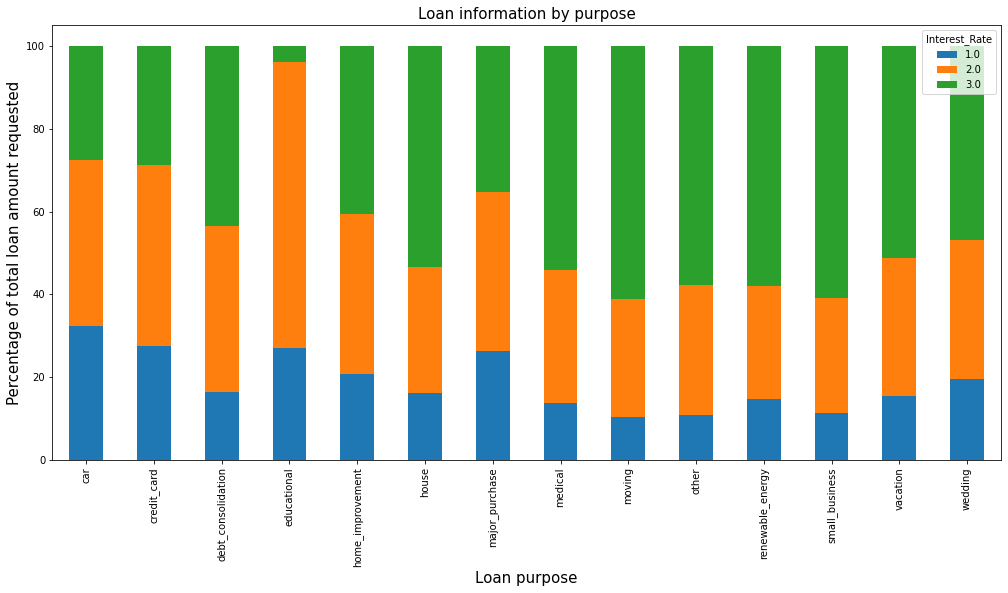

In [198]:
grouped = train.groupby(['Purpose_Of_Loan', 'Interest_Rate'])['Loan_Amount_Requested'].sum().reset_index()

# calculate the total loan amount requested for each purpose
total_by_purpose = grouped.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].sum()

# add a column for the percentage of loan amount requested for each interest rate within each purpose
grouped['Percent'] = grouped.apply(lambda x: x['Loan_Amount_Requested'] / total_by_purpose[x['Purpose_Of_Loan']] * 100, axis=1)

# pivot the table to create a stacked bar plot
pivot = grouped.pivot(index='Purpose_Of_Loan', columns='Interest_Rate', values='Percent')

# set the figure size
plt.figure(figsize=(15,8))

# create the stacked bar plot
pivot.plot(kind='bar', stacked=True)

# add plot and axes labels
plt.title('Loan information by purpose', fontsize = 15)
plt.xlabel('Loan purpose', fontsize = 15)
plt.ylabel('Percentage of total loan amount requested', fontsize = 15)

# display the plot
plt.show()

### Inference -  
The stacked bar plot gives a clear indication of the distribution of interest rates across different loan purposes. It shows that certain loan purposes tend to have higher interest rates than others. This information can be useful for borrowers who want to make informed decisions about which loan to choose based on their financial goals and the purpose of the loan. The plot also highlights that educational and major_purchase have lower interest rates, indicating that these loan purposes are less risky for lenders.

## Convert string into int 'Length_Employed'

In [199]:
#create are def function for Length_Employed 
def ln_emp(x):
    #convert string into single int form
    if x == '1 year':
        x =1
    elif x == '10+ years':
        x = 11
    elif x =='2 years':
        x=2
    elif x == '3 years':
        x =3
    elif x == '4 years':
        x =4
    elif x == '5 years':
        x =5
    elif x == '6 years':
        x =6
    elif x == '7 years':
        x =7
    elif x == '8 years':
        x =8
    elif x == '9 years':
        x =9
    elif x == '< 1 year':
        x =0
    return(x) 
train.Length_Employed = train.Length_Employed.apply(ln_emp)
#test.Length_Employed = train.Length_Employed.apply(ln_emp)

## Droping the columns

In [200]:
#Months_Since_Deliquency : it have 54% missing value 
train=train.drop('Months_Since_Deliquency',axis=1)
#test=train.drop('Months_Since_Deliquency',axis=1)

In [201]:
#Loan_ID : This is a unique identifier for each order and does not provide any information that can help with the prediction task.
train=train.drop('Loan_ID',axis=1)

# Handle The Missing Value

### 'Home_Owner' Create a new value and fill all Null value in that

In [202]:
train.Home_Owner.unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [203]:
train['Home_Owner'].fillna('NoHome',inplace=True)
#test['Home_Owner'].fillna('NoHome',inplace=True)

### 'Length_Employed' Hand the null value

In [204]:
# Filling the 'Length_Employed' with Median 
train['Length_Employed'].fillna(train['Length_Employed'].median(),inplace=True)
#test['Length_Employed'].fillna(train['Length_Employed'].median(),inplace=True)

### 'Annual_Income' Predict the missing value with LinearRegression model

In [205]:
print("Annual_Income Null Valuse is:",train['Annual_Income'].isnull().sum())

Annual_Income Null Valuse is: 25102


In [206]:
# Import the necessary packages
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the dataset and use get_dummies() function to convert categorical features into dummy variables
dummy = pd.get_dummies(train, drop_first=True)

# Separate the data into two subsets: one with non-missing Annual_Income values and one with missing Annual_Income values
train_df_with_income = dummy[dummy['Annual_Income'].notnull()]
train_df_missing_income = dummy[dummy['Annual_Income'].isnull()]

# Define the features (i.e. all features except Annual_Income) and the target variable(i.e. Annual_Income) for the regression model
features = dummy.drop('Annual_Income', axis=1).columns.tolist()

# Fit a linear regression model to the training data with non-missing Annual_Income values
X_train = train_df_with_income[features]
y_train = train_df_with_income['Annual_Income']
reg = LinearRegression().fit(X_train, y_train)

# Predict the missing Annual_Income values using the trained regression model
X_missing = train_df_missing_income[features]
predicted_income = reg.predict(X_missing)

# Fill in the missing Annual_Income values in the original dataset with the predicted values
train.loc[train['Annual_Income'].isnull(), 'Annual_Income'] = predicted_income

In [207]:
print('Predicted values of Annual Income:',list(predicted_income)[:5])

Predicted values of Annual Income: [106442.06049979696, 40886.54983635145, 64201.09486720866, 101352.35668580417, 73392.23547287587]


In [208]:
print("Afther handle the NUll value:",train['Annual_Income'].isnull().sum())

Afther handle the NUll value: 0


In [209]:
after_miss_skew=train.skew().sort_values(ascending=False)
after_miss_skew

Annual_Income            41.463177
Inquiries_Last_6Mo        1.550867
Number_Open_Accounts      1.164084
Total_Accounts            0.817347
Loan_Amount_Requested     0.727216
Debt_To_Income            0.192204
Length_Employed          -0.099300
Interest_Rate            -0.260932
dtype: float64

In [210]:
after_miss_std=train.std().sort_values(ascending=False)
after_miss_std

Annual_Income            56559.199079
Loan_Amount_Requested     8281.868700
Total_Accounts              11.583067
Debt_To_Income               7.845083
Number_Open_Accounts         4.991813
Length_Employed              3.921086
Inquiries_Last_6Mo           1.034747
Interest_Rate                0.738364
dtype: float64

In [211]:
after_miss_mean=train.mean().sort_values(ascending=False)
after_miss_mean

Annual_Income            73348.856884
Loan_Amount_Requested    14349.336920
Total_Accounts              25.067665
Debt_To_Income              17.207189
Number_Open_Accounts        11.193818
Length_Employed              6.315552
Interest_Rate                2.158951
Inquiries_Last_6Mo           0.781698
dtype: float64

# Checking Outliers

In [212]:
## non-parametric test (IQR)

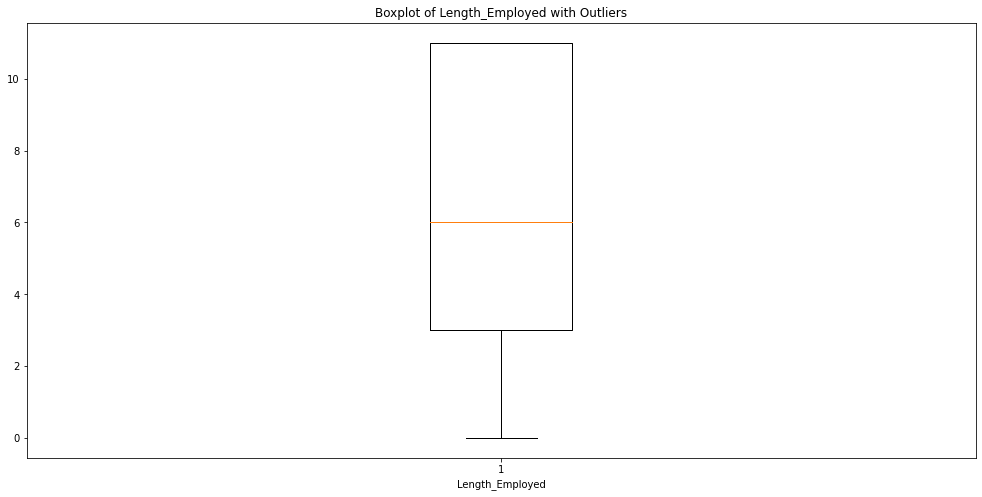

In [213]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Length_Employed'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Length_Employed'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Length_Employed'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Length_Employed'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Length_Employed')
plt.title('Boxplot of Length_Employed with Outliers')

# Show the plot
plt.show()

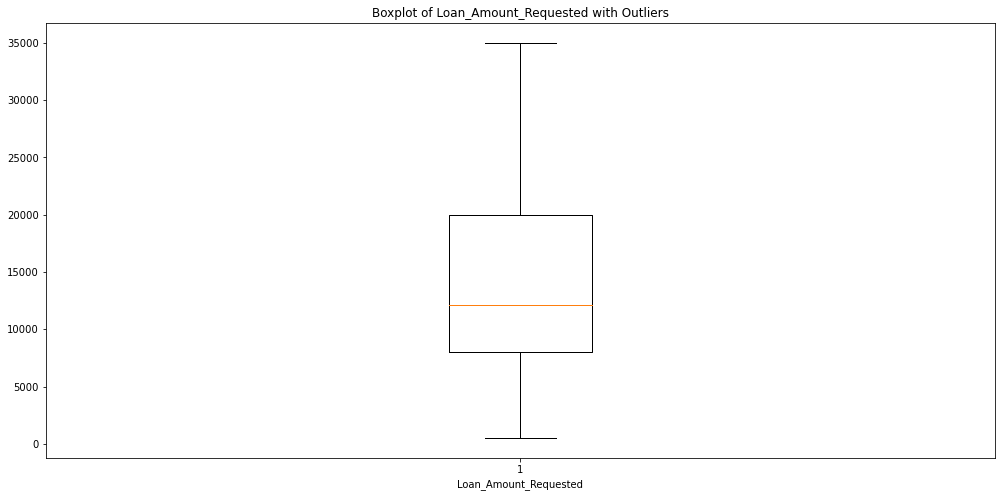

In [214]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Loan_Amount_Requested'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Loan_Amount_Requested'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Loan_Amount_Requested'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Loan_Amount_Requested'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Loan_Amount_Requested')
plt.title('Boxplot of Loan_Amount_Requested with Outliers')

# Show the plot
plt.show()

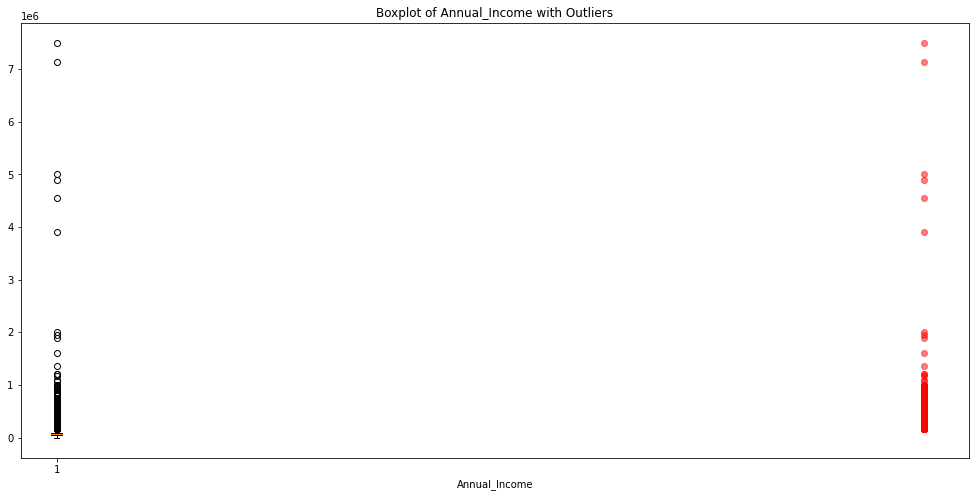

In [215]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Annual_Income'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Annual_Income'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Annual_Income'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Annual_Income'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Annual_Income')
plt.title('Boxplot of Annual_Income with Outliers')

# Show the plot
plt.show()

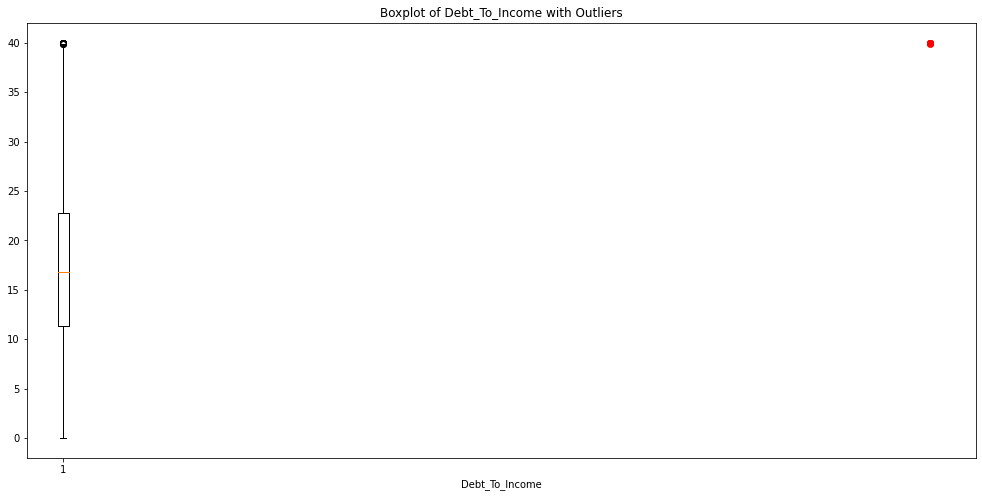

In [216]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Debt_To_Income'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Debt_To_Income'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Debt_To_Income'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Debt_To_Income'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Debt_To_Income')
plt.title('Boxplot of Debt_To_Income with Outliers')

# Show the plot
plt.show()

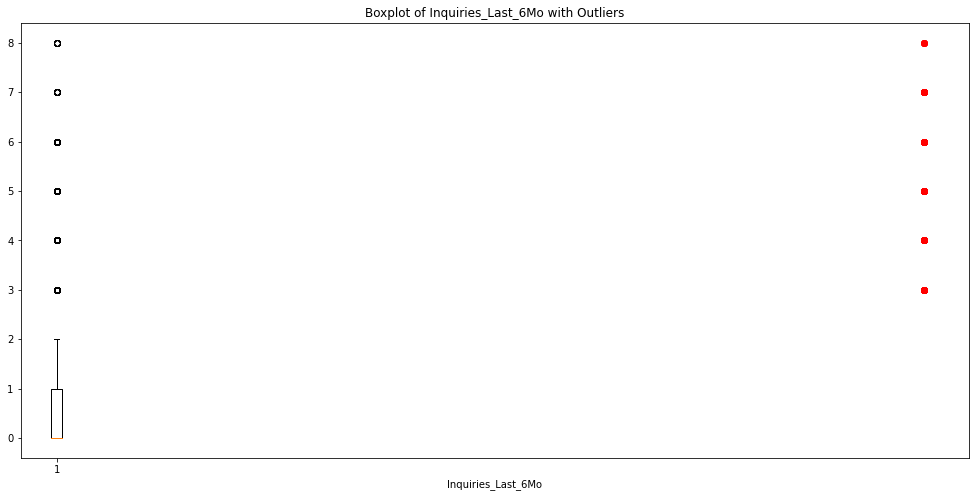

In [217]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Inquiries_Last_6Mo'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Inquiries_Last_6Mo'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Inquiries_Last_6Mo'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Inquiries_Last_6Mo'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Inquiries_Last_6Mo')
plt.title('Boxplot of Inquiries_Last_6Mo with Outliers')

# Show the plot
plt.show()

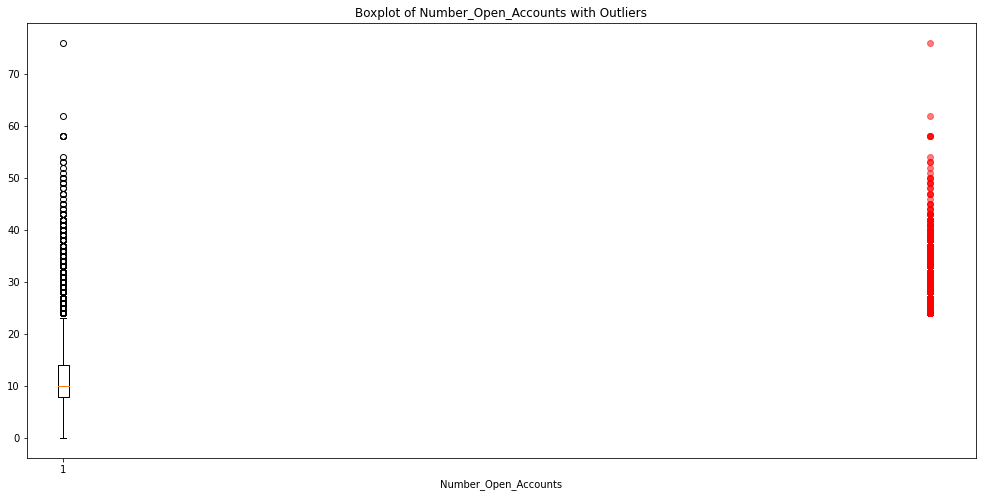

In [218]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Number_Open_Accounts'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Number_Open_Accounts'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Number_Open_Accounts'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Number_Open_Accounts'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Number_Open_Accounts')
plt.title('Boxplot of Number_Open_Accounts with Outliers')

# Show the plot
plt.show()

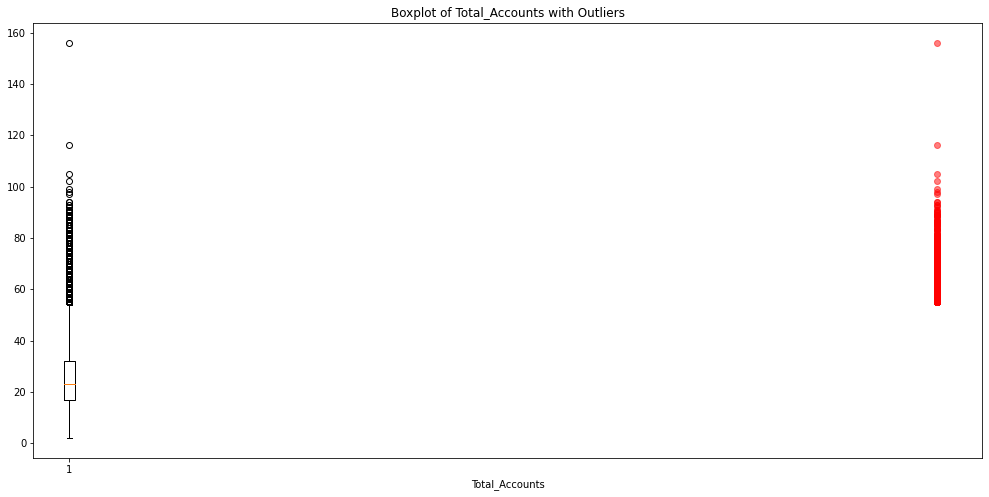

In [219]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Total_Accounts'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Total_Accounts'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Total_Accounts'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Total_Accounts'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Total_Accounts')
plt.title('Boxplot of Total_Accounts with Outliers')

# Show the plot
plt.show()

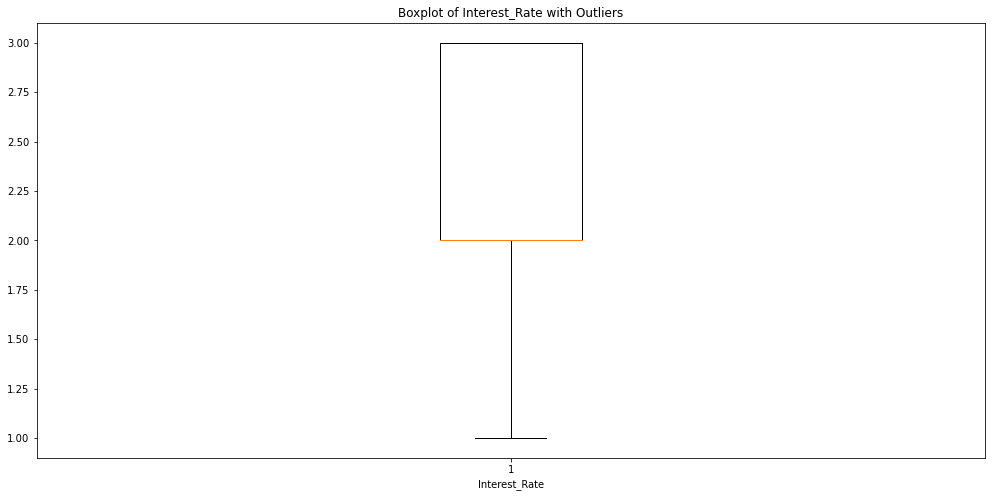

In [220]:
q1, q3 = np.percentile(train['Interest_Rate'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Interest_Rate'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Interest_Rate'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Interest_Rate'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Interest_Rate')
plt.title('Boxplot of Interest_Rate with Outliers')

# Show the plot
plt.show()

### Inference - 
numerical variables like ''Annual_Income',Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts contain outliers 

In [221]:
# Identify outliers using IQR method
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create a new dataset containing without outliers
without_outlier=train[~((train < lower_bound) | (train > upper_bound)).any(axis=1)]

# Create a new dataset containing only the outliers
outliers_only = train[((train < lower_bound) | (train > upper_bound)).any(axis=1)]
outliers_only

In [ ]:
# inference - after outlier treatment on train data by IQR, which removed more then 22000 rows from train data

# Containing only the outliers (outliers_only)

<AxesSubplot:>

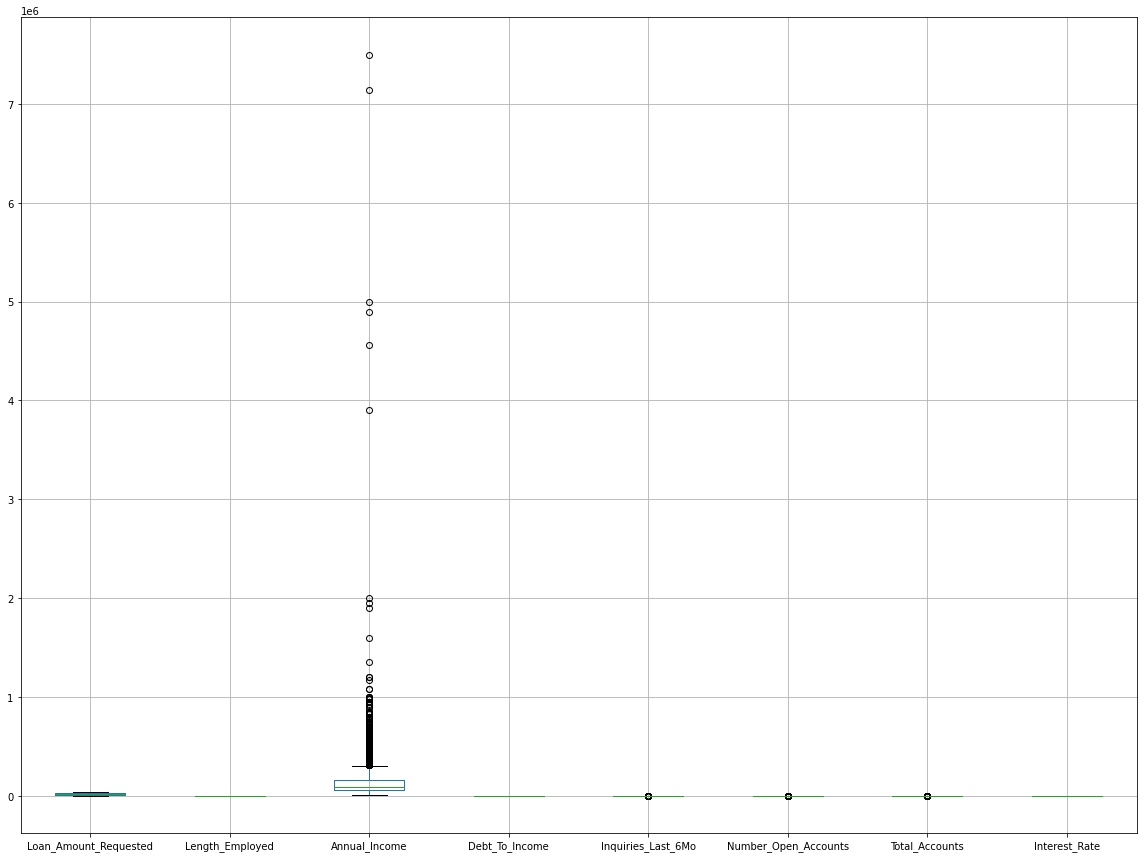

In [222]:
# Analyze the outliers separately
# Visualization: Create a box plot of the outliers
plt.figure(figsize=(20,15))
outliers_only.boxplot()

In [223]:
# Descriptive statistics: Calculate summary statistics for the outliers
outliers_only.describe()

Loan_Amount_Requested  Length_Employed  Annual_Income  Debt_To_Income  \
count           22025.000000     22025.000000   2.202500e+04    22025.000000   
mean            16918.718502         6.351964   1.167323e+05       16.837236   
std              9449.220641         3.960608   1.279352e+05        8.013142   
min              1000.000000         0.000000   4.888000e+03        0.000000   
25%              9600.000000         3.000000   6.000000e+04       10.810000   
50%             15000.000000         6.000000   8.922055e+04       16.470000   
75%             24000.000000        11.000000   1.590000e+05       22.600000   
max             35000.000000        11.000000   7.500000e+06       39.990000   

       Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Interest_Rate  
count        22025.000000          22025.000000    22025.000000   22025.000000  
mean             2.202588             14.862747       34.141249       2.277003  
std              1.543386              7.294845       15.342242       0.742837  
min              0.000000              1.000000        2.000000       1.000000  
25%              1.000000              9.000000       22.000000       2.000000  
50%              3.000000             13.000000       32.000000       2.000000  
75%              3.000000             19.000000       44.000000       3.000000  
max              8.000000             76.000000      156.000000       3.000000

In [224]:
outliers_only.skew()

Loan_Amount_Requested     0.434306
Length_Employed          -0.110424
Annual_Income            25.675925
Debt_To_Income            0.190651
Inquiries_Last_6Mo        0.002079
Number_Open_Accounts      0.932308
Total_Accounts            0.491190
Interest_Rate            -0.494789
dtype: float64

## Inference - 
The outlier data has very less skewness as compare to original data,
it could suggest that the outliers were the main contributors to the skewness of the original data.

### Perform ANOVA to test on Outlier_only equality of means

In [225]:
#Loan_Amount_Requested
# Null hypothesis
#𝐻0: The averages of all treatments are the same.
#𝐻1: At least one treatment has a different average.

# we have three groups: 1, 2, 3
# extract the data for each Interest_Rate into separate arrays
class_1=outliers_only[outliers_only['Interest_Rate']==1]['Loan_Amount_Requested']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Loan_Amount_Requested']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Loan_Amount_Requested']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 87.92242026589119
p-value: 9.27728977658596e-39


In [226]:
#Length_Employed

class_1=outliers_only[outliers_only['Interest_Rate']==1]['Length_Employed']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Length_Employed']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Length_Employed']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 5.492827478350089
p-value: 0.00412183062526871


In [227]:
#Annual_Income

class_1=outliers_only[outliers_only['Interest_Rate']==1]['Annual_Income']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Annual_Income']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Annual_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 147.05955650235381
p-value: 3.594027707162703e-64


In [228]:
#Debt_To_Income

class_1=outliers_only[outliers_only['Interest_Rate']==1]['Debt_To_Income']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Debt_To_Income']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Debt_To_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 288.74600760387807
p-value: 1.6414579872432176e-124


In [229]:
#'Inquiries_Last_6Mo'

class_1=outliers_only[outliers_only['Interest_Rate']==1]['Inquiries_Last_6Mo']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Inquiries_Last_6Mo']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Inquiries_Last_6Mo']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 873.0797986678319
p-value: 0.0


In [230]:
#Number_Open_Accounts

class_1=outliers_only[outliers_only['Interest_Rate']==1]['Number_Open_Accounts']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Number_Open_Accounts']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Number_Open_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 38.35752568068742
p-value: 2.3468560880145168e-17


In [231]:
#'Total_Accounts'

class_1=outliers_only[outliers_only['Interest_Rate']==1]['Total_Accounts']
class_2=outliers_only[outliers_only['Interest_Rate']==2]['Total_Accounts']
class_3=outliers_only[outliers_only['Interest_Rate']==3]['Total_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 87.10696137056622
p-value: 2.0834249502922988e-38


# After removing Outliers (without_outlier)

In [232]:
without_outlier.skew()

Loan_Amount_Requested    0.753860
Length_Employed         -0.097619
Annual_Income            0.682142
Debt_To_Income           0.193687
Inquiries_Last_6Mo       0.865457
Number_Open_Accounts     0.569375
Total_Accounts           0.496488
Interest_Rate           -0.227533
dtype: float64

In [233]:
without_outlier.std()

Loan_Amount_Requested     8012.852335
Length_Employed              3.914916
Annual_Income            28708.328663
Debt_To_Income               7.817209
Inquiries_Last_6Mo           0.711916
Number_Open_Accounts         4.258176
Total_Accounts              10.187432
Interest_Rate                0.735981
dtype: float64

## Inference - 
 after removing outliers it has  generated the data whis is more homogeneous or consistent than original data.
The reduced spread of the data may lead to more stable and reliable estimates of statistical measures and predictions based on the data.

# With outliers Data-set (train)

### Perform ANOVA to test the equality of means

In [234]:
#Loan_Amount_Requested
# Null hypothesis
#𝐻0: The averages of all treatments are the same.
#𝐻1: At least one treatment has a different average.

# we have three groups: 1, 2, 3
# extract the data for each Interest_Rate into separate arrays
class_1=train[train['Interest_Rate']==1]['Loan_Amount_Requested']
class_2=train[train['Interest_Rate']==2]['Loan_Amount_Requested']
class_3=train[train['Interest_Rate']==3]['Loan_Amount_Requested']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 1936.5452716421166
p-value: 0.0


### inference -
as p value is < 0.5 hence  reject null which means all means are different so we can conclude that 
#the col 'Loan_Amount_Requested ' impact on target varible 
#hence we will not drop this col

### inference -
as p value is < 0.5 hence  reject null which means all means are different so we can conclude that 
#the col 'Loan_Amount_Requested ' impact on target varible 
#hence we will not drop this col

In [235]:
#Length_Employed

class_1=train[train['Interest_Rate']==1]['Length_Employed']
class_2=train[train['Interest_Rate']==2]['Length_Employed']
class_3=train[train['Interest_Rate']==3]['Length_Employed']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 73.3268708900736
p-value: 1.474851218507049e-32


In [236]:
#Annual_Income

class_1=train[train['Interest_Rate']==1]['Annual_Income']
class_2=train[train['Interest_Rate']==2]['Annual_Income']
class_3=train[train['Interest_Rate']==3]['Annual_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 426.03145313061475
p-value: 2.850937953626584e-185


In [237]:
#Debt_To_Income

class_1=train[train['Interest_Rate']==1]['Debt_To_Income']
class_2=train[train['Interest_Rate']==2]['Debt_To_Income']
class_3=train[train['Interest_Rate']==3]['Debt_To_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 2001.7973519110305
p-value: 0.0


In [238]:
#'Inquiries_Last_6Mo'

class_1=train[train['Interest_Rate']==1]['Inquiries_Last_6Mo']
class_2=train[train['Interest_Rate']==2]['Inquiries_Last_6Mo']
class_3=train[train['Interest_Rate']==3]['Inquiries_Last_6Mo']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 3125.997973994689
p-value: 0.0


In [239]:
#Number_Open_Accounts

class_1=train[train['Interest_Rate']==1]['Number_Open_Accounts']
class_2=train[train['Interest_Rate']==2]['Number_Open_Accounts']
class_3=train[train['Interest_Rate']==3]['Number_Open_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 38.89204695156436
p-value: 1.2983609557711249e-17


In [240]:
#'Total_Accounts'

class_1=train[train['Interest_Rate']==1]['Total_Accounts']
class_2=train[train['Interest_Rate']==2]['Total_Accounts']
class_3=train[train['Interest_Rate']==3]['Total_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 212.11450799588098
p-value: 9.966895838922742e-93


### Inference 
all numerical colms having p_value < 0.5 that means reject null hypothesis 
which means all means are different and independent vairables having impact on target variables,
hence we will not drop any columns

#  statistical test on categorical vs categorical 

# Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

𝐻0: The variables are independent

𝐻1: The variables are not independent (i.e. variables are dependent)

In [241]:
train.select_dtypes(exclude=np.number).columns

Index(['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender'], dtype='object')

In [242]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Home_Owner'],
                                                                     train['Income_Verified']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 1119.4753530964615
P Value: 3.3408100093958267e-234
Degree of freedom: 10
Expected Valued: [[2.54396913e+04 2.26971144e+04 2.22081942e+04]
 [9.16725760e+03 8.17896302e+03 8.00277938e+03]
 [3.61641785e+00 3.22654267e+00 3.15703948e+00]
 [1.77204474e+01 1.58100591e+01 1.54694935e+01]
 [4.52956335e+03 4.04124470e+03 3.95419195e+03]
 [2.02631508e+04 1.80786412e+04 1.76892079e+04]]


#### inference - p_value is < 0.05 reject the null hypothesis which means the two variables are not independent hence we will not drop the variable

In [243]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Home_Owner'],
                                                                     train['Purpose_Of_Loan']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 4747.27036879808
P Value: 0.0
Degree of freedom: 65
Expected Valued: [[8.07018027e+02 1.57053842e+04 4.15714894e+04 5.18032792e+01
  3.96830244e+03 3.30941610e+02 1.47061375e+03 6.59742589e+02
  4.16994991e+02 3.57314189e+03 5.26595317e+01 1.02407805e+03
  3.58341692e+02 3.54488555e+02]
 [2.90811002e+02 5.65947523e+03 1.49803921e+04 1.86674437e+01
  1.42998789e+03 1.19255652e+02 5.29939413e+02 2.37739923e+02
  1.50265208e+02 1.28759078e+03 1.89759964e+01 3.69029134e+02
  1.29129342e+02 1.27740854e+02]
 [1.14722870e-01 2.23262268e+00 5.90965802e+00 7.36417360e-03
  5.64120042e-01 4.70455057e-02 2.09057325e-01 9.37867068e-02
  5.92785544e-02 5.07945396e-01 7.48589548e-03 1.45579366e-01
  5.09406058e-02 5.03928574e-02]
 [5.62142062e-01 1.09398511e+01 2.89573243e+01 3.60844506e-02
  2.76418821e+00 2.30522978e-01 1.02438089e+00 4.59554863e-01
  2.90464917e-01 2.48893244e+00 3.66808878e-02 7.13338892e-01
  2.49608968e-01 2.46925001e-01]
 [1.43690394e+02 2.79635991e+03 7.40184667e

### inference - 
p_value is < 0.05 reject the null hypothesis which means the two variables are not independent 

In [244]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Home_Owner'],
                                                                     train['Gender']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 1.528104822013083
P Value: 0.9098039151710727
Degree of freedom: 5
Expected Valued: [[2.01788757e+04 5.01661243e+04]
 [7.27150927e+03 1.80774907e+04]
 [2.86855863e+00 7.13144137e+00]
 [1.40559373e+01 3.49440627e+01]
 [3.59286968e+03 8.93213032e+03]
 [1.60728209e+04 3.99581791e+04]]


### inference - 
p_value is > 0.05 fail to reject the null hypothesis which means the two variables are independent of each other

In [245]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Purpose_Of_Loan'],
                                                                     train['Income_Verified']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 1551.440418526489
P Value: 1.293837800205e-311
Degree of freedom: 26
Expected Valued: [[  681.69476413   608.20329379   595.10194207]
 [13266.46722943 11836.24914034 11581.28363023]
 [35115.77893481 31330.05200567 30655.16905952]
 [   43.75865595    39.04116634    38.20017771]
 [ 3352.05770226  2990.68240328  2926.25989447]
 [  279.54909956   249.4117486    244.03915184]
 [ 1242.2395304   1108.31740805  1084.44306155]
 [  557.2899902    497.21022585   486.49978394]
 [  352.23909828   314.26525632   307.4956454 ]
 [ 3018.26233499  2692.87251459  2634.86515042]
 [   44.48193952    39.68647487    38.83158561]
 [  865.04714897   771.7890073    755.16384373]
 [  302.69417378   270.0616217    264.24420452]
 [  299.43939772   267.1577333    261.40286898]]


### inference - 
p_value is < 0.05 reject the null hypothesis which means the two variables are not independent hence we will not drop the variable

In [246]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Gender'],
                                                                     train['Income_Verified']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 4.587890744699577
P Value: 0.10086771507482217
Degree of freedom: 2
Expected Valued: [[17045.26223761 15207.66357899 14880.0741834 ]
 [42375.73776239 37807.33642101 36992.9258166 ]]


### inference - 
p_value is > 0.05 fail to reject the null hypothesis which means the two variables are independent of each other

In [247]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Gender'],
                                                                     train['Purpose_Of_Loan']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 7.673038934869507
P Value: 0.8642296614256447
Degree of freedom: 13
Expected Valued: [[5.40723302e+02 1.05230205e+04 2.78539912e+04 3.47095594e+01
  2.65886699e+03 2.21739582e+02 9.85349890e+02 4.42044885e+02
  2.79397611e+02 2.39409903e+03 3.52832712e+01 6.86159224e+02
  2.40098357e+02 2.37516655e+02]
 [1.34427670e+03 2.61609795e+04 6.92470088e+04 8.62904406e+01
  6.61013301e+03 5.51260418e+02 2.44965011e+03 1.09895512e+03
  6.94602389e+02 5.95190097e+03 8.77167288e+01 1.70584078e+03
  5.96901643e+02 5.90483345e+02]]


### inference - 
p_value is > 0.05 fail to reject the null hypothesis which means the two variables are independent of each other

#  Base Model before Transformation on (train)

In [248]:
# Define the categorical columns to encode
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)

In [249]:
x=df_encoded.drop('Interest_Rate', axis=1)
y=df_encoded['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Evaluate the model on the testing set
accuracy = lr.score(xtest, ytest)
print(f'Testing accuracy: {accuracy:.3f}')

Testing accuracy: 0.455


In [250]:
y_pred = lr.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       0.26      0.01      0.01      6721
         2.0       0.45      0.71      0.55     14018
         3.0       0.47      0.41      0.44     12123

    accuracy                           0.46     32862
   macro avg       0.40      0.38      0.33     32862
weighted avg       0.42      0.46      0.40     32862



In [251]:
y_pred = lr.predict(xtrain)
print(classification_report(ytrain, y_pred))

              precision    recall  f1-score   support

         1.0       0.30      0.01      0.02     27085
         2.0       0.46      0.72      0.56     56562
         3.0       0.48      0.41      0.44     47800

    accuracy                           0.46    131447
   macro avg       0.41      0.38      0.34    131447
weighted avg       0.43      0.46      0.41    131447



### Inference - 
The accuracy of the logistic regression model with outliers is 0.46 which is very poor.

# Transformation on (train)

 numerical variables like ''Annual_Income',Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts contain outliers.Hence we can treat it by transformation to reduce the skewness of variables which can lead to build a model with better efficiency.

In [252]:
# 'Annual_Income'

skewness in Annual_Income: 41.46317704908212


<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

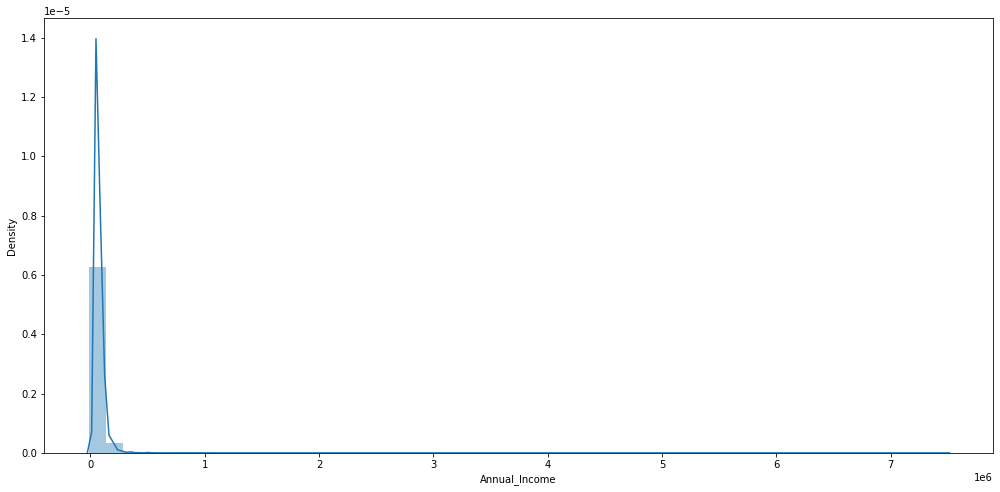

In [253]:
# check the skewness value
print('skewness in Annual_Income:',train['Annual_Income'].skew())

# plot the distribution plot of Annual_income
sns.distplot(train['Annual_Income'])

In [254]:
# check weather data has negative value or not
train[train['Annual_Income']<0]

Loan_Amount_Requested  Length_Employed Home_Owner  Annual_Income  \
9481                   2000.0              6.0       Rent   -4704.192983   
15732                  3600.0              7.0       Rent   -3120.156218   
39348                  2200.0              2.0     NoHome   -1396.667881   
42514                  4725.0              2.0       Rent  -11543.680862   
74045                  5000.0              1.0       Rent   -3995.245798   
85353                  3900.0             11.0       Rent   -2668.078070   
114717                 4200.0              1.0       Rent    -398.019726   
124136                 5375.0              3.0       Rent   -2278.630674   
126408                 5000.0              9.0       Rent   -4842.761784   

                 Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
9481           VERIFIED - income  debt_consolidation           33.60   
15732   VERIFIED - income source  debt_consolidation           35.71   
39348          VERIFIED - income  debt_consolidation           32.24   
42514               not verified  debt_consolidation           38.51   
74045   VERIFIED - income source  debt_consolidation           35.81   
85353               not verified  debt_consolidation           34.98   
114717         VERIFIED - income         credit_card           32.71   
124136         VERIFIED - income         credit_card           33.57   
126408  VERIFIED - income source  debt_consolidation           39.20   

        Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Gender  \
9481                   0.0                   9.0            14.0    Male   
15732                  0.0                   8.0            12.0  Female   
39348                  0.0                   5.0             7.0  Female   
42514                  0.0                   8.0             9.0    Male   
74045                  1.0                   6.0             7.0  Female   
85353                  1.0                   6.0            10.0  Female   
114717                 0.0                   9.0            14.0  Female   
124136                 0.0                   7.0            10.0    Male   
126408                 0.0                   5.0             7.0  Female   

        Interest_Rate  
9481              3.0  
15732             3.0  
39348             2.0  
42514             3.0  
74045             3.0  
85353             3.0  
114717            3.0  
124136            3.0  
126408            2.0

### inference - Annual_Income is  highly skeweed and it contains negative values so, for transformation we wwill preffere yeo johnson transformation

skweness in variable after Tranformation: 5.320008426545792


<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

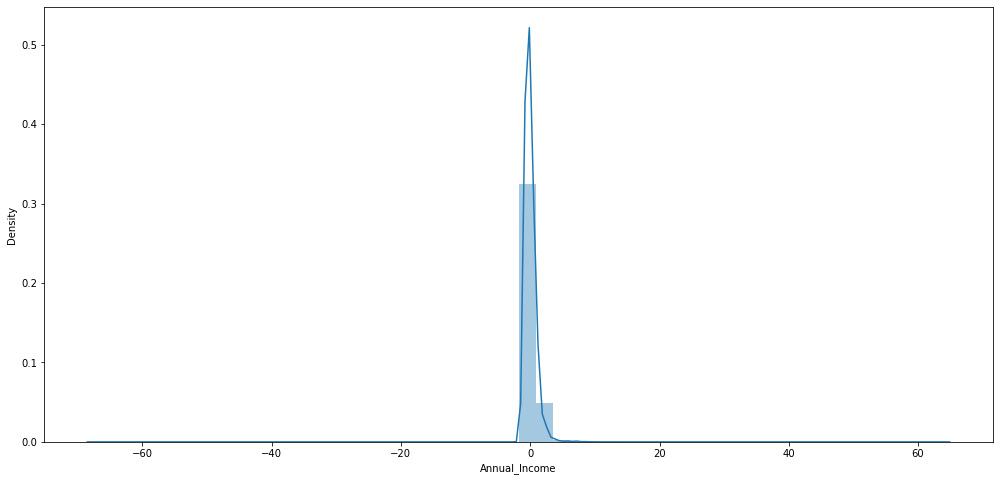

In [255]:
yeo_johnson_PT = PowerTransformer(method='yeo-johnson')
train['Annual_Income'] = yeo_johnson_PT.fit_transform(train[['Annual_Income']])
# print the skewness after transformation
print('skweness in variable after Tranformation:',train['Annual_Income'].skew())
# plot the dist plot to recheck weather data has been get converted into symmetric distribution or not
sns.distplot(train['Annual_Income'])

In [256]:
# Inquiries_Last_6Mo

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Density'>

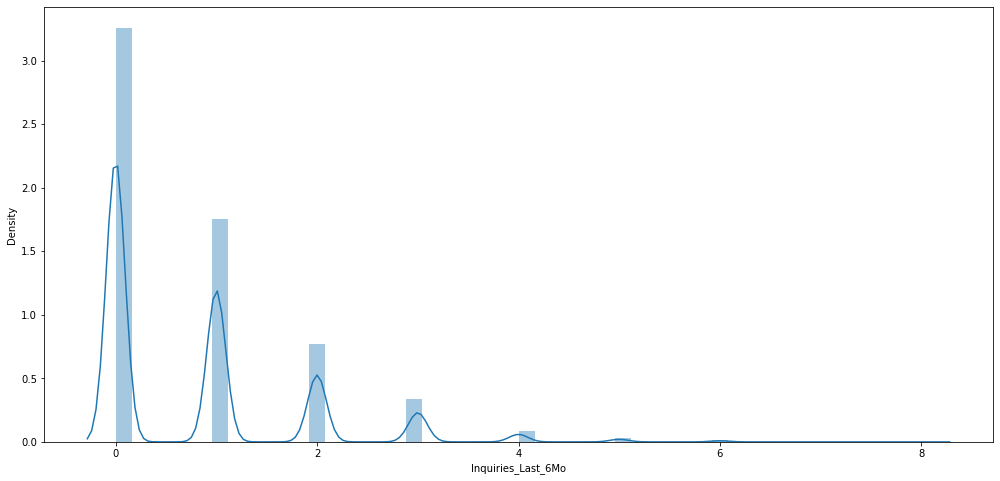

In [257]:
# print the skewness vaue of col
train['Inquiries_Last_6Mo'].skew()
# plot distribution plot to check the skewness
sns.distplot(train['Inquiries_Last_6Mo'])

In [258]:
#check weather the column has negative values
train[train['Inquiries_Last_6Mo']<=0]

Loan_Amount_Requested  Length_Employed Home_Owner  Annual_Income  \
0                      7000.0              0.0       Rent      -0.058062   
1                     30000.0              4.0   Mortgage       0.802399   
2                     24725.0              7.0   Mortgage       0.120275   
6                     18075.0              4.0       Rent       0.335785   
9                     30000.0             11.0        Own       1.923260   
...                       ...              ...        ...            ...   
164298                25000.0              1.0   Mortgage      -0.010406   
164300                24000.0              1.0       Rent       0.835220   
164303                35000.0             11.0       Rent       0.981093   
164304                20725.0             11.0       Rent       0.371180   
164305                 6000.0              8.0        Own       0.144315   

                 Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0                   not verified                 car           18.37   
1              VERIFIED - income  debt_consolidation           14.93   
2       VERIFIED - income source  debt_consolidation           15.88   
6              VERIFIED - income  debt_consolidation            5.65   
9              VERIFIED - income  debt_consolidation           11.13   
...                          ...                 ...             ...   
164298  VERIFIED - income source      small_business            0.79   
164300  VERIFIED - income source               other           14.30   
164303         VERIFIED - income  debt_consolidation           24.06   
164304  VERIFIED - income source         credit_card           13.56   
164305  VERIFIED - income source      small_business            9.12   

        Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Gender  \
0                      0.0                   9.0            14.0  Female   
1                      0.0                  12.0            24.0  Female   
2                      0.0                  12.0            16.0    Male   
6                      0.0                   9.0            12.0    Male   
9                      0.0                  24.0            43.0    Male   
...                    ...                   ...             ...     ...   
164298                 0.0                   8.0            27.0    Male   
164300                 0.0                  12.0            36.0  Female   
164303                 0.0                  10.0            39.0    Male   
164304                 0.0                  13.0            16.0    Male   
164305                 0.0                  13.0            30.0    Male   

        Interest_Rate  
0                 1.0  
1                 3.0  
2                 3.0  
6                 3.0  
9                 1.0  
...               ...  
164298            2.0  
164300            3.0  
164303            3.0  
164304            2.0  
164305            2.0  

[85665 rows x 12 columns]

### Inference - 
As the column contain value which are equal or near to 0.so,we will go for Yeo-Johnson transformation

skweness in variable after Tranformation: 0.2789677563177063


<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Density'>

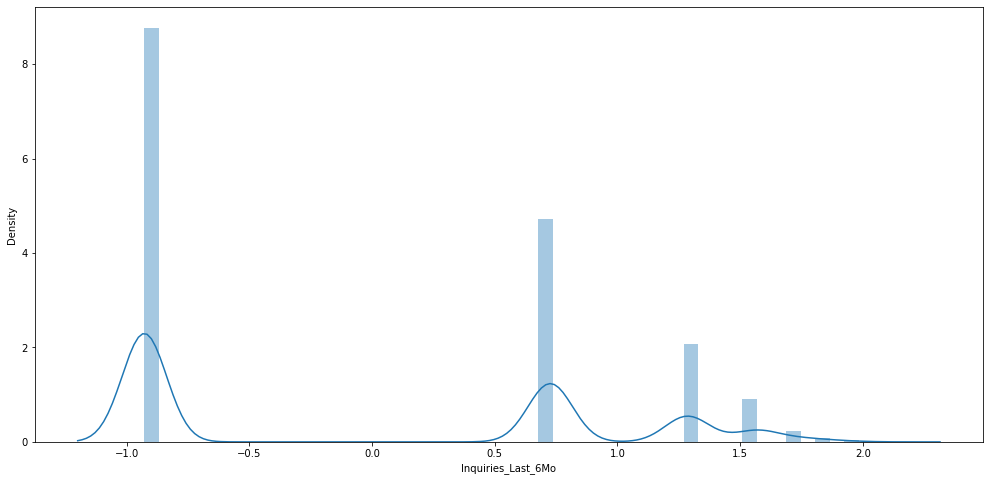

In [259]:
yeo_johnson_PT = PowerTransformer(method='yeo-johnson')
train['Inquiries_Last_6Mo'] = yeo_johnson_PT.fit_transform(train[['Inquiries_Last_6Mo']])
print('skweness in variable after Tranformation:',train['Inquiries_Last_6Mo'].skew())
sns.distplot(train['Inquiries_Last_6Mo'])

In [260]:
# Number_Open_Accounts

skewness value: 1.1640839965373095


<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Density'>

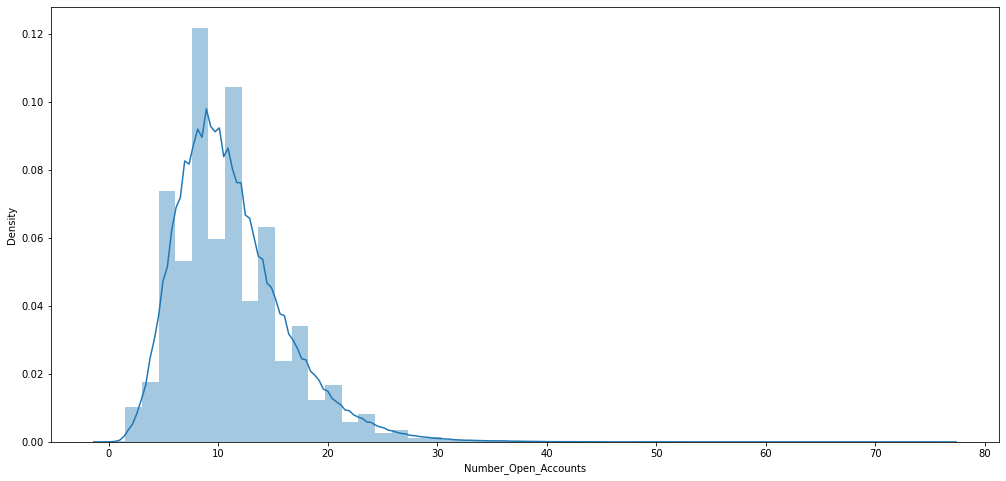

In [261]:
print('skewness value:',train['Number_Open_Accounts'].skew())
sns.distplot(train['Number_Open_Accounts'])

In [262]:
train[train['Number_Open_Accounts']<=0] 

Loan_Amount_Requested  Length_Employed Home_Owner  Annual_Income  \
8867                 16000.0              9.0       Rent       0.351057   
72538                 3550.0              1.0        Own      -0.674600   

         Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
8867   VERIFIED - income                 car             0.0   
72538  VERIFIED - income  debt_consolidation             0.0   

       Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Gender  \
8867            -0.928312                   0.0            19.0  Female   
72538           -0.928312                   0.0             3.0    Male   

       Interest_Rate  
8867             3.0  
72538            3.0

### inference - 
Number_Open_Accounts is skeweed and it contains negative values so, for transformation we will preffere yeo johnson transformation

skweness in variable after Tranformation: 0.0020815238482860578


<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Density'>

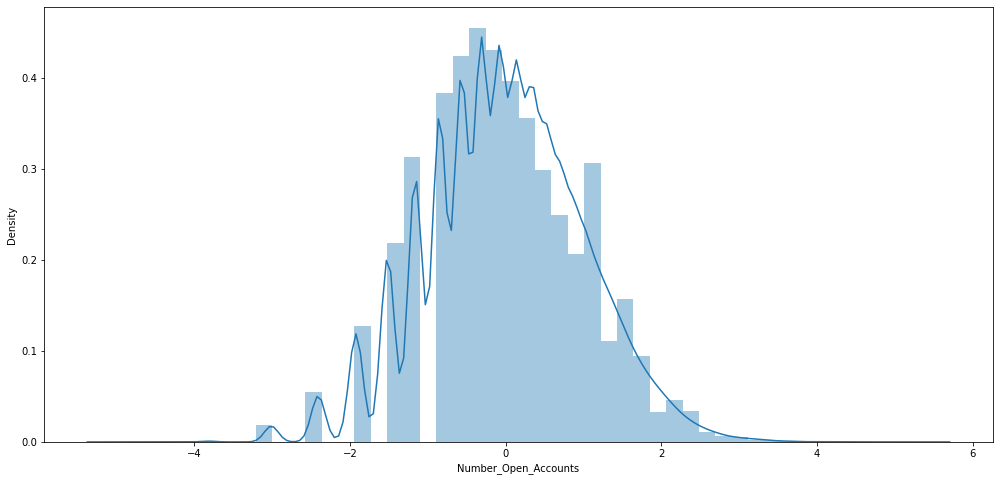

In [263]:
yeo_johnson_PT = PowerTransformer(method='yeo-johnson')
train['Number_Open_Accounts'] = yeo_johnson_PT.fit_transform(train[['Number_Open_Accounts']])
print('skweness in variable after Tranformation:',train['Number_Open_Accounts'].skew())
sns.distplot(train['Number_Open_Accounts'])

In [264]:
#Total_Accounts

Skewness value: 0.817347341039482


<AxesSubplot:xlabel='Total_Accounts', ylabel='Density'>

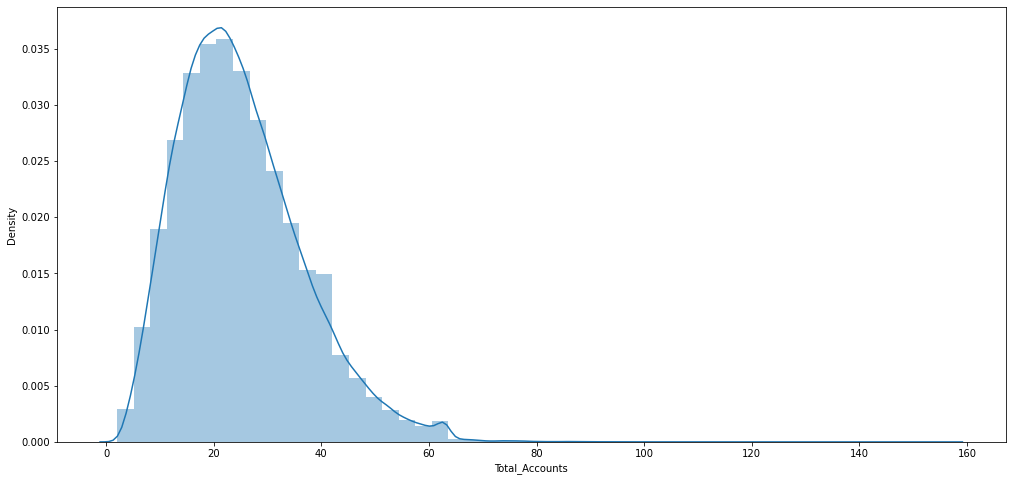

In [265]:
print('Skewness value:',train['Total_Accounts'].skew())
sns.distplot(train['Total_Accounts'])

In [266]:
train[train['Total_Accounts']<0]

Empty DataFrame
Columns: [Loan_Amount_Requested, Length_Employed, Home_Owner, Annual_Income, Income_Verified, Purpose_Of_Loan, Debt_To_Income, Inquiries_Last_6Mo, Number_Open_Accounts, Total_Accounts, Gender, Interest_Rate]
Index: []

### Inference - Total_Accounts is skeweed and it does not contains negative values so, for transformation we will prefer Box-Cox transformation

skweness in variable after Tranformation: -0.009785107057815316


<AxesSubplot:xlabel='Total_Accounts', ylabel='Density'>

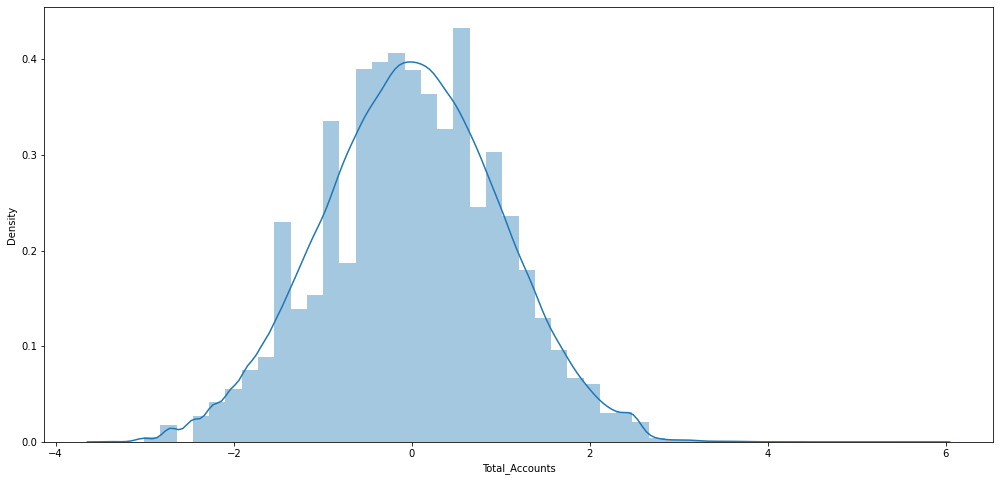

In [267]:
box_cox_PT = PowerTransformer(method='box-cox')
train['Total_Accounts'] = box_cox_PT.fit_transform(train[['Total_Accounts']])
print('skweness in variable after Tranformation:',train['Total_Accounts'].skew())
sns.distplot(train['Total_Accounts'])

In [268]:
print('Skweness in data after Transformation:\n',train.skew())

Skweness in data after Transformation:
 Loan_Amount_Requested    0.727216
Length_Employed         -0.099300
Annual_Income            5.320008
Debt_To_Income           0.192204
Inquiries_Last_6Mo       0.278968
Number_Open_Accounts     0.002082
Total_Accounts          -0.009785
Interest_Rate           -0.260932
dtype: float64


### Inference - 
The skewness from the variables has been reduced by mean of 'BOX_COX' and 'YEO_JOHNSON' Transformation

### Perform ANOVA to test After transformation the equality of means

In [269]:
#Annual_Income

class_1=train[train['Interest_Rate']==1]['Annual_Income']
class_2=train[train['Interest_Rate']==2]['Annual_Income']
class_3=train[train['Interest_Rate']==3]['Annual_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 716.3598364132993
p-value: 1.72766458071976e-310


In [270]:
#'Inquiries_Last_6Mo'

class_1=train[train['Interest_Rate']==1]['Inquiries_Last_6Mo']
class_2=train[train['Interest_Rate']==2]['Inquiries_Last_6Mo']
class_3=train[train['Interest_Rate']==3]['Inquiries_Last_6Mo']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 3387.757920389898
p-value: 0.0


# Encoding on (train)

In [271]:
# Define the categorical columns to encode
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded_train = pd.get_dummies(train, columns=cat_cols, drop_first=True)

# Encoding on (without_outlier)

In [272]:
# Define the categorical columns to encode
cat_cols = without_outlier.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded_without = pd.get_dummies(without_outlier, columns=cat_cols, drop_first=True)

# Check balancing of Data (train)

In [273]:
df_encoded_train.groupby('Interest_Rate').count()

Loan_Amount_Requested  Length_Employed  Annual_Income  \
Interest_Rate                                                          
1.0                            33806            33806          33806   
2.0                            70580            70580          70580   
3.0                            59923            59923          59923   

               Debt_To_Income  Inquiries_Last_6Mo  Number_Open_Accounts  \
Interest_Rate                                                             
1.0                     33806               33806                 33806   
2.0                     70580               70580                 70580   
3.0                     59923               59923                 59923   

               Total_Accounts  Home_Owner_NoHome  Home_Owner_None  \
Interest_Rate                                                       
1.0                     33806              33806            33806   
2.0                     70580              70580            70580   
3.0                     59923              59923            59923   

               Home_Owner_Other  ...  Purpose_Of_Loan_house  \
Interest_Rate                    ...                          
1.0                       33806  ...                  33806   
2.0                       70580  ...                  70580   
3.0                       59923  ...                  59923   

               Purpose_Of_Loan_major_purchase  Purpose_Of_Loan_medical  \
Interest_Rate                                                            
1.0                                     33806                    33806   
2.0                                     70580                    70580   
3.0                                     59923                    59923   

               Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
Interest_Rate                                                  
1.0                             33806                  33806   
2.0                             70580                  70580   
3.0                             59923                  59923   

               Purpose_Of_Loan_renewable_energy  \
Interest_Rate                                     
1.0                                       33806   
2.0                                       70580   
3.0                                       59923   

               Purpose_Of_Loan_small_business  Purpose_Of_Loan_vacation  \
Interest_Rate                                                             
1.0                                     33806                     33806   
2.0                                     70580                     70580   
3.0                                     59923                     59923   

               Purpose_Of_Loan_wedding  Gender_Male  
Interest_Rate                                        
1.0                              33806        33806  
2.0                              70580        70580  
3.0                              59923        59923  

[3 rows x 28 columns]

In [274]:
df_encoded_train['Interest_Rate'].value_counts()/len(df_encoded_train)*100

2.0    42.955651
3.0    36.469700
1.0    20.574649
Name: Interest_Rate, dtype: float64

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

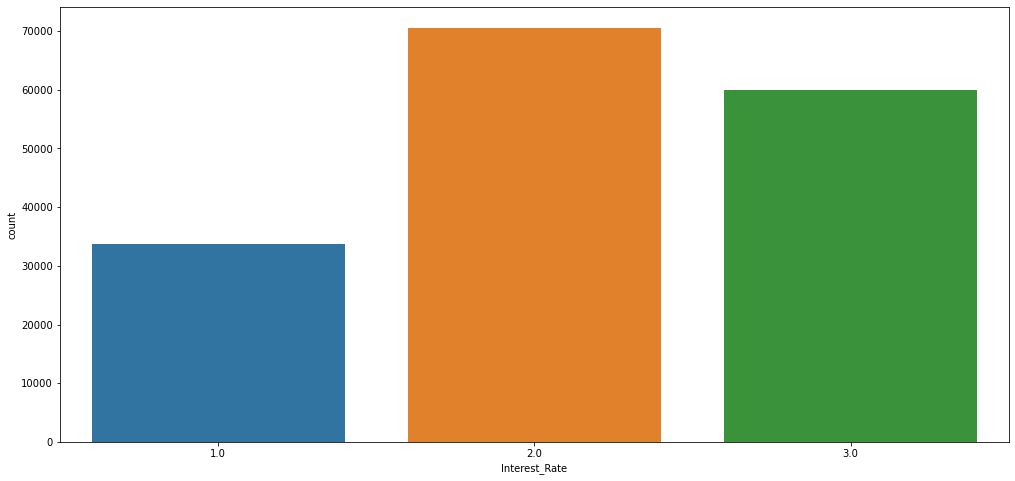

In [275]:
sns.countplot(df_encoded_train['Interest_Rate'])

# Check balancing of Data (without_outlier)

In [276]:
df_encoded_without.groupby('Interest_Rate').count()

Loan_Amount_Requested  Length_Employed  Annual_Income  \
Interest_Rate                                                          
1.0                            29935            29935          29935   
2.0                            62398            62398          62398   
3.0                            49951            49951          49951   

               Debt_To_Income  Inquiries_Last_6Mo  Number_Open_Accounts  \
Interest_Rate                                                             
1.0                     29935               29935                 29935   
2.0                     62398               62398                 62398   
3.0                     49951               49951                 49951   

               Total_Accounts  Home_Owner_NoHome  Home_Owner_None  \
Interest_Rate                                                       
1.0                     29935              29935            29935   
2.0                     62398              62398            62398   
3.0                     49951              49951            49951   

               Home_Owner_Other  ...  Purpose_Of_Loan_house  \
Interest_Rate                    ...                          
1.0                       29935  ...                  29935   
2.0                       62398  ...                  62398   
3.0                       49951  ...                  49951   

               Purpose_Of_Loan_major_purchase  Purpose_Of_Loan_medical  \
Interest_Rate                                                            
1.0                                     29935                    29935   
2.0                                     62398                    62398   
3.0                                     49951                    49951   

               Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
Interest_Rate                                                  
1.0                             29935                  29935   
2.0                             62398                  62398   
3.0                             49951                  49951   

               Purpose_Of_Loan_renewable_energy  \
Interest_Rate                                     
1.0                                       29935   
2.0                                       62398   
3.0                                       49951   

               Purpose_Of_Loan_small_business  Purpose_Of_Loan_vacation  \
Interest_Rate                                                             
1.0                                     29935                     29935   
2.0                                     62398                     62398   
3.0                                     49951                     49951   

               Purpose_Of_Loan_wedding  Gender_Male  
Interest_Rate                                        
1.0                              29935        29935  
2.0                              62398        62398  
3.0                              49951        49951  

[3 rows x 28 columns]

2.0    43.854544
3.0    35.106547
1.0    21.038908
Name: Interest_Rate, dtype: float64


<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

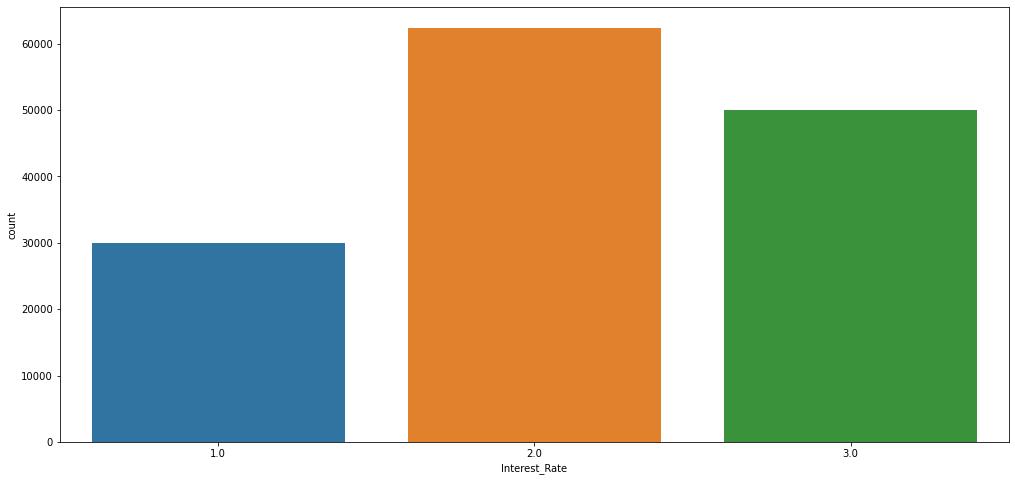

In [277]:
print(df_encoded_without['Interest_Rate'].value_counts()/len(df_encoded_without)*100)
sns.countplot(df_encoded_without['Interest_Rate'])

### Inference - 
Data is not imbalance so, there is no need to balance the data

### Inference - 
Data is quit imbalance so, if we needed to balance than we will appliy SMOTE Analysis

# Model Building On (train)

### LogisticRegression

In [278]:
x=df_encoded_train.drop('Interest_Rate', axis=1)
y=df_encoded_train['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Evaluate the model on the testing set
accuracy = lr.score(xtest, ytest)
print(f'Testing accuracy: {accuracy:.3f}')

Testing accuracy: 0.479


In [279]:
print(classification_report(ytest, lr.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.41      0.10      0.16      6721
         2.0       0.47      0.60      0.52     14018
         3.0       0.50      0.55      0.52     12123

    accuracy                           0.48     32862
   macro avg       0.46      0.42      0.40     32862
weighted avg       0.47      0.48      0.45     32862



In [280]:
print(classification_report(ytrain, lr.predict(xtrain)))

              precision    recall  f1-score   support

         1.0       0.41      0.11      0.17     27085
         2.0       0.47      0.61      0.53     56562
         3.0       0.50      0.54      0.52     47800

    accuracy                           0.48    131447
   macro avg       0.46      0.42      0.41    131447
weighted avg       0.47      0.48      0.45    131447



### Decision Tree

In [281]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(xtrain, ytrain)

In [282]:
print(classification_report(ytrain,decision_tree.predict(xtrain)))
print(classification_report(ytest,decision_tree.predict(xtest)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.30      0.31      0.30      6721
         2.0       0.45      0.44      0.45     14018
         3.0       0.46      0.46      0.46     12123

    accuracy                           0.42     32862
   macro avg       0.40      0.40      0.40     32862
weighted avg       0.42      0.42      0.42     32862



### Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
Random_forest=rf.fit(xtrain,ytrain)
rf_train_pred=Random_forest.predict(xtrain)
print(classification_report(ytrain,rf_train_pred))
rf_test_pred=Random_forest.predict(xtest)
print(classification_report(ytest,rf_test_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.43      0.21      0.28      6721
         2.0       0.48      0.60      0.54     14018
         3.0       0.56      0.55      0.55     12123

    accuracy                           0.50     32862
   macro avg       0.49      0.46      0.46     32862
weighted avg       0.50      0.50      0.49     32862



# Inference -

The accuracy of Transformation data after building the base model is 1.00 for train which represent overfit condition but for test datait is 0.50 which is better then the accuracy of original data.

# Model Building On (without_outlier)

### LogisticRegression

In [284]:
x=df_encoded_without.drop('Interest_Rate', axis=1)
y=df_encoded_without['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Evaluate the model on the testing set
accuracy = lr.score(xtest, ytest)
print(f'Testing accuracy: {accuracy:.3f}')

Testing accuracy: 0.479


In [285]:
print(classification_report(ytrain, lr.predict(xtrain)))
print(classification_report(ytest, lr.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.40      0.08      0.13     23989
         2.0       0.46      0.70      0.56     49779
         3.0       0.50      0.42      0.46     40059

    accuracy                           0.47    113827
   macro avg       0.46      0.40      0.38    113827
weighted avg       0.46      0.47      0.43    113827

              precision    recall  f1-score   support

         1.0       0.40      0.08      0.13      5946
         2.0       0.47      0.71      0.57     12619
         3.0       0.50      0.43      0.46      9892

    accuracy                           0.48     28457
   macro avg       0.46      0.40      0.39     28457
weighted avg       0.47      0.48      0.44     28457



### Decision Tree

In [286]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(xtrain, ytrain)

print(classification_report(ytrain,decision_tree.predict(xtrain)))
print(classification_report(ytest,decision_tree.predict(xtest)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     23989
         2.0       1.00      1.00      1.00     49779
         3.0       1.00      1.00      1.00     40059

    accuracy                           1.00    113827
   macro avg       1.00      1.00      1.00    113827
weighted avg       1.00      1.00      1.00    113827

              precision    recall  f1-score   support

         1.0       0.29      0.30      0.29      5946
         2.0       0.46      0.45      0.46     12619
         3.0       0.45      0.45      0.45      9892

    accuracy                           0.42     28457
   macro avg       0.40      0.40      0.40     28457
weighted avg       0.42      0.42      0.42     28457



### Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
Random_forest=rf.fit(xtrain,ytrain)
rf_train_pred=Random_forest.predict(xtrain)
print(classification_report(ytrain,rf_train_pred))
rf_test_pred=Random_forest.predict(xtest)
print(classification_report(ytest,rf_test_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     23989
         2.0       1.00      1.00      1.00     49779
         3.0       1.00      1.00      1.00     40059

    accuracy                           1.00    113827
   macro avg       1.00      1.00      1.00    113827
weighted avg       1.00      1.00      1.00    113827

              precision    recall  f1-score   support

         1.0       0.43      0.22      0.29      5946
         2.0       0.50      0.62      0.55     12619
         3.0       0.54      0.53      0.54      9892

    accuracy                           0.51     28457
   macro avg       0.49      0.46      0.46     28457
weighted avg       0.50      0.51      0.49     28457



## inference - 
As the accuracy of the model on the training data is 1 and the accuracy on the test data is only 0.51, it is likely that the model is overfitting to the training data and needs to be adjusted or improved to achieve better generalization performance on new data.

# Summary - 

After building the model on  the original data, transformed data, and outlier-treated data it is not varring much, hence we can conclude that ,
As the accuracy of the model is consistent across different data preprocessing steps, 
it suggests that the model is able to learn the underlying patterns of the data effectively and
can be relied upon for making accurate predictions or classifications.

# Ignore belowe part

In [26]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree1 = dt_model.fit(xtrain, ytrain)
# print the performance measures of test data
y_pred=decision_tree1.predict(xtest)
print(classification_report(ytest,y_pred))
# print the performance measures of train data
y_pred=decision_tree1.predict(xtrain)
print(classification_report(ytrain,y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.38      0.47     21102
         2.0       0.43      0.64      0.52     21308
         3.0       0.50      0.47      0.48     21112

    accuracy                           0.49     63522
   macro avg       0.52      0.49      0.49     63522
weighted avg       0.52      0.49      0.49     63522

              precision    recall  f1-score   support

         1.0       0.64      0.38      0.47     49478
         2.0       0.43      0.63      0.51     49272
         3.0       0.50      0.46      0.48     49468

    accuracy                           0.49    148218
   macro avg       0.52      0.49      0.49    148218
weighted avg       0.52      0.49      0.49    148218



Tune the Hyperparameters using GridSearchCV (Decision Tree)¶
Hyperparameters are the parameters in the model that are preset by the user. 
GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. 
We pass some of the hyperparameters in the decision tree to the GridSearchCV() and build the tree using the optimal values obtained using GridSearch method.

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [ ]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(xtrain, ytrain)

In [ ]:
# print the performance measures of test data
y_pred=decision_tree1.predict(xtest)
print(classification_report(ytest,y_pred))
# print the performance measures of train data
y_pred=decision_tree1.predict(xtrain)
print(classification_report(ytrain,y_pred))

In [ ]:
### Inference -

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rf=RandomForestClassifier(max_depth=150, min_samples_leaf= 5, min_samples_split= 3 , n_estimators=300, random_state = 42)
Random_forest=rf.fit(xtrain,ytrain)

In [192]:
rf_train_pred=Random_forest.predict(xtrain)
print(classification_report(ytrain,rf_train_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.82      0.83     49478
         2.0       0.80      0.79      0.79     49272
         3.0       0.79      0.81      0.80     49468

    accuracy                           0.81    148218
   macro avg       0.81      0.81      0.81    148218
weighted avg       0.81      0.81      0.81    148218



In [193]:
rf_test_pred=Random_forest.predict(xtest)
print(classification_report(ytest,rf_test_pred))

              precision    recall  f1-score   support

         1.0       0.65      0.65      0.65     21102
         2.0       0.49      0.48      0.49     21308
         3.0       0.57      0.59      0.58     21112

    accuracy                           0.57     63522
   macro avg       0.57      0.57      0.57     63522
weighted avg       0.57      0.57      0.57     63522



In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': [100,200,300,400],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2,5,6,7],
                     'min_samples_leaf': [2,5,6,7],
                     'max_leaf_nodes': [2,5,6,7]}]
rf=RandomForestClassifier(random_state = 42)
rf_tree_grid = GridSearchCV(estimator = rf, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
rf_tree_grid_model = rf_tree_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for decision tree classifier: ', rf_tree_grid_model.best_params_, '\n')

In [175]:
from sklearn.ensemble import GradientBoostingClassifier 

In [176]:
gbc=GradientBoostingClassifier()

In [177]:
gbc_model=gbc.fit(xtrain,ytrain)

In [178]:
gbc_train_pred=gbc_model.predict(xtrain)
gbc_test_pred=gbc_model.predict(xtest)

In [179]:
print(classification_report(ytrain,gbc_train_pred))

              precision    recall  f1-score   support

         1.0       0.64      0.63      0.63     49478
         2.0       0.49      0.48      0.49     49272
         3.0       0.58      0.59      0.59     49468

    accuracy                           0.57    148218
   macro avg       0.57      0.57      0.57    148218
weighted avg       0.57      0.57      0.57    148218



In [180]:
print(classification_report(ytest,gbc_test_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.63      0.63     21102
         2.0       0.50      0.48      0.49     21308
         3.0       0.57      0.58      0.58     21112

    accuracy                           0.57     63522
   macro avg       0.57      0.57      0.57     63522
weighted avg       0.56      0.57      0.57     63522



In [40]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [181]:
from catboost import CatBoostClassifier

In [182]:
cb=CatBoostClassifier()

In [183]:
cb_model=cb.fit(xtrain,ytrain)

Learning rate set to 0.102103
0:	learn: 1.0813036	total: 193ms	remaining: 3m 12s
1:	learn: 1.0679001	total: 243ms	remaining: 2m 1s
2:	learn: 1.0555129	total: 285ms	remaining: 1m 34s
3:	learn: 1.0458280	total: 329ms	remaining: 1m 22s
4:	learn: 1.0369560	total: 368ms	remaining: 1m 13s
5:	learn: 1.0285885	total: 420ms	remaining: 1m 9s
6:	learn: 1.0210407	total: 475ms	remaining: 1m 7s
7:	learn: 1.0147442	total: 522ms	remaining: 1m 4s
8:	learn: 1.0083030	total: 560ms	remaining: 1m 1s
9:	learn: 1.0027244	total: 600ms	remaining: 59.4s
10:	learn: 0.9970157	total: 647ms	remaining: 58.2s
11:	learn: 0.9921835	total: 689ms	remaining: 56.7s
12:	learn: 0.9877549	total: 734ms	remaining: 55.8s
13:	learn: 0.9834447	total: 771ms	remaining: 54.3s
14:	learn: 0.9797039	total: 813ms	remaining: 53.4s
15:	learn: 0.9760202	total: 857ms	remaining: 52.7s
16:	learn: 0.9729909	total: 899ms	remaining: 52s
17:	learn: 0.9699856	total: 947ms	remaining: 51.7s
18:	learn: 0.9662941	total: 996ms	remaining: 51.4s
19:	learn

162:	learn: 0.8679613	total: 7.6s	remaining: 39s
163:	learn: 0.8676638	total: 7.64s	remaining: 39s
164:	learn: 0.8674319	total: 7.68s	remaining: 38.9s
165:	learn: 0.8670004	total: 7.72s	remaining: 38.8s
166:	learn: 0.8668417	total: 7.75s	remaining: 38.7s
167:	learn: 0.8659756	total: 7.8s	remaining: 38.6s
168:	learn: 0.8657836	total: 7.86s	remaining: 38.6s
169:	learn: 0.8649475	total: 7.92s	remaining: 38.7s
170:	learn: 0.8640760	total: 7.97s	remaining: 38.6s
171:	learn: 0.8638929	total: 8.02s	remaining: 38.6s
172:	learn: 0.8637239	total: 8.07s	remaining: 38.6s
173:	learn: 0.8634310	total: 8.11s	remaining: 38.5s
174:	learn: 0.8631392	total: 8.16s	remaining: 38.5s
175:	learn: 0.8628116	total: 8.2s	remaining: 38.4s
176:	learn: 0.8623428	total: 8.24s	remaining: 38.3s
177:	learn: 0.8622110	total: 8.29s	remaining: 38.3s
178:	learn: 0.8617601	total: 8.33s	remaining: 38.2s
179:	learn: 0.8615264	total: 8.38s	remaining: 38.2s
180:	learn: 0.8612612	total: 8.42s	remaining: 38.1s
181:	learn: 0.86107

321:	learn: 0.8321929	total: 15s	remaining: 31.5s
322:	learn: 0.8319628	total: 15s	remaining: 31.4s
323:	learn: 0.8317160	total: 15s	remaining: 31.4s
324:	learn: 0.8316516	total: 15.1s	remaining: 31.3s
325:	learn: 0.8315902	total: 15.1s	remaining: 31.2s
326:	learn: 0.8314557	total: 15.1s	remaining: 31.2s
327:	learn: 0.8312560	total: 15.2s	remaining: 31.1s
328:	learn: 0.8308811	total: 15.2s	remaining: 31.1s
329:	learn: 0.8307433	total: 15.3s	remaining: 31s
330:	learn: 0.8306029	total: 15.3s	remaining: 31s
331:	learn: 0.8304620	total: 15.4s	remaining: 30.9s
332:	learn: 0.8303041	total: 15.4s	remaining: 30.8s
333:	learn: 0.8301615	total: 15.4s	remaining: 30.8s
334:	learn: 0.8300776	total: 15.5s	remaining: 30.7s
335:	learn: 0.8299649	total: 15.5s	remaining: 30.7s
336:	learn: 0.8298172	total: 15.5s	remaining: 30.6s
337:	learn: 0.8297261	total: 15.6s	remaining: 30.5s
338:	learn: 0.8296408	total: 15.6s	remaining: 30.5s
339:	learn: 0.8295494	total: 15.7s	remaining: 30.4s
340:	learn: 0.8294463	

482:	learn: 0.8163044	total: 21.6s	remaining: 23.2s
483:	learn: 0.8162354	total: 21.7s	remaining: 23.1s
484:	learn: 0.8161385	total: 21.7s	remaining: 23.1s
485:	learn: 0.8160358	total: 21.8s	remaining: 23s
486:	learn: 0.8159508	total: 21.8s	remaining: 23s
487:	learn: 0.8158499	total: 21.8s	remaining: 22.9s
488:	learn: 0.8157911	total: 21.9s	remaining: 22.9s
489:	learn: 0.8156826	total: 21.9s	remaining: 22.8s
490:	learn: 0.8155990	total: 21.9s	remaining: 22.8s
491:	learn: 0.8155181	total: 22s	remaining: 22.7s
492:	learn: 0.8154682	total: 22s	remaining: 22.6s
493:	learn: 0.8153276	total: 22.1s	remaining: 22.6s
494:	learn: 0.8152437	total: 22.1s	remaining: 22.6s
495:	learn: 0.8151702	total: 22.1s	remaining: 22.5s
496:	learn: 0.8150682	total: 22.2s	remaining: 22.5s
497:	learn: 0.8150206	total: 22.2s	remaining: 22.4s
498:	learn: 0.8149106	total: 22.3s	remaining: 22.4s
499:	learn: 0.8148377	total: 22.3s	remaining: 22.3s
500:	learn: 0.8147722	total: 22.3s	remaining: 22.3s
501:	learn: 0.814672

645:	learn: 0.8045734	total: 28.1s	remaining: 15.4s
646:	learn: 0.8045085	total: 28.2s	remaining: 15.4s
647:	learn: 0.8044202	total: 28.2s	remaining: 15.3s
648:	learn: 0.8043896	total: 28.2s	remaining: 15.3s
649:	learn: 0.8043304	total: 28.3s	remaining: 15.2s
650:	learn: 0.8042769	total: 28.3s	remaining: 15.2s
651:	learn: 0.8042342	total: 28.3s	remaining: 15.1s
652:	learn: 0.8041621	total: 28.4s	remaining: 15.1s
653:	learn: 0.8040853	total: 28.4s	remaining: 15s
654:	learn: 0.8039904	total: 28.5s	remaining: 15s
655:	learn: 0.8039298	total: 28.5s	remaining: 14.9s
656:	learn: 0.8038564	total: 28.5s	remaining: 14.9s
657:	learn: 0.8037735	total: 28.6s	remaining: 14.9s
658:	learn: 0.8036984	total: 28.6s	remaining: 14.8s
659:	learn: 0.8036720	total: 28.7s	remaining: 14.8s
660:	learn: 0.8036335	total: 28.7s	remaining: 14.7s
661:	learn: 0.8035833	total: 28.7s	remaining: 14.7s
662:	learn: 0.8035348	total: 28.8s	remaining: 14.6s
663:	learn: 0.8034635	total: 28.8s	remaining: 14.6s
664:	learn: 0.80

806:	learn: 0.7953695	total: 34.5s	remaining: 8.26s
807:	learn: 0.7952974	total: 34.6s	remaining: 8.21s
808:	learn: 0.7952336	total: 34.6s	remaining: 8.17s
809:	learn: 0.7951969	total: 34.6s	remaining: 8.13s
810:	learn: 0.7951473	total: 34.7s	remaining: 8.08s
811:	learn: 0.7950786	total: 34.7s	remaining: 8.04s
812:	learn: 0.7950243	total: 34.8s	remaining: 8s
813:	learn: 0.7950019	total: 34.8s	remaining: 7.95s
814:	learn: 0.7949595	total: 34.8s	remaining: 7.91s
815:	learn: 0.7949259	total: 34.9s	remaining: 7.87s
816:	learn: 0.7948753	total: 34.9s	remaining: 7.82s
817:	learn: 0.7948360	total: 35s	remaining: 7.78s
818:	learn: 0.7947602	total: 35s	remaining: 7.74s
819:	learn: 0.7947003	total: 35s	remaining: 7.69s
820:	learn: 0.7946601	total: 35.1s	remaining: 7.65s
821:	learn: 0.7945700	total: 35.1s	remaining: 7.61s
822:	learn: 0.7945337	total: 35.2s	remaining: 7.56s
823:	learn: 0.7944868	total: 35.2s	remaining: 7.52s
824:	learn: 0.7944456	total: 35.2s	remaining: 7.48s
825:	learn: 0.7944154

965:	learn: 0.7874048	total: 40.9s	remaining: 1.44s
966:	learn: 0.7873563	total: 40.9s	remaining: 1.4s
967:	learn: 0.7873085	total: 41s	remaining: 1.35s
968:	learn: 0.7872626	total: 41s	remaining: 1.31s
969:	learn: 0.7872305	total: 41.1s	remaining: 1.27s
970:	learn: 0.7872006	total: 41.1s	remaining: 1.23s
971:	learn: 0.7871318	total: 41.2s	remaining: 1.19s
972:	learn: 0.7870787	total: 41.2s	remaining: 1.14s
973:	learn: 0.7870397	total: 41.2s	remaining: 1.1s
974:	learn: 0.7869705	total: 41.3s	remaining: 1.06s
975:	learn: 0.7869144	total: 41.4s	remaining: 1.02s
976:	learn: 0.7868618	total: 41.4s	remaining: 974ms
977:	learn: 0.7868082	total: 41.4s	remaining: 932ms
978:	learn: 0.7867616	total: 41.5s	remaining: 890ms
979:	learn: 0.7867190	total: 41.5s	remaining: 847ms
980:	learn: 0.7866543	total: 41.6s	remaining: 805ms
981:	learn: 0.7866172	total: 41.6s	remaining: 763ms
982:	learn: 0.7865809	total: 41.7s	remaining: 721ms
983:	learn: 0.7865323	total: 41.7s	remaining: 678ms
984:	learn: 0.7864

In [184]:
parameter={'depth':[6,8,9],'learning_rate':[0.01,0.05,0.10],'iterations':[300,500]}
grid=GridSearchCV(estimator=cb_model,param_grid=parameter,cv=3)
grid.fit(xtrain,ytrain)

0:	learn: 1.0968887	total: 38.6ms	remaining: 11.5s
1:	learn: 1.0951495	total: 71.8ms	remaining: 10.7s
2:	learn: 1.0935242	total: 106ms	remaining: 10.5s
3:	learn: 1.0918446	total: 140ms	remaining: 10.4s
4:	learn: 1.0902517	total: 180ms	remaining: 10.6s
5:	learn: 1.0886472	total: 211ms	remaining: 10.3s
6:	learn: 1.0871148	total: 242ms	remaining: 10.1s
7:	learn: 1.0855150	total: 279ms	remaining: 10.2s
8:	learn: 1.0839439	total: 308ms	remaining: 9.95s
9:	learn: 1.0824104	total: 336ms	remaining: 9.74s
10:	learn: 1.0810075	total: 367ms	remaining: 9.64s
11:	learn: 1.0795961	total: 394ms	remaining: 9.46s
12:	learn: 1.0782258	total: 423ms	remaining: 9.34s
13:	learn: 1.0768457	total: 455ms	remaining: 9.3s
14:	learn: 1.0754389	total: 492ms	remaining: 9.34s
15:	learn: 1.0740892	total: 521ms	remaining: 9.25s
16:	learn: 1.0728122	total: 553ms	remaining: 9.2s
17:	learn: 1.0715541	total: 584ms	remaining: 9.15s
18:	learn: 1.0702821	total: 615ms	remaining: 9.1s
19:	learn: 1.0690716	total: 649ms	remainin

165:	learn: 0.9766172	total: 4.98s	remaining: 4.02s
166:	learn: 0.9762723	total: 5.01s	remaining: 3.99s
167:	learn: 0.9758573	total: 5.04s	remaining: 3.96s
168:	learn: 0.9755635	total: 5.07s	remaining: 3.93s
169:	learn: 0.9752056	total: 5.1s	remaining: 3.9s
170:	learn: 0.9748751	total: 5.13s	remaining: 3.87s
171:	learn: 0.9745630	total: 5.16s	remaining: 3.84s
172:	learn: 0.9742636	total: 5.19s	remaining: 3.81s
173:	learn: 0.9739359	total: 5.22s	remaining: 3.78s
174:	learn: 0.9736118	total: 5.25s	remaining: 3.75s
175:	learn: 0.9733178	total: 5.28s	remaining: 3.72s
176:	learn: 0.9730239	total: 5.3s	remaining: 3.68s
177:	learn: 0.9727061	total: 5.33s	remaining: 3.65s
178:	learn: 0.9723952	total: 5.36s	remaining: 3.62s
179:	learn: 0.9720830	total: 5.39s	remaining: 3.59s
180:	learn: 0.9717803	total: 5.42s	remaining: 3.56s
181:	learn: 0.9714976	total: 5.45s	remaining: 3.53s
182:	learn: 0.9711867	total: 5.47s	remaining: 3.5s
183:	learn: 0.9708874	total: 5.5s	remaining: 3.47s
184:	learn: 0.970

28:	learn: 1.0593178	total: 896ms	remaining: 8.38s
29:	learn: 1.0582734	total: 931ms	remaining: 8.38s
30:	learn: 1.0572742	total: 958ms	remaining: 8.31s
31:	learn: 1.0562130	total: 987ms	remaining: 8.26s
32:	learn: 1.0551963	total: 1.01s	remaining: 8.19s
33:	learn: 1.0541525	total: 1.04s	remaining: 8.14s
34:	learn: 1.0531825	total: 1.07s	remaining: 8.1s
35:	learn: 1.0521752	total: 1.1s	remaining: 8.07s
36:	learn: 1.0511428	total: 1.13s	remaining: 8.03s
37:	learn: 1.0501748	total: 1.16s	remaining: 7.99s
38:	learn: 1.0492332	total: 1.19s	remaining: 7.96s
39:	learn: 1.0482754	total: 1.22s	remaining: 7.92s
40:	learn: 1.0473369	total: 1.25s	remaining: 7.87s
41:	learn: 1.0464533	total: 1.27s	remaining: 7.82s
42:	learn: 1.0455314	total: 1.3s	remaining: 7.78s
43:	learn: 1.0446446	total: 1.33s	remaining: 7.76s
44:	learn: 1.0437401	total: 1.36s	remaining: 7.71s
45:	learn: 1.0428669	total: 1.39s	remaining: 7.67s
46:	learn: 1.0419642	total: 1.42s	remaining: 7.63s
47:	learn: 1.0411198	total: 1.44s	

193:	learn: 0.9684454	total: 5.68s	remaining: 3.1s
194:	learn: 0.9681154	total: 5.71s	remaining: 3.07s
195:	learn: 0.9677716	total: 5.74s	remaining: 3.04s
196:	learn: 0.9674906	total: 5.77s	remaining: 3.01s
197:	learn: 0.9671350	total: 5.79s	remaining: 2.98s
198:	learn: 0.9668620	total: 5.82s	remaining: 2.95s
199:	learn: 0.9665981	total: 5.85s	remaining: 2.92s
200:	learn: 0.9663120	total: 5.88s	remaining: 2.9s
201:	learn: 0.9660627	total: 5.91s	remaining: 2.87s
202:	learn: 0.9657434	total: 5.94s	remaining: 2.84s
203:	learn: 0.9654361	total: 5.97s	remaining: 2.81s
204:	learn: 0.9651940	total: 6s	remaining: 2.78s
205:	learn: 0.9649396	total: 6.03s	remaining: 2.75s
206:	learn: 0.9646869	total: 6.05s	remaining: 2.72s
207:	learn: 0.9644598	total: 6.08s	remaining: 2.69s
208:	learn: 0.9642175	total: 6.12s	remaining: 2.66s
209:	learn: 0.9639135	total: 6.14s	remaining: 2.63s
210:	learn: 0.9636770	total: 6.17s	remaining: 2.6s
211:	learn: 0.9634529	total: 6.2s	remaining: 2.57s
212:	learn: 0.96322

54:	learn: 1.0351343	total: 1.75s	remaining: 7.78s
55:	learn: 1.0343220	total: 1.78s	remaining: 7.75s
56:	learn: 1.0335203	total: 1.81s	remaining: 7.7s
57:	learn: 1.0327431	total: 1.84s	remaining: 7.67s
58:	learn: 1.0319484	total: 1.86s	remaining: 7.62s
59:	learn: 1.0311938	total: 1.9s	remaining: 7.6s
60:	learn: 1.0304184	total: 1.95s	remaining: 7.66s
61:	learn: 1.0297090	total: 2s	remaining: 7.66s
62:	learn: 1.0289414	total: 2.04s	remaining: 7.66s
63:	learn: 1.0281485	total: 2.08s	remaining: 7.66s
64:	learn: 1.0274203	total: 2.12s	remaining: 7.65s
65:	learn: 1.0266599	total: 2.15s	remaining: 7.63s
66:	learn: 1.0259615	total: 2.19s	remaining: 7.62s
67:	learn: 1.0252823	total: 2.23s	remaining: 7.62s
68:	learn: 1.0245875	total: 2.27s	remaining: 7.61s
69:	learn: 1.0238764	total: 2.31s	remaining: 7.59s
70:	learn: 1.0232159	total: 2.35s	remaining: 7.58s
71:	learn: 1.0225298	total: 2.39s	remaining: 7.56s
72:	learn: 1.0218376	total: 2.43s	remaining: 7.55s
73:	learn: 1.0211294	total: 2.47s	rem

217:	learn: 0.9616798	total: 6.77s	remaining: 2.55s
218:	learn: 0.9614378	total: 6.8s	remaining: 2.52s
219:	learn: 0.9612302	total: 6.83s	remaining: 2.48s
220:	learn: 0.9609488	total: 6.86s	remaining: 2.45s
221:	learn: 0.9607137	total: 6.89s	remaining: 2.42s
222:	learn: 0.9604795	total: 6.92s	remaining: 2.39s
223:	learn: 0.9602571	total: 6.94s	remaining: 2.36s
224:	learn: 0.9600413	total: 6.97s	remaining: 2.32s
225:	learn: 0.9597256	total: 7s	remaining: 2.29s
226:	learn: 0.9594990	total: 7.03s	remaining: 2.26s
227:	learn: 0.9592047	total: 7.06s	remaining: 2.23s
228:	learn: 0.9589783	total: 7.09s	remaining: 2.2s
229:	learn: 0.9587594	total: 7.12s	remaining: 2.17s
230:	learn: 0.9584886	total: 7.14s	remaining: 2.13s
231:	learn: 0.9582626	total: 7.17s	remaining: 2.1s
232:	learn: 0.9579662	total: 7.2s	remaining: 2.07s
233:	learn: 0.9577072	total: 7.23s	remaining: 2.04s
234:	learn: 0.9574811	total: 7.25s	remaining: 2.01s
235:	learn: 0.9572108	total: 7.28s	remaining: 1.98s
236:	learn: 0.95698

83:	learn: 0.9283064	total: 2.6s	remaining: 6.7s
84:	learn: 0.9278010	total: 2.63s	remaining: 6.65s
85:	learn: 0.9272679	total: 2.65s	remaining: 6.6s
86:	learn: 0.9266784	total: 2.68s	remaining: 6.56s
87:	learn: 0.9262205	total: 2.7s	remaining: 6.52s
88:	learn: 0.9257846	total: 2.73s	remaining: 6.48s
89:	learn: 0.9252976	total: 2.76s	remaining: 6.44s
90:	learn: 0.9247691	total: 2.78s	remaining: 6.39s
91:	learn: 0.9242978	total: 2.81s	remaining: 6.36s
92:	learn: 0.9238628	total: 2.84s	remaining: 6.32s
93:	learn: 0.9230835	total: 2.86s	remaining: 6.28s
94:	learn: 0.9226294	total: 2.89s	remaining: 6.23s
95:	learn: 0.9222090	total: 2.91s	remaining: 6.19s
96:	learn: 0.9218191	total: 2.94s	remaining: 6.15s
97:	learn: 0.9213958	total: 2.96s	remaining: 6.11s
98:	learn: 0.9209844	total: 2.99s	remaining: 6.08s
99:	learn: 0.9204988	total: 3.02s	remaining: 6.04s
100:	learn: 0.9199569	total: 3.05s	remaining: 6.01s
101:	learn: 0.9194675	total: 3.08s	remaining: 5.97s
102:	learn: 0.9191506	total: 3.1s

249:	learn: 0.8806103	total: 6.99s	remaining: 1.4s
250:	learn: 0.8804441	total: 7.01s	remaining: 1.37s
251:	learn: 0.8802494	total: 7.04s	remaining: 1.34s
252:	learn: 0.8798487	total: 7.06s	remaining: 1.31s
253:	learn: 0.8797083	total: 7.08s	remaining: 1.28s
254:	learn: 0.8796174	total: 7.11s	remaining: 1.25s
255:	learn: 0.8794120	total: 7.13s	remaining: 1.23s
256:	learn: 0.8792115	total: 7.16s	remaining: 1.2s
257:	learn: 0.8788633	total: 7.18s	remaining: 1.17s
258:	learn: 0.8787797	total: 7.21s	remaining: 1.14s
259:	learn: 0.8786318	total: 7.23s	remaining: 1.11s
260:	learn: 0.8785195	total: 7.26s	remaining: 1.08s
261:	learn: 0.8784255	total: 7.28s	remaining: 1.06s
262:	learn: 0.8780355	total: 7.31s	remaining: 1.03s
263:	learn: 0.8779021	total: 7.34s	remaining: 1s
264:	learn: 0.8778237	total: 7.37s	remaining: 974ms
265:	learn: 0.8776622	total: 7.4s	remaining: 946ms
266:	learn: 0.8775890	total: 7.43s	remaining: 918ms
267:	learn: 0.8775217	total: 7.45s	remaining: 889ms
268:	learn: 0.8774

115:	learn: 0.9152015	total: 3.2s	remaining: 5.08s
116:	learn: 0.9148677	total: 3.23s	remaining: 5.05s
117:	learn: 0.9145215	total: 3.26s	remaining: 5.03s
118:	learn: 0.9142223	total: 3.29s	remaining: 5s
119:	learn: 0.9136775	total: 3.32s	remaining: 4.98s
120:	learn: 0.9134293	total: 3.35s	remaining: 4.95s
121:	learn: 0.9131483	total: 3.37s	remaining: 4.92s
122:	learn: 0.9127770	total: 3.4s	remaining: 4.89s
123:	learn: 0.9122033	total: 3.43s	remaining: 4.87s
124:	learn: 0.9118491	total: 3.46s	remaining: 4.84s
125:	learn: 0.9113412	total: 3.49s	remaining: 4.82s
126:	learn: 0.9108201	total: 3.52s	remaining: 4.79s
127:	learn: 0.9105038	total: 3.54s	remaining: 4.76s
128:	learn: 0.9102260	total: 3.57s	remaining: 4.73s
129:	learn: 0.9099515	total: 3.6s	remaining: 4.71s
130:	learn: 0.9096751	total: 3.63s	remaining: 4.68s
131:	learn: 0.9094280	total: 3.65s	remaining: 4.65s
132:	learn: 0.9091701	total: 3.68s	remaining: 4.62s
133:	learn: 0.9088971	total: 3.71s	remaining: 4.59s
134:	learn: 0.9086

281:	learn: 0.8757316	total: 7.57s	remaining: 483ms
282:	learn: 0.8755403	total: 7.6s	remaining: 456ms
283:	learn: 0.8754246	total: 7.62s	remaining: 430ms
284:	learn: 0.8751699	total: 7.65s	remaining: 403ms
285:	learn: 0.8749110	total: 7.68s	remaining: 376ms
286:	learn: 0.8746994	total: 7.71s	remaining: 349ms
287:	learn: 0.8743917	total: 7.73s	remaining: 322ms
288:	learn: 0.8742870	total: 7.76s	remaining: 295ms
289:	learn: 0.8742185	total: 7.79s	remaining: 269ms
290:	learn: 0.8740624	total: 7.81s	remaining: 242ms
291:	learn: 0.8739885	total: 7.83s	remaining: 215ms
292:	learn: 0.8738385	total: 7.86s	remaining: 188ms
293:	learn: 0.8737335	total: 7.88s	remaining: 161ms
294:	learn: 0.8735209	total: 7.91s	remaining: 134ms
295:	learn: 0.8734358	total: 7.93s	remaining: 107ms
296:	learn: 0.8731602	total: 7.96s	remaining: 80.4ms
297:	learn: 0.8729838	total: 7.98s	remaining: 53.6ms
298:	learn: 0.8727966	total: 8.01s	remaining: 26.8ms
299:	learn: 0.8726282	total: 8.03s	remaining: 0us
0:	learn: 1.

145:	learn: 0.9052634	total: 3.99s	remaining: 4.21s
146:	learn: 0.9051023	total: 4.01s	remaining: 4.17s
147:	learn: 0.9047546	total: 4.04s	remaining: 4.15s
148:	learn: 0.9045079	total: 4.07s	remaining: 4.12s
149:	learn: 0.9043018	total: 4.09s	remaining: 4.09s
150:	learn: 0.9040290	total: 4.12s	remaining: 4.07s
151:	learn: 0.9036351	total: 4.15s	remaining: 4.04s
152:	learn: 0.9034111	total: 4.17s	remaining: 4.01s
153:	learn: 0.9030383	total: 4.2s	remaining: 3.98s
154:	learn: 0.9026415	total: 4.23s	remaining: 3.95s
155:	learn: 0.9023368	total: 4.25s	remaining: 3.93s
156:	learn: 0.9019516	total: 4.28s	remaining: 3.9s
157:	learn: 0.9017182	total: 4.3s	remaining: 3.87s
158:	learn: 0.9014684	total: 4.33s	remaining: 3.84s
159:	learn: 0.9012698	total: 4.36s	remaining: 3.81s
160:	learn: 0.9009132	total: 4.38s	remaining: 3.78s
161:	learn: 0.9007163	total: 4.41s	remaining: 3.76s
162:	learn: 0.9004750	total: 4.43s	remaining: 3.73s
163:	learn: 0.9002494	total: 4.46s	remaining: 3.7s
164:	learn: 0.90

8:	learn: 1.0087731	total: 258ms	remaining: 8.34s
9:	learn: 1.0028182	total: 285ms	remaining: 8.26s
10:	learn: 0.9973874	total: 313ms	remaining: 8.23s
11:	learn: 0.9917037	total: 340ms	remaining: 8.16s
12:	learn: 0.9872108	total: 368ms	remaining: 8.12s
13:	learn: 0.9830959	total: 397ms	remaining: 8.1s
14:	learn: 0.9797862	total: 424ms	remaining: 8.06s
15:	learn: 0.9764572	total: 455ms	remaining: 8.08s
16:	learn: 0.9730827	total: 483ms	remaining: 8.04s
17:	learn: 0.9698263	total: 511ms	remaining: 8s
18:	learn: 0.9670378	total: 541ms	remaining: 7.99s
19:	learn: 0.9645384	total: 568ms	remaining: 7.95s
20:	learn: 0.9615860	total: 598ms	remaining: 7.94s
21:	learn: 0.9590791	total: 626ms	remaining: 7.91s
22:	learn: 0.9567726	total: 657ms	remaining: 7.91s
23:	learn: 0.9545923	total: 686ms	remaining: 7.89s
24:	learn: 0.9527029	total: 711ms	remaining: 7.82s
25:	learn: 0.9500550	total: 738ms	remaining: 7.77s
26:	learn: 0.9482320	total: 767ms	remaining: 7.75s
27:	learn: 0.9467926	total: 796ms	rem

170:	learn: 0.8591142	total: 4.61s	remaining: 3.48s
171:	learn: 0.8589509	total: 4.63s	remaining: 3.45s
172:	learn: 0.8585385	total: 4.67s	remaining: 3.42s
173:	learn: 0.8581574	total: 4.7s	remaining: 3.4s
174:	learn: 0.8573916	total: 4.72s	remaining: 3.38s
175:	learn: 0.8571547	total: 4.75s	remaining: 3.35s
176:	learn: 0.8569748	total: 4.78s	remaining: 3.32s
177:	learn: 0.8567878	total: 4.81s	remaining: 3.29s
178:	learn: 0.8564069	total: 4.83s	remaining: 3.27s
179:	learn: 0.8562354	total: 4.86s	remaining: 3.24s
180:	learn: 0.8561466	total: 4.88s	remaining: 3.21s
181:	learn: 0.8556711	total: 4.91s	remaining: 3.19s
182:	learn: 0.8555647	total: 4.94s	remaining: 3.16s
183:	learn: 0.8553450	total: 4.96s	remaining: 3.13s
184:	learn: 0.8551637	total: 4.99s	remaining: 3.1s
185:	learn: 0.8548110	total: 5.02s	remaining: 3.08s
186:	learn: 0.8545482	total: 5.04s	remaining: 3.05s
187:	learn: 0.8544237	total: 5.07s	remaining: 3.02s
188:	learn: 0.8542836	total: 5.1s	remaining: 2.99s
189:	learn: 0.85

30:	learn: 0.9426614	total: 980ms	remaining: 8.51s
31:	learn: 0.9409568	total: 1.01s	remaining: 8.48s
32:	learn: 0.9394295	total: 1.04s	remaining: 8.4s
33:	learn: 0.9376435	total: 1.06s	remaining: 8.33s
34:	learn: 0.9365892	total: 1.09s	remaining: 8.26s
35:	learn: 0.9353868	total: 1.11s	remaining: 8.17s
36:	learn: 0.9342683	total: 1.14s	remaining: 8.11s
37:	learn: 0.9331336	total: 1.17s	remaining: 8.04s
38:	learn: 0.9319239	total: 1.2s	remaining: 8.03s
39:	learn: 0.9307841	total: 1.23s	remaining: 7.97s
40:	learn: 0.9299040	total: 1.25s	remaining: 7.91s
41:	learn: 0.9288161	total: 1.28s	remaining: 7.85s
42:	learn: 0.9277565	total: 1.3s	remaining: 7.79s
43:	learn: 0.9268618	total: 1.33s	remaining: 7.72s
44:	learn: 0.9258508	total: 1.35s	remaining: 7.67s
45:	learn: 0.9240959	total: 1.38s	remaining: 7.61s
46:	learn: 0.9232451	total: 1.41s	remaining: 7.57s
47:	learn: 0.9222576	total: 1.43s	remaining: 7.53s
48:	learn: 0.9210258	total: 1.46s	remaining: 7.49s
49:	learn: 0.9203355	total: 1.49s	

190:	learn: 0.8572097	total: 5.54s	remaining: 3.16s
191:	learn: 0.8568489	total: 5.57s	remaining: 3.13s
192:	learn: 0.8567089	total: 5.59s	remaining: 3.1s
193:	learn: 0.8565330	total: 5.62s	remaining: 3.07s
194:	learn: 0.8563593	total: 5.64s	remaining: 3.04s
195:	learn: 0.8561398	total: 5.67s	remaining: 3.01s
196:	learn: 0.8559652	total: 5.69s	remaining: 2.97s
197:	learn: 0.8558461	total: 5.71s	remaining: 2.94s
198:	learn: 0.8554535	total: 5.74s	remaining: 2.91s
199:	learn: 0.8550397	total: 5.77s	remaining: 2.88s
200:	learn: 0.8546924	total: 5.79s	remaining: 2.85s
201:	learn: 0.8542855	total: 5.82s	remaining: 2.82s
202:	learn: 0.8538625	total: 5.84s	remaining: 2.79s
203:	learn: 0.8535473	total: 5.87s	remaining: 2.76s
204:	learn: 0.8534277	total: 5.9s	remaining: 2.73s
205:	learn: 0.8532519	total: 5.93s	remaining: 2.7s
206:	learn: 0.8527042	total: 5.96s	remaining: 2.68s
207:	learn: 0.8525689	total: 5.99s	remaining: 2.65s
208:	learn: 0.8522726	total: 6.02s	remaining: 2.62s
209:	learn: 0.8

54:	learn: 0.9171948	total: 1.58s	remaining: 7.04s
55:	learn: 0.9163258	total: 1.61s	remaining: 7.01s
56:	learn: 0.9157168	total: 1.64s	remaining: 6.98s
57:	learn: 0.9150646	total: 1.66s	remaining: 6.94s
58:	learn: 0.9141433	total: 1.69s	remaining: 6.91s
59:	learn: 0.9128942	total: 1.72s	remaining: 6.89s
60:	learn: 0.9123591	total: 1.75s	remaining: 6.86s
61:	learn: 0.9118453	total: 1.78s	remaining: 6.82s
62:	learn: 0.9111602	total: 1.81s	remaining: 6.81s
63:	learn: 0.9104652	total: 1.84s	remaining: 6.77s
64:	learn: 0.9096138	total: 1.87s	remaining: 6.75s
65:	learn: 0.9089946	total: 1.9s	remaining: 6.72s
66:	learn: 0.9085859	total: 1.92s	remaining: 6.69s
67:	learn: 0.9081258	total: 1.95s	remaining: 6.66s
68:	learn: 0.9078065	total: 1.98s	remaining: 6.62s
69:	learn: 0.9073171	total: 2.01s	remaining: 6.6s
70:	learn: 0.9068526	total: 2.04s	remaining: 6.58s
71:	learn: 0.9060159	total: 2.06s	remaining: 6.54s
72:	learn: 0.9047909	total: 2.09s	remaining: 6.51s
73:	learn: 0.9043953	total: 2.12s

218:	learn: 0.8490171	total: 6.08s	remaining: 2.25s
219:	learn: 0.8485548	total: 6.12s	remaining: 2.22s
220:	learn: 0.8484312	total: 6.14s	remaining: 2.2s
221:	learn: 0.8483339	total: 6.17s	remaining: 2.17s
222:	learn: 0.8482511	total: 6.19s	remaining: 2.14s
223:	learn: 0.8480584	total: 6.22s	remaining: 2.11s
224:	learn: 0.8477675	total: 6.24s	remaining: 2.08s
225:	learn: 0.8475003	total: 6.27s	remaining: 2.05s
226:	learn: 0.8473486	total: 6.3s	remaining: 2.03s
227:	learn: 0.8471885	total: 6.33s	remaining: 2s
228:	learn: 0.8467919	total: 6.35s	remaining: 1.97s
229:	learn: 0.8464677	total: 6.38s	remaining: 1.94s
230:	learn: 0.8461800	total: 6.41s	remaining: 1.91s
231:	learn: 0.8458960	total: 6.43s	remaining: 1.88s
232:	learn: 0.8457689	total: 6.46s	remaining: 1.86s
233:	learn: 0.8456701	total: 6.48s	remaining: 1.83s
234:	learn: 0.8455383	total: 6.51s	remaining: 1.8s
235:	learn: 0.8453412	total: 6.54s	remaining: 1.77s
236:	learn: 0.8452299	total: 6.56s	remaining: 1.74s
237:	learn: 0.8451

79:	learn: 1.0170882	total: 2.44s	remaining: 12.8s
80:	learn: 1.0164471	total: 2.47s	remaining: 12.8s
81:	learn: 1.0158119	total: 2.5s	remaining: 12.7s
82:	learn: 1.0152044	total: 2.53s	remaining: 12.7s
83:	learn: 1.0145377	total: 2.55s	remaining: 12.6s
84:	learn: 1.0139561	total: 2.58s	remaining: 12.6s
85:	learn: 1.0133431	total: 2.61s	remaining: 12.6s
86:	learn: 1.0127390	total: 2.64s	remaining: 12.5s
87:	learn: 1.0121659	total: 2.67s	remaining: 12.5s
88:	learn: 1.0115396	total: 2.7s	remaining: 12.5s
89:	learn: 1.0109852	total: 2.73s	remaining: 12.4s
90:	learn: 1.0103249	total: 2.76s	remaining: 12.4s
91:	learn: 1.0097776	total: 2.78s	remaining: 12.3s
92:	learn: 1.0091755	total: 2.81s	remaining: 12.3s
93:	learn: 1.0085934	total: 2.84s	remaining: 12.3s
94:	learn: 1.0080566	total: 2.87s	remaining: 12.3s
95:	learn: 1.0074789	total: 2.91s	remaining: 12.2s
96:	learn: 1.0068903	total: 2.94s	remaining: 12.2s
97:	learn: 1.0063339	total: 2.97s	remaining: 12.2s
98:	learn: 1.0057810	total: 3s	re

241:	learn: 0.9553237	total: 7.19s	remaining: 7.67s
242:	learn: 0.9551135	total: 7.22s	remaining: 7.64s
243:	learn: 0.9549193	total: 7.27s	remaining: 7.63s
244:	learn: 0.9547004	total: 7.32s	remaining: 7.62s
245:	learn: 0.9544735	total: 7.4s	remaining: 7.64s
246:	learn: 0.9542580	total: 7.45s	remaining: 7.63s
247:	learn: 0.9540705	total: 7.47s	remaining: 7.59s
248:	learn: 0.9538860	total: 7.5s	remaining: 7.56s
249:	learn: 0.9536728	total: 7.53s	remaining: 7.53s
250:	learn: 0.9534064	total: 7.57s	remaining: 7.5s
251:	learn: 0.9532183	total: 7.59s	remaining: 7.47s
252:	learn: 0.9529817	total: 7.63s	remaining: 7.45s
253:	learn: 0.9528112	total: 7.65s	remaining: 7.41s
254:	learn: 0.9525956	total: 7.68s	remaining: 7.38s
255:	learn: 0.9523934	total: 7.71s	remaining: 7.35s
256:	learn: 0.9521676	total: 7.74s	remaining: 7.32s
257:	learn: 0.9519871	total: 7.76s	remaining: 7.28s
258:	learn: 0.9517868	total: 7.79s	remaining: 7.25s
259:	learn: 0.9515255	total: 7.82s	remaining: 7.22s
260:	learn: 0.9

407:	learn: 0.9298098	total: 12.1s	remaining: 2.73s
408:	learn: 0.9297129	total: 12.2s	remaining: 2.7s
409:	learn: 0.9295571	total: 12.2s	remaining: 2.67s
410:	learn: 0.9294309	total: 12.2s	remaining: 2.64s
411:	learn: 0.9292741	total: 12.2s	remaining: 2.61s
412:	learn: 0.9291864	total: 12.3s	remaining: 2.58s
413:	learn: 0.9290776	total: 12.3s	remaining: 2.55s
414:	learn: 0.9289820	total: 12.3s	remaining: 2.52s
415:	learn: 0.9288735	total: 12.3s	remaining: 2.49s
416:	learn: 0.9287780	total: 12.4s	remaining: 2.46s
417:	learn: 0.9286733	total: 12.4s	remaining: 2.43s
418:	learn: 0.9285442	total: 12.4s	remaining: 2.4s
419:	learn: 0.9283555	total: 12.5s	remaining: 2.37s
420:	learn: 0.9282120	total: 12.5s	remaining: 2.34s
421:	learn: 0.9280884	total: 12.5s	remaining: 2.31s
422:	learn: 0.9280019	total: 12.5s	remaining: 2.28s
423:	learn: 0.9279136	total: 12.6s	remaining: 2.25s
424:	learn: 0.9278124	total: 12.6s	remaining: 2.22s
425:	learn: 0.9277019	total: 12.6s	remaining: 2.19s
426:	learn: 0.

71:	learn: 1.0228229	total: 2.42s	remaining: 14.4s
72:	learn: 1.0221522	total: 2.46s	remaining: 14.4s
73:	learn: 1.0214442	total: 2.49s	remaining: 14.4s
74:	learn: 1.0207728	total: 2.52s	remaining: 14.3s
75:	learn: 1.0201398	total: 2.55s	remaining: 14.3s
76:	learn: 1.0194451	total: 2.58s	remaining: 14.2s
77:	learn: 1.0187823	total: 2.61s	remaining: 14.1s
78:	learn: 1.0181775	total: 2.65s	remaining: 14.1s
79:	learn: 1.0175957	total: 2.67s	remaining: 14s
80:	learn: 1.0170091	total: 2.7s	remaining: 14s
81:	learn: 1.0163844	total: 2.73s	remaining: 13.9s
82:	learn: 1.0157749	total: 2.76s	remaining: 13.9s
83:	learn: 1.0151696	total: 2.79s	remaining: 13.8s
84:	learn: 1.0144763	total: 2.82s	remaining: 13.8s
85:	learn: 1.0138840	total: 2.85s	remaining: 13.7s
86:	learn: 1.0132600	total: 2.88s	remaining: 13.7s
87:	learn: 1.0126760	total: 2.91s	remaining: 13.6s
88:	learn: 1.0120959	total: 2.94s	remaining: 13.6s
89:	learn: 1.0115331	total: 2.97s	remaining: 13.5s
90:	learn: 1.0108680	total: 3s	remai

232:	learn: 0.9582592	total: 7.46s	remaining: 8.55s
233:	learn: 0.9580253	total: 7.49s	remaining: 8.51s
234:	learn: 0.9577906	total: 7.51s	remaining: 8.47s
235:	learn: 0.9575199	total: 7.54s	remaining: 8.43s
236:	learn: 0.9573138	total: 7.57s	remaining: 8.39s
237:	learn: 0.9571094	total: 7.59s	remaining: 8.36s
238:	learn: 0.9568716	total: 7.62s	remaining: 8.32s
239:	learn: 0.9566696	total: 7.65s	remaining: 8.29s
240:	learn: 0.9563837	total: 7.68s	remaining: 8.25s
241:	learn: 0.9561943	total: 7.71s	remaining: 8.21s
242:	learn: 0.9559171	total: 7.73s	remaining: 8.18s
243:	learn: 0.9557320	total: 7.76s	remaining: 8.14s
244:	learn: 0.9555168	total: 7.79s	remaining: 8.11s
245:	learn: 0.9552861	total: 7.82s	remaining: 8.07s
246:	learn: 0.9550838	total: 7.85s	remaining: 8.04s
247:	learn: 0.9548200	total: 7.88s	remaining: 8s
248:	learn: 0.9546152	total: 7.9s	remaining: 7.97s
249:	learn: 0.9544298	total: 7.93s	remaining: 7.93s
250:	learn: 0.9541716	total: 7.96s	remaining: 7.9s
251:	learn: 0.953

392:	learn: 0.9327332	total: 12.3s	remaining: 3.33s
393:	learn: 0.9326312	total: 12.3s	remaining: 3.31s
394:	learn: 0.9325144	total: 12.3s	remaining: 3.27s
395:	learn: 0.9324046	total: 12.3s	remaining: 3.24s
396:	learn: 0.9323068	total: 12.4s	remaining: 3.21s
397:	learn: 0.9322082	total: 12.4s	remaining: 3.18s
398:	learn: 0.9321084	total: 12.4s	remaining: 3.15s
399:	learn: 0.9320134	total: 12.5s	remaining: 3.11s
400:	learn: 0.9319237	total: 12.5s	remaining: 3.08s
401:	learn: 0.9318553	total: 12.5s	remaining: 3.05s
402:	learn: 0.9317112	total: 12.5s	remaining: 3.02s
403:	learn: 0.9316138	total: 12.6s	remaining: 2.99s
404:	learn: 0.9314690	total: 12.6s	remaining: 2.95s
405:	learn: 0.9313589	total: 12.6s	remaining: 2.92s
406:	learn: 0.9312627	total: 12.6s	remaining: 2.89s
407:	learn: 0.9311587	total: 12.7s	remaining: 2.86s
408:	learn: 0.9310676	total: 12.7s	remaining: 2.82s
409:	learn: 0.9309062	total: 12.7s	remaining: 2.79s
410:	learn: 0.9307537	total: 12.8s	remaining: 2.76s
411:	learn: 

56:	learn: 1.0335203	total: 1.81s	remaining: 14.1s
57:	learn: 1.0327431	total: 1.84s	remaining: 14s
58:	learn: 1.0319484	total: 1.87s	remaining: 14s
59:	learn: 1.0311938	total: 1.9s	remaining: 14s
60:	learn: 1.0304184	total: 1.94s	remaining: 13.9s
61:	learn: 1.0297090	total: 1.96s	remaining: 13.9s
62:	learn: 1.0289414	total: 1.99s	remaining: 13.8s
63:	learn: 1.0281485	total: 2.02s	remaining: 13.8s
64:	learn: 1.0274203	total: 2.06s	remaining: 13.8s
65:	learn: 1.0266599	total: 2.09s	remaining: 13.8s
66:	learn: 1.0259615	total: 2.12s	remaining: 13.7s
67:	learn: 1.0252823	total: 2.15s	remaining: 13.7s
68:	learn: 1.0245875	total: 2.19s	remaining: 13.7s
69:	learn: 1.0238764	total: 2.22s	remaining: 13.6s
70:	learn: 1.0232159	total: 2.25s	remaining: 13.6s
71:	learn: 1.0225298	total: 2.28s	remaining: 13.6s
72:	learn: 1.0218376	total: 2.31s	remaining: 13.5s
73:	learn: 1.0211294	total: 2.34s	remaining: 13.5s
74:	learn: 1.0204400	total: 2.37s	remaining: 13.4s
75:	learn: 1.0197780	total: 2.4s	remai

217:	learn: 0.9616798	total: 6.83s	remaining: 8.84s
218:	learn: 0.9614378	total: 6.86s	remaining: 8.81s
219:	learn: 0.9612302	total: 6.89s	remaining: 8.77s
220:	learn: 0.9609488	total: 6.92s	remaining: 8.74s
221:	learn: 0.9607137	total: 6.95s	remaining: 8.71s
222:	learn: 0.9604795	total: 6.98s	remaining: 8.67s
223:	learn: 0.9602571	total: 7s	remaining: 8.63s
224:	learn: 0.9600413	total: 7.03s	remaining: 8.6s
225:	learn: 0.9597256	total: 7.06s	remaining: 8.56s
226:	learn: 0.9594990	total: 7.08s	remaining: 8.52s
227:	learn: 0.9592047	total: 7.11s	remaining: 8.48s
228:	learn: 0.9589783	total: 7.14s	remaining: 8.45s
229:	learn: 0.9587594	total: 7.17s	remaining: 8.41s
230:	learn: 0.9584886	total: 7.19s	remaining: 8.38s
231:	learn: 0.9582626	total: 7.22s	remaining: 8.34s
232:	learn: 0.9579662	total: 7.25s	remaining: 8.3s
233:	learn: 0.9577072	total: 7.28s	remaining: 8.27s
234:	learn: 0.9574811	total: 7.3s	remaining: 8.23s
235:	learn: 0.9572108	total: 7.33s	remaining: 8.2s
236:	learn: 0.95698

380:	learn: 0.9339225	total: 12.1s	remaining: 3.79s
381:	learn: 0.9337986	total: 12.2s	remaining: 3.77s
382:	learn: 0.9336856	total: 12.3s	remaining: 3.75s
383:	learn: 0.9335708	total: 12.3s	remaining: 3.71s
384:	learn: 0.9334569	total: 12.3s	remaining: 3.69s
385:	learn: 0.9333417	total: 12.4s	remaining: 3.65s
386:	learn: 0.9332354	total: 12.4s	remaining: 3.62s
387:	learn: 0.9331313	total: 12.4s	remaining: 3.59s
388:	learn: 0.9330063	total: 12.5s	remaining: 3.56s
389:	learn: 0.9328028	total: 12.5s	remaining: 3.53s
390:	learn: 0.9326602	total: 12.5s	remaining: 3.5s
391:	learn: 0.9325410	total: 12.6s	remaining: 3.46s
392:	learn: 0.9324299	total: 12.6s	remaining: 3.43s
393:	learn: 0.9322795	total: 12.6s	remaining: 3.4s
394:	learn: 0.9320995	total: 12.7s	remaining: 3.37s
395:	learn: 0.9320030	total: 12.7s	remaining: 3.34s
396:	learn: 0.9319008	total: 12.7s	remaining: 3.3s
397:	learn: 0.9317458	total: 12.8s	remaining: 3.27s
398:	learn: 0.9316498	total: 12.8s	remaining: 3.24s
399:	learn: 0.9

47:	learn: 0.9546627	total: 1.54s	remaining: 14.5s
48:	learn: 0.9536332	total: 1.57s	remaining: 14.5s
49:	learn: 0.9527292	total: 1.6s	remaining: 14.4s
50:	learn: 0.9516705	total: 1.63s	remaining: 14.3s
51:	learn: 0.9507511	total: 1.65s	remaining: 14.2s
52:	learn: 0.9498511	total: 1.68s	remaining: 14.1s
53:	learn: 0.9490923	total: 1.7s	remaining: 14.1s
54:	learn: 0.9480789	total: 1.73s	remaining: 14s
55:	learn: 0.9472209	total: 1.76s	remaining: 14s
56:	learn: 0.9461392	total: 1.8s	remaining: 14s
57:	learn: 0.9453575	total: 1.83s	remaining: 13.9s
58:	learn: 0.9445701	total: 1.86s	remaining: 13.9s
59:	learn: 0.9437065	total: 1.9s	remaining: 13.9s
60:	learn: 0.9428598	total: 1.92s	remaining: 13.8s
61:	learn: 0.9421621	total: 1.95s	remaining: 13.8s
62:	learn: 0.9414263	total: 1.99s	remaining: 13.8s
63:	learn: 0.9403863	total: 2.03s	remaining: 13.8s
64:	learn: 0.9396633	total: 2.09s	remaining: 14s
65:	learn: 0.9390383	total: 2.14s	remaining: 14.1s
66:	learn: 0.9383817	total: 2.17s	remaining

211:	learn: 0.8872077	total: 6.54s	remaining: 8.89s
212:	learn: 0.8868740	total: 6.57s	remaining: 8.86s
213:	learn: 0.8867245	total: 6.6s	remaining: 8.82s
214:	learn: 0.8865893	total: 6.63s	remaining: 8.79s
215:	learn: 0.8863693	total: 6.66s	remaining: 8.76s
216:	learn: 0.8862218	total: 6.69s	remaining: 8.73s
217:	learn: 0.8859985	total: 6.72s	remaining: 8.69s
218:	learn: 0.8858862	total: 6.75s	remaining: 8.65s
219:	learn: 0.8857730	total: 6.77s	remaining: 8.62s
220:	learn: 0.8856641	total: 6.79s	remaining: 8.58s
221:	learn: 0.8854601	total: 6.82s	remaining: 8.54s
222:	learn: 0.8852643	total: 6.84s	remaining: 8.5s
223:	learn: 0.8851394	total: 6.87s	remaining: 8.46s
224:	learn: 0.8849600	total: 6.89s	remaining: 8.42s
225:	learn: 0.8847629	total: 6.92s	remaining: 8.38s
226:	learn: 0.8846568	total: 6.94s	remaining: 8.35s
227:	learn: 0.8844291	total: 6.97s	remaining: 8.31s
228:	learn: 0.8843080	total: 6.99s	remaining: 8.27s
229:	learn: 0.8837999	total: 7.02s	remaining: 8.24s
230:	learn: 0.

373:	learn: 0.8586955	total: 11.2s	remaining: 3.79s
374:	learn: 0.8584478	total: 11.3s	remaining: 3.76s
375:	learn: 0.8583400	total: 11.3s	remaining: 3.73s
376:	learn: 0.8580740	total: 11.3s	remaining: 3.7s
377:	learn: 0.8579797	total: 11.4s	remaining: 3.67s
378:	learn: 0.8576698	total: 11.4s	remaining: 3.63s
379:	learn: 0.8573998	total: 11.4s	remaining: 3.6s
380:	learn: 0.8573385	total: 11.4s	remaining: 3.57s
381:	learn: 0.8572860	total: 11.5s	remaining: 3.54s
382:	learn: 0.8571930	total: 11.5s	remaining: 3.51s
383:	learn: 0.8570308	total: 11.5s	remaining: 3.48s
384:	learn: 0.8569383	total: 11.5s	remaining: 3.45s
385:	learn: 0.8568419	total: 11.6s	remaining: 3.42s
386:	learn: 0.8566046	total: 11.6s	remaining: 3.39s
387:	learn: 0.8565246	total: 11.6s	remaining: 3.36s
388:	learn: 0.8564176	total: 11.7s	remaining: 3.33s
389:	learn: 0.8563375	total: 11.7s	remaining: 3.29s
390:	learn: 0.8561548	total: 11.7s	remaining: 3.26s
391:	learn: 0.8560987	total: 11.7s	remaining: 3.23s
392:	learn: 0.

33:	learn: 0.9746242	total: 1.09s	remaining: 15s
34:	learn: 0.9730089	total: 1.13s	remaining: 14.9s
35:	learn: 0.9715840	total: 1.17s	remaining: 15.1s
36:	learn: 0.9700432	total: 1.21s	remaining: 15.1s
37:	learn: 0.9686632	total: 1.25s	remaining: 15.2s
38:	learn: 0.9672988	total: 1.32s	remaining: 15.6s
39:	learn: 0.9657447	total: 1.35s	remaining: 15.6s
40:	learn: 0.9643894	total: 1.39s	remaining: 15.5s
41:	learn: 0.9632400	total: 1.43s	remaining: 15.6s
42:	learn: 0.9621946	total: 1.47s	remaining: 15.6s
43:	learn: 0.9611921	total: 1.49s	remaining: 15.5s
44:	learn: 0.9599314	total: 1.53s	remaining: 15.4s
45:	learn: 0.9584434	total: 1.56s	remaining: 15.4s
46:	learn: 0.9572430	total: 1.6s	remaining: 15.4s
47:	learn: 0.9560078	total: 1.63s	remaining: 15.4s
48:	learn: 0.9548563	total: 1.66s	remaining: 15.3s
49:	learn: 0.9537945	total: 1.69s	remaining: 15.2s
50:	learn: 0.9528472	total: 1.71s	remaining: 15.1s
51:	learn: 0.9519006	total: 1.74s	remaining: 15s
52:	learn: 0.9509486	total: 1.77s	re

196:	learn: 0.8926079	total: 5.79s	remaining: 8.9s
197:	learn: 0.8924964	total: 5.82s	remaining: 8.87s
198:	learn: 0.8922241	total: 5.84s	remaining: 8.84s
199:	learn: 0.8919975	total: 5.87s	remaining: 8.8s
200:	learn: 0.8917948	total: 5.89s	remaining: 8.77s
201:	learn: 0.8916110	total: 5.92s	remaining: 8.73s
202:	learn: 0.8914453	total: 5.94s	remaining: 8.7s
203:	learn: 0.8912826	total: 5.97s	remaining: 8.66s
204:	learn: 0.8910967	total: 5.99s	remaining: 8.63s
205:	learn: 0.8909698	total: 6.02s	remaining: 8.59s
206:	learn: 0.8907965	total: 6.05s	remaining: 8.56s
207:	learn: 0.8906878	total: 6.07s	remaining: 8.53s
208:	learn: 0.8903033	total: 6.11s	remaining: 8.5s
209:	learn: 0.8901689	total: 6.14s	remaining: 8.48s
210:	learn: 0.8899708	total: 6.17s	remaining: 8.44s
211:	learn: 0.8895101	total: 6.19s	remaining: 8.41s
212:	learn: 0.8894105	total: 6.22s	remaining: 8.38s
213:	learn: 0.8892811	total: 6.25s	remaining: 8.35s
214:	learn: 0.8891121	total: 6.27s	remaining: 8.31s
215:	learn: 0.88

360:	learn: 0.8617178	total: 10.5s	remaining: 4.04s
361:	learn: 0.8613815	total: 10.5s	remaining: 4.01s
362:	learn: 0.8612009	total: 10.6s	remaining: 3.98s
363:	learn: 0.8611355	total: 10.6s	remaining: 3.96s
364:	learn: 0.8609293	total: 10.6s	remaining: 3.93s
365:	learn: 0.8605983	total: 10.6s	remaining: 3.9s
366:	learn: 0.8605373	total: 10.7s	remaining: 3.87s
367:	learn: 0.8604838	total: 10.7s	remaining: 3.84s
368:	learn: 0.8604143	total: 10.7s	remaining: 3.81s
369:	learn: 0.8603451	total: 10.8s	remaining: 3.78s
370:	learn: 0.8601989	total: 10.8s	remaining: 3.75s
371:	learn: 0.8600597	total: 10.8s	remaining: 3.72s
372:	learn: 0.8599984	total: 10.8s	remaining: 3.69s
373:	learn: 0.8598187	total: 10.9s	remaining: 3.66s
374:	learn: 0.8597592	total: 10.9s	remaining: 3.63s
375:	learn: 0.8596464	total: 10.9s	remaining: 3.6s
376:	learn: 0.8595470	total: 11s	remaining: 3.57s
377:	learn: 0.8593845	total: 11s	remaining: 3.55s
378:	learn: 0.8591051	total: 11s	remaining: 3.52s
379:	learn: 0.858957

22:	learn: 0.9968218	total: 769ms	remaining: 15.9s
23:	learn: 0.9941549	total: 798ms	remaining: 15.8s
24:	learn: 0.9918088	total: 826ms	remaining: 15.7s
25:	learn: 0.9895455	total: 856ms	remaining: 15.6s
26:	learn: 0.9875266	total: 883ms	remaining: 15.5s
27:	learn: 0.9857102	total: 911ms	remaining: 15.4s
28:	learn: 0.9835455	total: 941ms	remaining: 15.3s
29:	learn: 0.9816415	total: 969ms	remaining: 15.2s
30:	learn: 0.9798289	total: 1.02s	remaining: 15.5s
31:	learn: 0.9781148	total: 1.05s	remaining: 15.4s
32:	learn: 0.9761712	total: 1.08s	remaining: 15.3s
33:	learn: 0.9741956	total: 1.11s	remaining: 15.2s
34:	learn: 0.9726510	total: 1.14s	remaining: 15.1s
35:	learn: 0.9711131	total: 1.17s	remaining: 15s
36:	learn: 0.9696744	total: 1.19s	remaining: 14.9s
37:	learn: 0.9683294	total: 1.22s	remaining: 14.9s
38:	learn: 0.9669854	total: 1.25s	remaining: 14.8s
39:	learn: 0.9657023	total: 1.28s	remaining: 14.7s
40:	learn: 0.9643634	total: 1.31s	remaining: 14.6s
41:	learn: 0.9632029	total: 1.33s

187:	learn: 0.8947533	total: 5.4s	remaining: 8.96s
188:	learn: 0.8944402	total: 5.43s	remaining: 8.93s
189:	learn: 0.8942707	total: 5.45s	remaining: 8.89s
190:	learn: 0.8941352	total: 5.47s	remaining: 8.86s
191:	learn: 0.8937935	total: 5.5s	remaining: 8.82s
192:	learn: 0.8935666	total: 5.53s	remaining: 8.79s
193:	learn: 0.8933873	total: 5.55s	remaining: 8.76s
194:	learn: 0.8931000	total: 5.58s	remaining: 8.72s
195:	learn: 0.8928333	total: 5.61s	remaining: 8.7s
196:	learn: 0.8926137	total: 5.64s	remaining: 8.67s
197:	learn: 0.8924148	total: 5.66s	remaining: 8.63s
198:	learn: 0.8920532	total: 5.69s	remaining: 8.6s
199:	learn: 0.8916627	total: 5.71s	remaining: 8.57s
200:	learn: 0.8914955	total: 5.74s	remaining: 8.53s
201:	learn: 0.8913898	total: 5.76s	remaining: 8.5s
202:	learn: 0.8912331	total: 5.79s	remaining: 8.46s
203:	learn: 0.8910439	total: 5.81s	remaining: 8.43s
204:	learn: 0.8909590	total: 5.84s	remaining: 8.4s
205:	learn: 0.8905412	total: 5.87s	remaining: 8.37s
206:	learn: 0.8903

346:	learn: 0.8643348	total: 9.7s	remaining: 4.28s
347:	learn: 0.8639991	total: 9.73s	remaining: 4.25s
348:	learn: 0.8637903	total: 9.75s	remaining: 4.22s
349:	learn: 0.8634409	total: 9.78s	remaining: 4.19s
350:	learn: 0.8632455	total: 9.81s	remaining: 4.16s
351:	learn: 0.8631526	total: 9.83s	remaining: 4.13s
352:	learn: 0.8630950	total: 9.86s	remaining: 4.1s
353:	learn: 0.8629617	total: 9.88s	remaining: 4.08s
354:	learn: 0.8628891	total: 9.92s	remaining: 4.05s
355:	learn: 0.8628069	total: 9.94s	remaining: 4.02s
356:	learn: 0.8626255	total: 9.96s	remaining: 3.99s
357:	learn: 0.8625146	total: 10s	remaining: 3.96s
358:	learn: 0.8624419	total: 10s	remaining: 3.94s
359:	learn: 0.8622117	total: 10.1s	remaining: 3.91s
360:	learn: 0.8621642	total: 10.1s	remaining: 3.88s
361:	learn: 0.8620516	total: 10.1s	remaining: 3.85s
362:	learn: 0.8619491	total: 10.1s	remaining: 3.83s
363:	learn: 0.8618470	total: 10.2s	remaining: 3.8s
364:	learn: 0.8613947	total: 10.2s	remaining: 3.77s
365:	learn: 0.86110

7:	learn: 1.0146347	total: 248ms	remaining: 15.3s
8:	learn: 1.0087731	total: 280ms	remaining: 15.3s
9:	learn: 1.0028182	total: 308ms	remaining: 15.1s
10:	learn: 0.9973874	total: 341ms	remaining: 15.1s
11:	learn: 0.9917037	total: 371ms	remaining: 15.1s
12:	learn: 0.9872108	total: 401ms	remaining: 15s
13:	learn: 0.9830959	total: 431ms	remaining: 14.9s
14:	learn: 0.9797862	total: 459ms	remaining: 14.8s
15:	learn: 0.9764572	total: 494ms	remaining: 15s
16:	learn: 0.9730827	total: 524ms	remaining: 14.9s
17:	learn: 0.9698263	total: 552ms	remaining: 14.8s
18:	learn: 0.9670378	total: 581ms	remaining: 14.7s
19:	learn: 0.9645384	total: 611ms	remaining: 14.7s
20:	learn: 0.9615860	total: 640ms	remaining: 14.6s
21:	learn: 0.9590791	total: 673ms	remaining: 14.6s
22:	learn: 0.9567726	total: 708ms	remaining: 14.7s
23:	learn: 0.9545923	total: 736ms	remaining: 14.6s
24:	learn: 0.9527029	total: 759ms	remaining: 14.4s
25:	learn: 0.9500550	total: 785ms	remaining: 14.3s
26:	learn: 0.9482320	total: 811ms	rema

170:	learn: 0.8591142	total: 4.8s	remaining: 9.23s
171:	learn: 0.8589509	total: 4.83s	remaining: 9.21s
172:	learn: 0.8585385	total: 4.86s	remaining: 9.18s
173:	learn: 0.8581574	total: 4.88s	remaining: 9.15s
174:	learn: 0.8573916	total: 4.91s	remaining: 9.13s
175:	learn: 0.8571547	total: 4.94s	remaining: 9.1s
176:	learn: 0.8569748	total: 4.97s	remaining: 9.07s
177:	learn: 0.8567878	total: 5s	remaining: 9.04s
178:	learn: 0.8564069	total: 5.03s	remaining: 9.03s
179:	learn: 0.8562354	total: 5.06s	remaining: 9s
180:	learn: 0.8561466	total: 5.08s	remaining: 8.96s
181:	learn: 0.8556711	total: 5.11s	remaining: 8.93s
182:	learn: 0.8555647	total: 5.13s	remaining: 8.9s
183:	learn: 0.8553450	total: 5.16s	remaining: 8.86s
184:	learn: 0.8551637	total: 5.19s	remaining: 8.83s
185:	learn: 0.8548110	total: 5.21s	remaining: 8.79s
186:	learn: 0.8545482	total: 5.24s	remaining: 8.76s
187:	learn: 0.8544237	total: 5.26s	remaining: 8.74s
188:	learn: 0.8542836	total: 5.29s	remaining: 8.71s
189:	learn: 0.8537771

333:	learn: 0.8275535	total: 9.24s	remaining: 4.59s
334:	learn: 0.8273922	total: 9.27s	remaining: 4.57s
335:	learn: 0.8273243	total: 9.29s	remaining: 4.54s
336:	learn: 0.8272217	total: 9.32s	remaining: 4.51s
337:	learn: 0.8270286	total: 9.34s	remaining: 4.48s
338:	learn: 0.8269208	total: 9.37s	remaining: 4.45s
339:	learn: 0.8268390	total: 9.39s	remaining: 4.42s
340:	learn: 0.8267281	total: 9.42s	remaining: 4.39s
341:	learn: 0.8266065	total: 9.44s	remaining: 4.36s
342:	learn: 0.8265138	total: 9.47s	remaining: 4.34s
343:	learn: 0.8262694	total: 9.5s	remaining: 4.31s
344:	learn: 0.8261656	total: 9.53s	remaining: 4.28s
345:	learn: 0.8259705	total: 9.56s	remaining: 4.25s
346:	learn: 0.8256317	total: 9.58s	remaining: 4.22s
347:	learn: 0.8255601	total: 9.61s	remaining: 4.2s
348:	learn: 0.8253718	total: 9.63s	remaining: 4.17s
349:	learn: 0.8252894	total: 9.67s	remaining: 4.14s
350:	learn: 0.8250906	total: 9.7s	remaining: 4.12s
351:	learn: 0.8249070	total: 9.72s	remaining: 4.09s
352:	learn: 0.8

497:	learn: 0.8097341	total: 13.8s	remaining: 55.3ms
498:	learn: 0.8096507	total: 13.8s	remaining: 27.7ms
499:	learn: 0.8095707	total: 13.8s	remaining: 0us
0:	learn: 1.0820122	total: 31.5ms	remaining: 15.7s
1:	learn: 1.0681492	total: 61.6ms	remaining: 15.3s
2:	learn: 1.0569362	total: 94.5ms	remaining: 15.7s
3:	learn: 1.0467462	total: 126ms	remaining: 15.6s
4:	learn: 1.0380579	total: 156ms	remaining: 15.5s
5:	learn: 1.0306212	total: 184ms	remaining: 15.1s
6:	learn: 1.0232509	total: 215ms	remaining: 15.2s
7:	learn: 1.0156687	total: 253ms	remaining: 15.6s
8:	learn: 1.0099610	total: 278ms	remaining: 15.2s
9:	learn: 1.0036371	total: 310ms	remaining: 15.2s
10:	learn: 0.9984548	total: 341ms	remaining: 15.2s
11:	learn: 0.9939601	total: 373ms	remaining: 15.2s
12:	learn: 0.9885177	total: 402ms	remaining: 15.1s
13:	learn: 0.9842320	total: 431ms	remaining: 15s
14:	learn: 0.9807833	total: 458ms	remaining: 14.8s
15:	learn: 0.9769132	total: 494ms	remaining: 14.9s
16:	learn: 0.9739545	total: 521ms	rem

164:	learn: 0.8655261	total: 4.62s	remaining: 9.38s
165:	learn: 0.8653341	total: 4.64s	remaining: 9.35s
166:	learn: 0.8647022	total: 4.67s	remaining: 9.32s
167:	learn: 0.8645330	total: 4.7s	remaining: 9.29s
168:	learn: 0.8642433	total: 4.73s	remaining: 9.26s
169:	learn: 0.8634657	total: 4.75s	remaining: 9.23s
170:	learn: 0.8632408	total: 4.78s	remaining: 9.2s
171:	learn: 0.8629781	total: 4.81s	remaining: 9.16s
172:	learn: 0.8628498	total: 4.83s	remaining: 9.14s
173:	learn: 0.8624865	total: 4.86s	remaining: 9.11s
174:	learn: 0.8615628	total: 4.89s	remaining: 9.08s
175:	learn: 0.8608417	total: 4.91s	remaining: 9.04s
176:	learn: 0.8607057	total: 4.94s	remaining: 9.01s
177:	learn: 0.8599603	total: 4.96s	remaining: 8.98s
178:	learn: 0.8597292	total: 4.99s	remaining: 8.94s
179:	learn: 0.8595429	total: 5.01s	remaining: 8.91s
180:	learn: 0.8594291	total: 5.03s	remaining: 8.87s
181:	learn: 0.8592823	total: 5.06s	remaining: 8.85s
182:	learn: 0.8589999	total: 5.09s	remaining: 8.82s
183:	learn: 0.

330:	learn: 0.8306925	total: 9.14s	remaining: 4.67s
331:	learn: 0.8306154	total: 9.17s	remaining: 4.64s
332:	learn: 0.8305342	total: 9.19s	remaining: 4.61s
333:	learn: 0.8303761	total: 9.21s	remaining: 4.58s
334:	learn: 0.8302206	total: 9.24s	remaining: 4.55s
335:	learn: 0.8298886	total: 9.27s	remaining: 4.53s
336:	learn: 0.8297288	total: 9.3s	remaining: 4.5s
337:	learn: 0.8294725	total: 9.33s	remaining: 4.47s
338:	learn: 0.8292953	total: 9.36s	remaining: 4.45s
339:	learn: 0.8292385	total: 9.38s	remaining: 4.42s
340:	learn: 0.8290923	total: 9.41s	remaining: 4.39s
341:	learn: 0.8286341	total: 9.44s	remaining: 4.36s
342:	learn: 0.8284530	total: 9.46s	remaining: 4.33s
343:	learn: 0.8283141	total: 9.49s	remaining: 4.3s
344:	learn: 0.8282058	total: 9.52s	remaining: 4.28s
345:	learn: 0.8281067	total: 9.54s	remaining: 4.25s
346:	learn: 0.8277595	total: 9.58s	remaining: 4.22s
347:	learn: 0.8276254	total: 9.61s	remaining: 4.2s
348:	learn: 0.8274936	total: 9.64s	remaining: 4.17s
349:	learn: 0.82

495:	learn: 0.8115069	total: 13.7s	remaining: 110ms
496:	learn: 0.8114284	total: 13.7s	remaining: 82.8ms
497:	learn: 0.8113150	total: 13.8s	remaining: 55.2ms
498:	learn: 0.8112551	total: 13.8s	remaining: 27.6ms
499:	learn: 0.8111961	total: 13.8s	remaining: 0us
0:	learn: 1.0824431	total: 32.4ms	remaining: 16.2s
1:	learn: 1.0691012	total: 66.5ms	remaining: 16.6s
2:	learn: 1.0564352	total: 95.4ms	remaining: 15.8s
3:	learn: 1.0462066	total: 126ms	remaining: 15.7s
4:	learn: 1.0369787	total: 158ms	remaining: 15.6s
5:	learn: 1.0289960	total: 185ms	remaining: 15.3s
6:	learn: 1.0221677	total: 220ms	remaining: 15.5s
7:	learn: 1.0155357	total: 254ms	remaining: 15.6s
8:	learn: 1.0095118	total: 284ms	remaining: 15.5s
9:	learn: 1.0032460	total: 313ms	remaining: 15.3s
10:	learn: 0.9988100	total: 342ms	remaining: 15.2s
11:	learn: 0.9935553	total: 370ms	remaining: 15.1s
12:	learn: 0.9892381	total: 402ms	remaining: 15.1s
13:	learn: 0.9852523	total: 429ms	remaining: 14.9s
14:	learn: 0.9820293	total: 458m

156:	learn: 0.8687021	total: 4.39s	remaining: 9.59s
157:	learn: 0.8685679	total: 4.42s	remaining: 9.57s
158:	learn: 0.8683780	total: 4.45s	remaining: 9.54s
159:	learn: 0.8676252	total: 4.48s	remaining: 9.51s
160:	learn: 0.8673038	total: 4.5s	remaining: 9.48s
161:	learn: 0.8670154	total: 4.53s	remaining: 9.44s
162:	learn: 0.8667362	total: 4.55s	remaining: 9.41s
163:	learn: 0.8665699	total: 4.57s	remaining: 9.37s
164:	learn: 0.8662743	total: 4.6s	remaining: 9.34s
165:	learn: 0.8661312	total: 4.63s	remaining: 9.31s
166:	learn: 0.8656700	total: 4.66s	remaining: 9.28s
167:	learn: 0.8654969	total: 4.68s	remaining: 9.24s
168:	learn: 0.8653811	total: 4.7s	remaining: 9.21s
169:	learn: 0.8649669	total: 4.73s	remaining: 9.18s
170:	learn: 0.8645532	total: 4.75s	remaining: 9.14s
171:	learn: 0.8639037	total: 4.79s	remaining: 9.13s
172:	learn: 0.8635995	total: 4.82s	remaining: 9.11s
173:	learn: 0.8629323	total: 4.85s	remaining: 9.08s
174:	learn: 0.8627297	total: 4.87s	remaining: 9.05s
175:	learn: 0.8

322:	learn: 0.8310729	total: 8.93s	remaining: 4.89s
323:	learn: 0.8310108	total: 8.96s	remaining: 4.87s
324:	learn: 0.8308985	total: 8.98s	remaining: 4.84s
325:	learn: 0.8307697	total: 9.02s	remaining: 4.81s
326:	learn: 0.8306687	total: 9.04s	remaining: 4.78s
327:	learn: 0.8305597	total: 9.06s	remaining: 4.75s
328:	learn: 0.8304257	total: 9.09s	remaining: 4.72s
329:	learn: 0.8303634	total: 9.11s	remaining: 4.69s
330:	learn: 0.8302780	total: 9.14s	remaining: 4.67s
331:	learn: 0.8301250	total: 9.17s	remaining: 4.64s
332:	learn: 0.8300312	total: 9.19s	remaining: 4.61s
333:	learn: 0.8299348	total: 9.22s	remaining: 4.58s
334:	learn: 0.8297939	total: 9.25s	remaining: 4.55s
335:	learn: 0.8296883	total: 9.27s	remaining: 4.53s
336:	learn: 0.8295733	total: 9.29s	remaining: 4.5s
337:	learn: 0.8295208	total: 9.32s	remaining: 4.47s
338:	learn: 0.8292186	total: 9.35s	remaining: 4.44s
339:	learn: 0.8291406	total: 9.38s	remaining: 4.41s
340:	learn: 0.8290165	total: 9.4s	remaining: 4.38s
341:	learn: 0.

486:	learn: 0.8124223	total: 13.4s	remaining: 359ms
487:	learn: 0.8122387	total: 13.5s	remaining: 331ms
488:	learn: 0.8121497	total: 13.5s	remaining: 304ms
489:	learn: 0.8120514	total: 13.5s	remaining: 276ms
490:	learn: 0.8119739	total: 13.6s	remaining: 248ms
491:	learn: 0.8118711	total: 13.6s	remaining: 221ms
492:	learn: 0.8117111	total: 13.6s	remaining: 193ms
493:	learn: 0.8116251	total: 13.6s	remaining: 166ms
494:	learn: 0.8115279	total: 13.7s	remaining: 138ms
495:	learn: 0.8114241	total: 13.7s	remaining: 110ms
496:	learn: 0.8113489	total: 13.7s	remaining: 82.9ms
497:	learn: 0.8112799	total: 13.8s	remaining: 55.3ms
498:	learn: 0.8111994	total: 13.8s	remaining: 27.6ms
499:	learn: 0.8111160	total: 13.8s	remaining: 0us
0:	learn: 1.0965706	total: 62.2ms	remaining: 18.6s
1:	learn: 1.0946490	total: 121ms	remaining: 18.1s
2:	learn: 1.0926663	total: 181ms	remaining: 17.9s
3:	learn: 1.0906985	total: 242ms	remaining: 17.9s
4:	learn: 1.0887627	total: 308ms	remaining: 18.2s
5:	learn: 1.0868469	

147:	learn: 0.9675678	total: 8.72s	remaining: 8.96s
148:	learn: 0.9671144	total: 8.78s	remaining: 8.9s
149:	learn: 0.9667557	total: 8.84s	remaining: 8.84s
150:	learn: 0.9663639	total: 8.9s	remaining: 8.78s
151:	learn: 0.9659716	total: 8.96s	remaining: 8.73s
152:	learn: 0.9655132	total: 9.02s	remaining: 8.66s
153:	learn: 0.9651329	total: 9.07s	remaining: 8.6s
154:	learn: 0.9647501	total: 9.13s	remaining: 8.54s
155:	learn: 0.9643890	total: 9.19s	remaining: 8.48s
156:	learn: 0.9639576	total: 9.24s	remaining: 8.42s
157:	learn: 0.9636100	total: 9.3s	remaining: 8.36s
158:	learn: 0.9632790	total: 9.36s	remaining: 8.3s
159:	learn: 0.9629176	total: 9.42s	remaining: 8.24s
160:	learn: 0.9625416	total: 9.47s	remaining: 8.18s
161:	learn: 0.9621851	total: 9.53s	remaining: 8.12s
162:	learn: 0.9618423	total: 9.59s	remaining: 8.06s
163:	learn: 0.9614983	total: 9.65s	remaining: 8s
164:	learn: 0.9610818	total: 9.71s	remaining: 7.95s
165:	learn: 0.9607420	total: 9.78s	remaining: 7.89s
166:	learn: 0.960423

8:	learn: 1.0816696	total: 565ms	remaining: 18.3s
9:	learn: 1.0800200	total: 626ms	remaining: 18.2s
10:	learn: 1.0782519	total: 681ms	remaining: 17.9s
11:	learn: 1.0765873	total: 736ms	remaining: 17.7s
12:	learn: 1.0749743	total: 796ms	remaining: 17.6s
13:	learn: 1.0733124	total: 855ms	remaining: 17.5s
14:	learn: 1.0716927	total: 917ms	remaining: 17.4s
15:	learn: 1.0700895	total: 972ms	remaining: 17.2s
16:	learn: 1.0686022	total: 1.04s	remaining: 17.3s
17:	learn: 1.0671436	total: 1.09s	remaining: 17.1s
18:	learn: 1.0656498	total: 1.15s	remaining: 16.9s
19:	learn: 1.0642431	total: 1.2s	remaining: 16.8s
20:	learn: 1.0628316	total: 1.26s	remaining: 16.8s
21:	learn: 1.0614176	total: 1.32s	remaining: 16.7s
22:	learn: 1.0600418	total: 1.37s	remaining: 16.5s
23:	learn: 1.0586965	total: 1.43s	remaining: 16.4s
24:	learn: 1.0573141	total: 1.49s	remaining: 16.3s
25:	learn: 1.0560550	total: 1.55s	remaining: 16.3s
26:	learn: 1.0547693	total: 1.6s	remaining: 16.2s
27:	learn: 1.0535255	total: 1.66s	r

172:	learn: 0.9594366	total: 10.2s	remaining: 7.49s
173:	learn: 0.9591298	total: 10.3s	remaining: 7.43s
174:	learn: 0.9588112	total: 10.3s	remaining: 7.37s
175:	learn: 0.9584366	total: 10.4s	remaining: 7.31s
176:	learn: 0.9581131	total: 10.4s	remaining: 7.26s
177:	learn: 0.9577651	total: 10.5s	remaining: 7.2s
178:	learn: 0.9574768	total: 10.6s	remaining: 7.14s
179:	learn: 0.9571758	total: 10.6s	remaining: 7.08s
180:	learn: 0.9567447	total: 10.7s	remaining: 7.02s
181:	learn: 0.9564606	total: 10.7s	remaining: 6.96s
182:	learn: 0.9561466	total: 10.8s	remaining: 6.9s
183:	learn: 0.9558672	total: 10.8s	remaining: 6.84s
184:	learn: 0.9555761	total: 10.9s	remaining: 6.78s
185:	learn: 0.9553076	total: 11s	remaining: 6.72s
186:	learn: 0.9550156	total: 11s	remaining: 6.66s
187:	learn: 0.9546317	total: 11.1s	remaining: 6.6s
188:	learn: 0.9543709	total: 11.1s	remaining: 6.54s
189:	learn: 0.9540934	total: 11.2s	remaining: 6.48s
190:	learn: 0.9538116	total: 11.2s	remaining: 6.42s
191:	learn: 0.95352

32:	learn: 1.0474437	total: 1.97s	remaining: 16s
33:	learn: 1.0462242	total: 2.04s	remaining: 15.9s
34:	learn: 1.0450697	total: 2.09s	remaining: 15.9s
35:	learn: 1.0439755	total: 2.15s	remaining: 15.8s
36:	learn: 1.0428389	total: 2.24s	remaining: 15.9s
37:	learn: 1.0416429	total: 2.3s	remaining: 15.9s
38:	learn: 1.0405942	total: 2.36s	remaining: 15.8s
39:	learn: 1.0394708	total: 2.43s	remaining: 15.8s
40:	learn: 1.0382571	total: 2.49s	remaining: 15.7s
41:	learn: 1.0372306	total: 2.55s	remaining: 15.7s
42:	learn: 1.0361490	total: 2.61s	remaining: 15.6s
43:	learn: 1.0350903	total: 2.67s	remaining: 15.5s
44:	learn: 1.0341446	total: 2.73s	remaining: 15.5s
45:	learn: 1.0331275	total: 2.8s	remaining: 15.5s
46:	learn: 1.0321650	total: 2.85s	remaining: 15.4s
47:	learn: 1.0311747	total: 2.91s	remaining: 15.3s
48:	learn: 1.0302031	total: 2.97s	remaining: 15.2s
49:	learn: 1.0291970	total: 3.02s	remaining: 15.1s
50:	learn: 1.0281879	total: 3.08s	remaining: 15s
51:	learn: 1.0272548	total: 3.13s	rem

192:	learn: 0.9529478	total: 11.4s	remaining: 6.33s
193:	learn: 0.9526783	total: 11.5s	remaining: 6.27s
194:	learn: 0.9523813	total: 11.5s	remaining: 6.21s
195:	learn: 0.9520384	total: 11.6s	remaining: 6.14s
196:	learn: 0.9517400	total: 11.6s	remaining: 6.09s
197:	learn: 0.9514722	total: 11.7s	remaining: 6.03s
198:	learn: 0.9511960	total: 11.8s	remaining: 5.96s
199:	learn: 0.9509334	total: 11.8s	remaining: 5.91s
200:	learn: 0.9506199	total: 11.9s	remaining: 5.85s
201:	learn: 0.9503574	total: 11.9s	remaining: 5.79s
202:	learn: 0.9501339	total: 12s	remaining: 5.73s
203:	learn: 0.9498650	total: 12.1s	remaining: 5.67s
204:	learn: 0.9495900	total: 12.1s	remaining: 5.61s
205:	learn: 0.9493709	total: 12.2s	remaining: 5.55s
206:	learn: 0.9491443	total: 12.2s	remaining: 5.49s
207:	learn: 0.9488888	total: 12.3s	remaining: 5.44s
208:	learn: 0.9486091	total: 12.4s	remaining: 5.38s
209:	learn: 0.9483731	total: 12.4s	remaining: 5.32s
210:	learn: 0.9480660	total: 12.5s	remaining: 5.26s
211:	learn: 0.

54:	learn: 0.9334340	total: 3.46s	remaining: 15.4s
55:	learn: 0.9326644	total: 3.52s	remaining: 15.4s
56:	learn: 0.9317855	total: 3.58s	remaining: 15.3s
57:	learn: 0.9305336	total: 3.63s	remaining: 15.2s
58:	learn: 0.9297916	total: 3.69s	remaining: 15.1s
59:	learn: 0.9290187	total: 3.75s	remaining: 15s
60:	learn: 0.9282315	total: 3.8s	remaining: 14.9s
61:	learn: 0.9275652	total: 3.86s	remaining: 14.8s
62:	learn: 0.9269727	total: 3.92s	remaining: 14.7s
63:	learn: 0.9260665	total: 3.98s	remaining: 14.7s
64:	learn: 0.9253263	total: 4.03s	remaining: 14.6s
65:	learn: 0.9246453	total: 4.09s	remaining: 14.5s
66:	learn: 0.9239691	total: 4.16s	remaining: 14.5s
67:	learn: 0.9232864	total: 4.22s	remaining: 14.4s
68:	learn: 0.9222694	total: 4.27s	remaining: 14.3s
69:	learn: 0.9215736	total: 4.33s	remaining: 14.2s
70:	learn: 0.9209394	total: 4.39s	remaining: 14.2s
71:	learn: 0.9202664	total: 4.45s	remaining: 14.1s
72:	learn: 0.9197671	total: 4.51s	remaining: 14s
73:	learn: 0.9191540	total: 4.57s	re

217:	learn: 0.8683503	total: 13s	remaining: 4.88s
218:	learn: 0.8681399	total: 13s	remaining: 4.83s
219:	learn: 0.8678617	total: 13.1s	remaining: 4.76s
220:	learn: 0.8675286	total: 13.2s	remaining: 4.7s
221:	learn: 0.8673267	total: 13.2s	remaining: 4.64s
222:	learn: 0.8672025	total: 13.3s	remaining: 4.58s
223:	learn: 0.8669657	total: 13.3s	remaining: 4.52s
224:	learn: 0.8666571	total: 13.4s	remaining: 4.46s
225:	learn: 0.8664401	total: 13.4s	remaining: 4.39s
226:	learn: 0.8662548	total: 13.5s	remaining: 4.34s
227:	learn: 0.8661236	total: 13.5s	remaining: 4.28s
228:	learn: 0.8659974	total: 13.6s	remaining: 4.22s
229:	learn: 0.8656481	total: 13.7s	remaining: 4.16s
230:	learn: 0.8653341	total: 13.7s	remaining: 4.1s
231:	learn: 0.8651722	total: 13.8s	remaining: 4.04s
232:	learn: 0.8649807	total: 13.8s	remaining: 3.98s
233:	learn: 0.8647388	total: 13.9s	remaining: 3.92s
234:	learn: 0.8645935	total: 13.9s	remaining: 3.86s
235:	learn: 0.8643518	total: 14s	remaining: 3.8s
236:	learn: 0.8642422

80:	learn: 0.9162081	total: 4.79s	remaining: 13s
81:	learn: 0.9155613	total: 4.85s	remaining: 12.9s
82:	learn: 0.9151134	total: 4.91s	remaining: 12.8s
83:	learn: 0.9146077	total: 4.97s	remaining: 12.8s
84:	learn: 0.9141407	total: 5.03s	remaining: 12.7s
85:	learn: 0.9136603	total: 5.09s	remaining: 12.7s
86:	learn: 0.9132179	total: 5.15s	remaining: 12.6s
87:	learn: 0.9128197	total: 5.2s	remaining: 12.5s
88:	learn: 0.9122908	total: 5.27s	remaining: 12.5s
89:	learn: 0.9117294	total: 5.32s	remaining: 12.4s
90:	learn: 0.9112732	total: 5.37s	remaining: 12.3s
91:	learn: 0.9108603	total: 5.43s	remaining: 12.3s
92:	learn: 0.9101959	total: 5.48s	remaining: 12.2s
93:	learn: 0.9095273	total: 5.54s	remaining: 12.1s
94:	learn: 0.9088044	total: 5.59s	remaining: 12.1s
95:	learn: 0.9083278	total: 5.65s	remaining: 12s
96:	learn: 0.9078952	total: 5.71s	remaining: 11.9s
97:	learn: 0.9075587	total: 5.76s	remaining: 11.9s
98:	learn: 0.9070496	total: 5.82s	remaining: 11.8s
99:	learn: 0.9066488	total: 5.87s	re

240:	learn: 0.8652853	total: 14s	remaining: 3.43s
241:	learn: 0.8651157	total: 14.1s	remaining: 3.38s
242:	learn: 0.8649534	total: 14.2s	remaining: 3.32s
243:	learn: 0.8648395	total: 14.2s	remaining: 3.26s
244:	learn: 0.8645254	total: 14.3s	remaining: 3.2s
245:	learn: 0.8642812	total: 14.3s	remaining: 3.15s
246:	learn: 0.8639650	total: 14.4s	remaining: 3.09s
247:	learn: 0.8637619	total: 14.4s	remaining: 3.03s
248:	learn: 0.8636292	total: 14.5s	remaining: 2.97s
249:	learn: 0.8634023	total: 14.6s	remaining: 2.91s
250:	learn: 0.8631053	total: 14.6s	remaining: 2.85s
251:	learn: 0.8628424	total: 14.7s	remaining: 2.8s
252:	learn: 0.8626880	total: 14.7s	remaining: 2.74s
253:	learn: 0.8625023	total: 14.8s	remaining: 2.68s
254:	learn: 0.8620507	total: 14.9s	remaining: 2.62s
255:	learn: 0.8616545	total: 14.9s	remaining: 2.56s
256:	learn: 0.8611649	total: 15s	remaining: 2.51s
257:	learn: 0.8609520	total: 15s	remaining: 2.45s
258:	learn: 0.8608107	total: 15.1s	remaining: 2.39s
259:	learn: 0.860634

104:	learn: 0.9038488	total: 6.15s	remaining: 11.4s
105:	learn: 0.9034676	total: 6.21s	remaining: 11.4s
106:	learn: 0.9030545	total: 6.26s	remaining: 11.3s
107:	learn: 0.9027048	total: 6.31s	remaining: 11.2s
108:	learn: 0.9024243	total: 6.37s	remaining: 11.2s
109:	learn: 0.9021032	total: 6.43s	remaining: 11.1s
110:	learn: 0.9017793	total: 6.48s	remaining: 11s
111:	learn: 0.9014427	total: 6.55s	remaining: 11s
112:	learn: 0.9008954	total: 6.61s	remaining: 10.9s
113:	learn: 0.9005465	total: 6.67s	remaining: 10.9s
114:	learn: 0.9002274	total: 6.73s	remaining: 10.8s
115:	learn: 0.8998317	total: 6.79s	remaining: 10.8s
116:	learn: 0.8994433	total: 6.85s	remaining: 10.7s
117:	learn: 0.8989471	total: 6.91s	remaining: 10.7s
118:	learn: 0.8986974	total: 6.96s	remaining: 10.6s
119:	learn: 0.8984394	total: 7.02s	remaining: 10.5s
120:	learn: 0.8982011	total: 7.08s	remaining: 10.5s
121:	learn: 0.8976564	total: 7.14s	remaining: 10.4s
122:	learn: 0.8972742	total: 7.2s	remaining: 10.4s
123:	learn: 0.896

266:	learn: 0.8601071	total: 15.6s	remaining: 1.93s
267:	learn: 0.8598104	total: 15.6s	remaining: 1.87s
268:	learn: 0.8595808	total: 15.7s	remaining: 1.81s
269:	learn: 0.8591205	total: 15.8s	remaining: 1.75s
270:	learn: 0.8586349	total: 15.8s	remaining: 1.69s
271:	learn: 0.8583354	total: 15.9s	remaining: 1.63s
272:	learn: 0.8581243	total: 15.9s	remaining: 1.57s
273:	learn: 0.8579864	total: 16s	remaining: 1.51s
274:	learn: 0.8577399	total: 16s	remaining: 1.46s
275:	learn: 0.8572966	total: 16.1s	remaining: 1.4s
276:	learn: 0.8571326	total: 16.1s	remaining: 1.34s
277:	learn: 0.8569854	total: 16.2s	remaining: 1.28s
278:	learn: 0.8564981	total: 16.3s	remaining: 1.22s
279:	learn: 0.8560639	total: 16.3s	remaining: 1.16s
280:	learn: 0.8556478	total: 16.4s	remaining: 1.11s
281:	learn: 0.8555412	total: 16.4s	remaining: 1.05s
282:	learn: 0.8552700	total: 16.5s	remaining: 990ms
283:	learn: 0.8550877	total: 16.5s	remaining: 932ms
284:	learn: 0.8546138	total: 16.6s	remaining: 874ms
285:	learn: 0.854

127:	learn: 0.8574040	total: 7.49s	remaining: 10.1s
128:	learn: 0.8568545	total: 7.55s	remaining: 10s
129:	learn: 0.8563368	total: 7.61s	remaining: 9.95s
130:	learn: 0.8559668	total: 7.66s	remaining: 9.88s
131:	learn: 0.8556416	total: 7.72s	remaining: 9.83s
132:	learn: 0.8551903	total: 7.78s	remaining: 9.76s
133:	learn: 0.8549736	total: 7.83s	remaining: 9.7s
134:	learn: 0.8543584	total: 7.88s	remaining: 9.64s
135:	learn: 0.8539702	total: 7.94s	remaining: 9.58s
136:	learn: 0.8538337	total: 8s	remaining: 9.52s
137:	learn: 0.8534765	total: 8.05s	remaining: 9.46s
138:	learn: 0.8526240	total: 8.11s	remaining: 9.4s
139:	learn: 0.8522489	total: 8.17s	remaining: 9.34s
140:	learn: 0.8519292	total: 8.22s	remaining: 9.27s
141:	learn: 0.8513016	total: 8.28s	remaining: 9.21s
142:	learn: 0.8508658	total: 8.33s	remaining: 9.14s
143:	learn: 0.8505543	total: 8.38s	remaining: 9.08s
144:	learn: 0.8500935	total: 8.44s	remaining: 9.03s
145:	learn: 0.8497484	total: 8.5s	remaining: 8.96s
146:	learn: 0.849015

287:	learn: 0.8103658	total: 16.7s	remaining: 696ms
288:	learn: 0.8101585	total: 16.8s	remaining: 638ms
289:	learn: 0.8100163	total: 16.8s	remaining: 580ms
290:	learn: 0.8097498	total: 16.9s	remaining: 522ms
291:	learn: 0.8096215	total: 16.9s	remaining: 464ms
292:	learn: 0.8094329	total: 17s	remaining: 406ms
293:	learn: 0.8091732	total: 17.1s	remaining: 348ms
294:	learn: 0.8090016	total: 17.1s	remaining: 290ms
295:	learn: 0.8087314	total: 17.2s	remaining: 232ms
296:	learn: 0.8086218	total: 17.2s	remaining: 174ms
297:	learn: 0.8083650	total: 17.3s	remaining: 116ms
298:	learn: 0.8081683	total: 17.4s	remaining: 58ms
299:	learn: 0.8080496	total: 17.4s	remaining: 0us
0:	learn: 1.0787316	total: 63.8ms	remaining: 19.1s
1:	learn: 1.0634402	total: 121ms	remaining: 18s
2:	learn: 1.0497424	total: 174ms	remaining: 17.2s
3:	learn: 1.0376721	total: 229ms	remaining: 17s
4:	learn: 1.0268696	total: 293ms	remaining: 17.3s
5:	learn: 1.0176099	total: 351ms	remaining: 17.2s
6:	learn: 1.0096077	total: 408ms

148:	learn: 0.8539186	total: 8.59s	remaining: 8.71s
149:	learn: 0.8531305	total: 8.65s	remaining: 8.65s
150:	learn: 0.8522956	total: 8.71s	remaining: 8.59s
151:	learn: 0.8520705	total: 8.76s	remaining: 8.53s
152:	learn: 0.8518480	total: 8.82s	remaining: 8.47s
153:	learn: 0.8515486	total: 8.88s	remaining: 8.41s
154:	learn: 0.8504153	total: 8.93s	remaining: 8.35s
155:	learn: 0.8502240	total: 8.98s	remaining: 8.29s
156:	learn: 0.8498880	total: 9.04s	remaining: 8.23s
157:	learn: 0.8494701	total: 9.1s	remaining: 8.18s
158:	learn: 0.8491155	total: 9.15s	remaining: 8.12s
159:	learn: 0.8487802	total: 9.21s	remaining: 8.05s
160:	learn: 0.8483539	total: 9.27s	remaining: 8.01s
161:	learn: 0.8481146	total: 9.33s	remaining: 7.95s
162:	learn: 0.8478086	total: 9.39s	remaining: 7.89s
163:	learn: 0.8475865	total: 9.45s	remaining: 7.83s
164:	learn: 0.8466537	total: 9.51s	remaining: 7.78s
165:	learn: 0.8463317	total: 9.57s	remaining: 7.72s
166:	learn: 0.8453890	total: 9.62s	remaining: 7.67s
167:	learn: 0

8:	learn: 0.9957897	total: 555ms	remaining: 18s
9:	learn: 0.9894799	total: 614ms	remaining: 17.8s
10:	learn: 0.9843841	total: 672ms	remaining: 17.7s
11:	learn: 0.9794095	total: 743ms	remaining: 17.8s
12:	learn: 0.9740057	total: 803ms	remaining: 17.7s
13:	learn: 0.9697231	total: 862ms	remaining: 17.6s
14:	learn: 0.9658564	total: 922ms	remaining: 17.5s
15:	learn: 0.9621407	total: 984ms	remaining: 17.5s
16:	learn: 0.9582012	total: 1.04s	remaining: 17.3s
17:	learn: 0.9552551	total: 1.09s	remaining: 17.1s
18:	learn: 0.9523917	total: 1.15s	remaining: 17s
19:	learn: 0.9495405	total: 1.21s	remaining: 16.9s
20:	learn: 0.9471546	total: 1.26s	remaining: 16.8s
21:	learn: 0.9449750	total: 1.32s	remaining: 16.7s
22:	learn: 0.9416461	total: 1.38s	remaining: 16.6s
23:	learn: 0.9394977	total: 1.44s	remaining: 16.5s
24:	learn: 0.9373367	total: 1.49s	remaining: 16.4s
25:	learn: 0.9356942	total: 1.55s	remaining: 16.3s
26:	learn: 0.9338546	total: 1.6s	remaining: 16.2s
27:	learn: 0.9323038	total: 1.67s	rema

169:	learn: 0.8429884	total: 9.93s	remaining: 7.6s
170:	learn: 0.8426348	total: 9.99s	remaining: 7.54s
171:	learn: 0.8421825	total: 10.1s	remaining: 7.48s
172:	learn: 0.8419819	total: 10.1s	remaining: 7.43s
173:	learn: 0.8414917	total: 10.2s	remaining: 7.37s
174:	learn: 0.8412251	total: 10.2s	remaining: 7.31s
175:	learn: 0.8407440	total: 10.3s	remaining: 7.26s
176:	learn: 0.8404251	total: 10.4s	remaining: 7.2s
177:	learn: 0.8402323	total: 10.4s	remaining: 7.14s
178:	learn: 0.8396454	total: 10.5s	remaining: 7.08s
179:	learn: 0.8392239	total: 10.5s	remaining: 7.02s
180:	learn: 0.8385677	total: 10.6s	remaining: 6.96s
181:	learn: 0.8380463	total: 10.6s	remaining: 6.9s
182:	learn: 0.8378057	total: 10.7s	remaining: 6.84s
183:	learn: 0.8373713	total: 10.8s	remaining: 6.78s
184:	learn: 0.8372217	total: 10.8s	remaining: 6.72s
185:	learn: 0.8370655	total: 10.9s	remaining: 6.66s
186:	learn: 0.8364936	total: 10.9s	remaining: 6.6s
187:	learn: 0.8361475	total: 11s	remaining: 6.54s
188:	learn: 0.8359

32:	learn: 1.0465351	total: 2.02s	remaining: 28.6s
33:	learn: 1.0454306	total: 2.09s	remaining: 28.6s
34:	learn: 1.0442614	total: 2.15s	remaining: 28.5s
35:	learn: 1.0431682	total: 2.21s	remaining: 28.5s
36:	learn: 1.0420302	total: 2.28s	remaining: 28.5s
37:	learn: 1.0409064	total: 2.34s	remaining: 28.4s
38:	learn: 1.0398292	total: 2.4s	remaining: 28.4s
39:	learn: 1.0387707	total: 2.46s	remaining: 28.3s
40:	learn: 1.0375464	total: 2.52s	remaining: 28.3s
41:	learn: 1.0364912	total: 2.58s	remaining: 28.1s
42:	learn: 1.0354890	total: 2.64s	remaining: 28.1s
43:	learn: 1.0344913	total: 2.7s	remaining: 28s
44:	learn: 1.0334730	total: 2.77s	remaining: 28s
45:	learn: 1.0324842	total: 2.83s	remaining: 27.9s
46:	learn: 1.0314979	total: 2.88s	remaining: 27.8s
47:	learn: 1.0305448	total: 2.93s	remaining: 27.6s
48:	learn: 1.0295923	total: 3s	remaining: 27.6s
49:	learn: 1.0286327	total: 3.05s	remaining: 27.5s
50:	learn: 1.0276860	total: 3.11s	remaining: 27.4s
51:	learn: 1.0266644	total: 3.17s	remain

192:	learn: 0.9520934	total: 11.5s	remaining: 18.3s
193:	learn: 0.9518099	total: 11.5s	remaining: 18.2s
194:	learn: 0.9514938	total: 11.6s	remaining: 18.1s
195:	learn: 0.9512488	total: 11.6s	remaining: 18.1s
196:	learn: 0.9509639	total: 11.7s	remaining: 18s
197:	learn: 0.9506564	total: 11.8s	remaining: 17.9s
198:	learn: 0.9503674	total: 11.8s	remaining: 17.9s
199:	learn: 0.9501143	total: 11.9s	remaining: 17.8s
200:	learn: 0.9497957	total: 11.9s	remaining: 17.8s
201:	learn: 0.9494625	total: 12s	remaining: 17.7s
202:	learn: 0.9491954	total: 12.1s	remaining: 17.6s
203:	learn: 0.9489013	total: 12.1s	remaining: 17.6s
204:	learn: 0.9486434	total: 12.2s	remaining: 17.5s
205:	learn: 0.9483265	total: 12.2s	remaining: 17.5s
206:	learn: 0.9480524	total: 12.3s	remaining: 17.4s
207:	learn: 0.9478276	total: 12.4s	remaining: 17.4s
208:	learn: 0.9476060	total: 12.4s	remaining: 17.3s
209:	learn: 0.9473649	total: 12.5s	remaining: 17.2s
210:	learn: 0.9470431	total: 12.5s	remaining: 17.2s
211:	learn: 0.94

352:	learn: 0.9211218	total: 21.1s	remaining: 8.78s
353:	learn: 0.9210075	total: 21.1s	remaining: 8.72s
354:	learn: 0.9208920	total: 21.2s	remaining: 8.66s
355:	learn: 0.9207671	total: 21.3s	remaining: 8.6s
356:	learn: 0.9206116	total: 21.3s	remaining: 8.54s
357:	learn: 0.9205054	total: 21.4s	remaining: 8.47s
358:	learn: 0.9203829	total: 21.4s	remaining: 8.41s
359:	learn: 0.9202242	total: 21.5s	remaining: 8.35s
360:	learn: 0.9201123	total: 21.5s	remaining: 8.29s
361:	learn: 0.9200022	total: 21.6s	remaining: 8.23s
362:	learn: 0.9198746	total: 21.6s	remaining: 8.17s
363:	learn: 0.9197458	total: 21.7s	remaining: 8.11s
364:	learn: 0.9196216	total: 21.8s	remaining: 8.05s
365:	learn: 0.9195323	total: 21.8s	remaining: 7.99s
366:	learn: 0.9193954	total: 21.9s	remaining: 7.93s
367:	learn: 0.9192187	total: 21.9s	remaining: 7.87s
368:	learn: 0.9190831	total: 22s	remaining: 7.81s
369:	learn: 0.9188964	total: 22.1s	remaining: 7.75s
370:	learn: 0.9187770	total: 22.1s	remaining: 7.69s
371:	learn: 0.9

12:	learn: 1.0749743	total: 768ms	remaining: 28.8s
13:	learn: 1.0733124	total: 826ms	remaining: 28.7s
14:	learn: 1.0716927	total: 888ms	remaining: 28.7s
15:	learn: 1.0700895	total: 942ms	remaining: 28.5s
16:	learn: 1.0686022	total: 1s	remaining: 28.6s
17:	learn: 1.0671436	total: 1.06s	remaining: 28.4s
18:	learn: 1.0656498	total: 1.11s	remaining: 28.2s
19:	learn: 1.0642431	total: 1.17s	remaining: 28.1s
20:	learn: 1.0628316	total: 1.23s	remaining: 28.1s
21:	learn: 1.0614176	total: 1.29s	remaining: 28.1s
22:	learn: 1.0600418	total: 1.35s	remaining: 28.1s
23:	learn: 1.0586965	total: 1.41s	remaining: 28s
24:	learn: 1.0573141	total: 1.48s	remaining: 28.1s
25:	learn: 1.0560550	total: 1.54s	remaining: 28s
26:	learn: 1.0547693	total: 1.59s	remaining: 27.9s
27:	learn: 1.0535255	total: 1.65s	remaining: 27.9s
28:	learn: 1.0522423	total: 1.72s	remaining: 28s
29:	learn: 1.0510594	total: 1.78s	remaining: 28s
30:	learn: 1.0498508	total: 1.84s	remaining: 27.9s
31:	learn: 1.0486430	total: 1.91s	remainin

176:	learn: 0.9581131	total: 10.5s	remaining: 19.1s
177:	learn: 0.9577651	total: 10.5s	remaining: 19.1s
178:	learn: 0.9574768	total: 10.6s	remaining: 19s
179:	learn: 0.9571758	total: 10.7s	remaining: 18.9s
180:	learn: 0.9567447	total: 10.7s	remaining: 18.9s
181:	learn: 0.9564606	total: 10.8s	remaining: 18.8s
182:	learn: 0.9561466	total: 10.8s	remaining: 18.7s
183:	learn: 0.9558672	total: 10.9s	remaining: 18.7s
184:	learn: 0.9555761	total: 10.9s	remaining: 18.6s
185:	learn: 0.9553076	total: 11s	remaining: 18.6s
186:	learn: 0.9550156	total: 11.1s	remaining: 18.5s
187:	learn: 0.9546317	total: 11.1s	remaining: 18.4s
188:	learn: 0.9543709	total: 11.2s	remaining: 18.4s
189:	learn: 0.9540934	total: 11.2s	remaining: 18.3s
190:	learn: 0.9538116	total: 11.3s	remaining: 18.3s
191:	learn: 0.9535237	total: 11.3s	remaining: 18.2s
192:	learn: 0.9532083	total: 11.4s	remaining: 18.1s
193:	learn: 0.9529134	total: 11.5s	remaining: 18.1s
194:	learn: 0.9526636	total: 11.5s	remaining: 18s
195:	learn: 0.9523

336:	learn: 0.9242506	total: 20.4s	remaining: 9.89s
337:	learn: 0.9241298	total: 20.5s	remaining: 9.83s
338:	learn: 0.9240052	total: 20.6s	remaining: 9.77s
339:	learn: 0.9238733	total: 20.6s	remaining: 9.7s
340:	learn: 0.9236729	total: 20.7s	remaining: 9.64s
341:	learn: 0.9235526	total: 20.7s	remaining: 9.58s
342:	learn: 0.9233937	total: 20.8s	remaining: 9.52s
343:	learn: 0.9232635	total: 20.8s	remaining: 9.45s
344:	learn: 0.9230836	total: 20.9s	remaining: 9.39s
345:	learn: 0.9229682	total: 21s	remaining: 9.33s
346:	learn: 0.9228250	total: 21s	remaining: 9.27s
347:	learn: 0.9226790	total: 21.1s	remaining: 9.21s
348:	learn: 0.9225530	total: 21.1s	remaining: 9.15s
349:	learn: 0.9224289	total: 21.2s	remaining: 9.09s
350:	learn: 0.9222930	total: 21.3s	remaining: 9.02s
351:	learn: 0.9221604	total: 21.3s	remaining: 8.96s
352:	learn: 0.9220417	total: 21.4s	remaining: 8.9s
353:	learn: 0.9219245	total: 21.4s	remaining: 8.85s
354:	learn: 0.9218253	total: 21.5s	remaining: 8.78s
355:	learn: 0.9217

496:	learn: 0.9064677	total: 29.9s	remaining: 181ms
497:	learn: 0.9063584	total: 30s	remaining: 120ms
498:	learn: 0.9062475	total: 30.1s	remaining: 60.2ms
499:	learn: 0.9061750	total: 30.1s	remaining: 0us
0:	learn: 1.0966072	total: 56ms	remaining: 27.9s
1:	learn: 1.0947400	total: 113ms	remaining: 28.2s
2:	learn: 1.0927857	total: 169ms	remaining: 28.1s
3:	learn: 1.0908410	total: 226ms	remaining: 28s
4:	learn: 1.0888709	total: 289ms	remaining: 28.6s
5:	learn: 1.0869922	total: 345ms	remaining: 28.4s
6:	learn: 1.0852926	total: 403ms	remaining: 28.4s
7:	learn: 1.0835514	total: 459ms	remaining: 28.2s
8:	learn: 1.0817727	total: 525ms	remaining: 28.6s
9:	learn: 1.0800133	total: 583ms	remaining: 28.6s
10:	learn: 1.0782612	total: 641ms	remaining: 28.5s
11:	learn: 1.0765626	total: 697ms	remaining: 28.4s
12:	learn: 1.0749432	total: 758ms	remaining: 28.4s
13:	learn: 1.0732824	total: 818ms	remaining: 28.4s
14:	learn: 1.0717524	total: 882ms	remaining: 28.5s
15:	learn: 1.0701329	total: 943ms	remaining

158:	learn: 0.9641806	total: 9.59s	remaining: 20.6s
159:	learn: 0.9638192	total: 9.65s	remaining: 20.5s
160:	learn: 0.9634921	total: 9.71s	remaining: 20.4s
161:	learn: 0.9631804	total: 9.77s	remaining: 20.4s
162:	learn: 0.9628484	total: 9.84s	remaining: 20.3s
163:	learn: 0.9624393	total: 9.89s	remaining: 20.3s
164:	learn: 0.9621275	total: 9.95s	remaining: 20.2s
165:	learn: 0.9618308	total: 10s	remaining: 20.1s
166:	learn: 0.9614940	total: 10.1s	remaining: 20.1s
167:	learn: 0.9611273	total: 10.1s	remaining: 20s
168:	learn: 0.9608295	total: 10.2s	remaining: 19.9s
169:	learn: 0.9604900	total: 10.2s	remaining: 19.8s
170:	learn: 0.9601714	total: 10.3s	remaining: 19.8s
171:	learn: 0.9597576	total: 10.4s	remaining: 19.7s
172:	learn: 0.9594601	total: 10.4s	remaining: 19.7s
173:	learn: 0.9591628	total: 10.5s	remaining: 19.6s
174:	learn: 0.9588589	total: 10.5s	remaining: 19.5s
175:	learn: 0.9584298	total: 10.6s	remaining: 19.5s
176:	learn: 0.9581178	total: 10.6s	remaining: 19.4s
177:	learn: 0.95

318:	learn: 0.9270859	total: 19s	remaining: 10.8s
319:	learn: 0.9269342	total: 19s	remaining: 10.7s
320:	learn: 0.9268026	total: 19.1s	remaining: 10.7s
321:	learn: 0.9266743	total: 19.2s	remaining: 10.6s
322:	learn: 0.9265361	total: 19.2s	remaining: 10.5s
323:	learn: 0.9263586	total: 19.3s	remaining: 10.5s
324:	learn: 0.9262269	total: 19.3s	remaining: 10.4s
325:	learn: 0.9260989	total: 19.4s	remaining: 10.4s
326:	learn: 0.9259263	total: 19.5s	remaining: 10.3s
327:	learn: 0.9257464	total: 19.5s	remaining: 10.2s
328:	learn: 0.9255896	total: 19.6s	remaining: 10.2s
329:	learn: 0.9254528	total: 19.6s	remaining: 10.1s
330:	learn: 0.9252988	total: 19.7s	remaining: 10.1s
331:	learn: 0.9251786	total: 19.8s	remaining: 10s
332:	learn: 0.9250168	total: 19.8s	remaining: 9.94s
333:	learn: 0.9248525	total: 19.9s	remaining: 9.88s
334:	learn: 0.9247540	total: 19.9s	remaining: 9.81s
335:	learn: 0.9246046	total: 20s	remaining: 9.75s
336:	learn: 0.9244538	total: 20s	remaining: 9.7s
337:	learn: 0.9243404	t

480:	learn: 0.9077557	total: 28.8s	remaining: 1.14s
481:	learn: 0.9076746	total: 28.9s	remaining: 1.08s
482:	learn: 0.9075681	total: 28.9s	remaining: 1.02s
483:	learn: 0.9074781	total: 29s	remaining: 959ms
484:	learn: 0.9073848	total: 29.1s	remaining: 899ms
485:	learn: 0.9072699	total: 29.1s	remaining: 839ms
486:	learn: 0.9071726	total: 29.2s	remaining: 779ms
487:	learn: 0.9070845	total: 29.2s	remaining: 719ms
488:	learn: 0.9069966	total: 29.3s	remaining: 659ms
489:	learn: 0.9069281	total: 29.4s	remaining: 599ms
490:	learn: 0.9068694	total: 29.4s	remaining: 539ms
491:	learn: 0.9067783	total: 29.5s	remaining: 479ms
492:	learn: 0.9066961	total: 29.5s	remaining: 419ms
493:	learn: 0.9066259	total: 29.6s	remaining: 360ms
494:	learn: 0.9065466	total: 29.7s	remaining: 300ms
495:	learn: 0.9064758	total: 29.7s	remaining: 240ms
496:	learn: 0.9063685	total: 29.8s	remaining: 180ms
497:	learn: 0.9062637	total: 29.8s	remaining: 120ms
498:	learn: 0.9061839	total: 29.9s	remaining: 59.9ms
499:	learn: 0

144:	learn: 0.8892353	total: 8.52s	remaining: 20.9s
145:	learn: 0.8890446	total: 8.57s	remaining: 20.8s
146:	learn: 0.8886602	total: 8.63s	remaining: 20.7s
147:	learn: 0.8883917	total: 8.69s	remaining: 20.7s
148:	learn: 0.8880438	total: 8.76s	remaining: 20.6s
149:	learn: 0.8876843	total: 8.82s	remaining: 20.6s
150:	learn: 0.8872207	total: 8.87s	remaining: 20.5s
151:	learn: 0.8868856	total: 8.94s	remaining: 20.5s
152:	learn: 0.8866751	total: 9s	remaining: 20.4s
153:	learn: 0.8864590	total: 9.06s	remaining: 20.4s
154:	learn: 0.8861416	total: 9.12s	remaining: 20.3s
155:	learn: 0.8858675	total: 9.18s	remaining: 20.2s
156:	learn: 0.8856219	total: 9.24s	remaining: 20.2s
157:	learn: 0.8854145	total: 9.3s	remaining: 20.1s
158:	learn: 0.8851664	total: 9.36s	remaining: 20.1s
159:	learn: 0.8849241	total: 9.42s	remaining: 20s
160:	learn: 0.8847260	total: 9.49s	remaining: 20s
161:	learn: 0.8844089	total: 9.54s	remaining: 19.9s
162:	learn: 0.8841796	total: 9.6s	remaining: 19.8s
163:	learn: 0.8837803

304:	learn: 0.8477677	total: 17.8s	remaining: 11.4s
305:	learn: 0.8476519	total: 17.8s	remaining: 11.3s
306:	learn: 0.8475182	total: 17.9s	remaining: 11.2s
307:	learn: 0.8473649	total: 17.9s	remaining: 11.2s
308:	learn: 0.8471721	total: 18s	remaining: 11.1s
309:	learn: 0.8468752	total: 18.1s	remaining: 11.1s
310:	learn: 0.8467744	total: 18.1s	remaining: 11s
311:	learn: 0.8466368	total: 18.2s	remaining: 10.9s
312:	learn: 0.8465488	total: 18.2s	remaining: 10.9s
313:	learn: 0.8461589	total: 18.3s	remaining: 10.8s
314:	learn: 0.8460451	total: 18.3s	remaining: 10.8s
315:	learn: 0.8459083	total: 18.4s	remaining: 10.7s
316:	learn: 0.8453996	total: 18.4s	remaining: 10.6s
317:	learn: 0.8452921	total: 18.5s	remaining: 10.6s
318:	learn: 0.8451701	total: 18.6s	remaining: 10.5s
319:	learn: 0.8450111	total: 18.6s	remaining: 10.5s
320:	learn: 0.8448820	total: 18.7s	remaining: 10.4s
321:	learn: 0.8443235	total: 18.7s	remaining: 10.4s
322:	learn: 0.8441869	total: 18.8s	remaining: 10.3s
323:	learn: 0.84

464:	learn: 0.8225171	total: 27s	remaining: 2.03s
465:	learn: 0.8223280	total: 27s	remaining: 1.97s
466:	learn: 0.8222436	total: 27.1s	remaining: 1.91s
467:	learn: 0.8220935	total: 27.1s	remaining: 1.85s
468:	learn: 0.8219566	total: 27.2s	remaining: 1.8s
469:	learn: 0.8218164	total: 27.3s	remaining: 1.74s
470:	learn: 0.8216924	total: 27.3s	remaining: 1.68s
471:	learn: 0.8216158	total: 27.4s	remaining: 1.62s
472:	learn: 0.8214640	total: 27.4s	remaining: 1.57s
473:	learn: 0.8213517	total: 27.5s	remaining: 1.51s
474:	learn: 0.8213024	total: 27.6s	remaining: 1.45s
475:	learn: 0.8212529	total: 27.6s	remaining: 1.39s
476:	learn: 0.8211323	total: 27.7s	remaining: 1.33s
477:	learn: 0.8209998	total: 27.7s	remaining: 1.28s
478:	learn: 0.8209037	total: 27.8s	remaining: 1.22s
479:	learn: 0.8206943	total: 27.8s	remaining: 1.16s
480:	learn: 0.8205403	total: 27.9s	remaining: 1.1s
481:	learn: 0.8204047	total: 27.9s	remaining: 1.04s
482:	learn: 0.8202866	total: 28s	remaining: 986ms
483:	learn: 0.820091

125:	learn: 0.8964581	total: 7.38s	remaining: 21.9s
126:	learn: 0.8961689	total: 7.44s	remaining: 21.9s
127:	learn: 0.8958409	total: 7.5s	remaining: 21.8s
128:	learn: 0.8956308	total: 7.55s	remaining: 21.7s
129:	learn: 0.8948785	total: 7.62s	remaining: 21.7s
130:	learn: 0.8945362	total: 7.68s	remaining: 21.6s
131:	learn: 0.8941925	total: 7.74s	remaining: 21.6s
132:	learn: 0.8939411	total: 7.79s	remaining: 21.5s
133:	learn: 0.8936423	total: 7.85s	remaining: 21.5s
134:	learn: 0.8931943	total: 7.91s	remaining: 21.4s
135:	learn: 0.8929991	total: 7.97s	remaining: 21.3s
136:	learn: 0.8927206	total: 8.03s	remaining: 21.3s
137:	learn: 0.8925370	total: 8.09s	remaining: 21.2s
138:	learn: 0.8922974	total: 8.14s	remaining: 21.2s
139:	learn: 0.8919907	total: 8.2s	remaining: 21.1s
140:	learn: 0.8917725	total: 8.26s	remaining: 21s
141:	learn: 0.8914222	total: 8.33s	remaining: 21s
142:	learn: 0.8911838	total: 8.38s	remaining: 20.9s
143:	learn: 0.8909523	total: 8.44s	remaining: 20.9s
144:	learn: 0.8904

286:	learn: 0.8545062	total: 16.9s	remaining: 12.6s
287:	learn: 0.8543653	total: 17s	remaining: 12.5s
288:	learn: 0.8541945	total: 17s	remaining: 12.4s
289:	learn: 0.8540586	total: 17.1s	remaining: 12.4s
290:	learn: 0.8538761	total: 17.1s	remaining: 12.3s
291:	learn: 0.8536016	total: 17.2s	remaining: 12.2s
292:	learn: 0.8533960	total: 17.2s	remaining: 12.2s
293:	learn: 0.8530232	total: 17.3s	remaining: 12.1s
294:	learn: 0.8528968	total: 17.4s	remaining: 12.1s
295:	learn: 0.8528131	total: 17.4s	remaining: 12s
296:	learn: 0.8525566	total: 17.5s	remaining: 12s
297:	learn: 0.8524782	total: 17.5s	remaining: 11.9s
298:	learn: 0.8523682	total: 17.6s	remaining: 11.8s
299:	learn: 0.8521120	total: 17.7s	remaining: 11.8s
300:	learn: 0.8519397	total: 17.7s	remaining: 11.7s
301:	learn: 0.8515671	total: 17.8s	remaining: 11.7s
302:	learn: 0.8514547	total: 17.8s	remaining: 11.6s
303:	learn: 0.8510982	total: 17.9s	remaining: 11.5s
304:	learn: 0.8508480	total: 18s	remaining: 11.5s
305:	learn: 0.8507520	

445:	learn: 0.8269737	total: 26.2s	remaining: 3.17s
446:	learn: 0.8268828	total: 26.3s	remaining: 3.12s
447:	learn: 0.8267539	total: 26.3s	remaining: 3.06s
448:	learn: 0.8265509	total: 26.4s	remaining: 3s
449:	learn: 0.8263778	total: 26.4s	remaining: 2.94s
450:	learn: 0.8262848	total: 26.5s	remaining: 2.88s
451:	learn: 0.8259262	total: 26.6s	remaining: 2.82s
452:	learn: 0.8258120	total: 26.6s	remaining: 2.76s
453:	learn: 0.8257298	total: 26.7s	remaining: 2.7s
454:	learn: 0.8256010	total: 26.7s	remaining: 2.64s
455:	learn: 0.8255204	total: 26.8s	remaining: 2.58s
456:	learn: 0.8254139	total: 26.8s	remaining: 2.52s
457:	learn: 0.8253360	total: 26.9s	remaining: 2.47s
458:	learn: 0.8252211	total: 26.9s	remaining: 2.41s
459:	learn: 0.8250157	total: 27s	remaining: 2.35s
460:	learn: 0.8249052	total: 27.1s	remaining: 2.29s
461:	learn: 0.8247915	total: 27.1s	remaining: 2.23s
462:	learn: 0.8247072	total: 27.2s	remaining: 2.17s
463:	learn: 0.8245698	total: 27.2s	remaining: 2.11s
464:	learn: 0.8244

108:	learn: 0.9024243	total: 6.57s	remaining: 23.6s
109:	learn: 0.9021032	total: 6.63s	remaining: 23.5s
110:	learn: 0.9017793	total: 6.68s	remaining: 23.4s
111:	learn: 0.9014427	total: 6.74s	remaining: 23.4s
112:	learn: 0.9008954	total: 6.81s	remaining: 23.3s
113:	learn: 0.9005465	total: 6.87s	remaining: 23.3s
114:	learn: 0.9002274	total: 6.92s	remaining: 23.2s
115:	learn: 0.8998317	total: 6.97s	remaining: 23.1s
116:	learn: 0.8994433	total: 7.03s	remaining: 23s
117:	learn: 0.8989471	total: 7.09s	remaining: 22.9s
118:	learn: 0.8986974	total: 7.14s	remaining: 22.9s
119:	learn: 0.8984394	total: 7.2s	remaining: 22.8s
120:	learn: 0.8982011	total: 7.26s	remaining: 22.7s
121:	learn: 0.8976564	total: 7.32s	remaining: 22.7s
122:	learn: 0.8972742	total: 7.37s	remaining: 22.6s
123:	learn: 0.8967575	total: 7.43s	remaining: 22.5s
124:	learn: 0.8963225	total: 7.48s	remaining: 22.4s
125:	learn: 0.8960179	total: 7.54s	remaining: 22.4s
126:	learn: 0.8955851	total: 7.59s	remaining: 22.3s
127:	learn: 0.8

268:	learn: 0.8595808	total: 15.9s	remaining: 13.6s
269:	learn: 0.8591205	total: 15.9s	remaining: 13.6s
270:	learn: 0.8586349	total: 16s	remaining: 13.5s
271:	learn: 0.8583354	total: 16.1s	remaining: 13.5s
272:	learn: 0.8581243	total: 16.1s	remaining: 13.4s
273:	learn: 0.8579864	total: 16.2s	remaining: 13.3s
274:	learn: 0.8577399	total: 16.2s	remaining: 13.3s
275:	learn: 0.8572966	total: 16.3s	remaining: 13.2s
276:	learn: 0.8571326	total: 16.4s	remaining: 13.2s
277:	learn: 0.8569854	total: 16.4s	remaining: 13.1s
278:	learn: 0.8564981	total: 16.5s	remaining: 13s
279:	learn: 0.8560639	total: 16.5s	remaining: 13s
280:	learn: 0.8556478	total: 16.6s	remaining: 12.9s
281:	learn: 0.8555412	total: 16.7s	remaining: 12.9s
282:	learn: 0.8552700	total: 16.7s	remaining: 12.8s
283:	learn: 0.8550877	total: 16.8s	remaining: 12.8s
284:	learn: 0.8546138	total: 16.8s	remaining: 12.7s
285:	learn: 0.8543441	total: 16.9s	remaining: 12.6s
286:	learn: 0.8537611	total: 16.9s	remaining: 12.6s
287:	learn: 0.8536

428:	learn: 0.8293661	total: 25.2s	remaining: 4.16s
429:	learn: 0.8292329	total: 25.2s	remaining: 4.11s
430:	learn: 0.8290575	total: 25.3s	remaining: 4.05s
431:	learn: 0.8289302	total: 25.3s	remaining: 3.99s
432:	learn: 0.8288167	total: 25.4s	remaining: 3.93s
433:	learn: 0.8287091	total: 25.4s	remaining: 3.87s
434:	learn: 0.8285946	total: 25.5s	remaining: 3.81s
435:	learn: 0.8284733	total: 25.6s	remaining: 3.75s
436:	learn: 0.8283628	total: 25.6s	remaining: 3.69s
437:	learn: 0.8282304	total: 25.7s	remaining: 3.63s
438:	learn: 0.8280962	total: 25.7s	remaining: 3.58s
439:	learn: 0.8279024	total: 25.8s	remaining: 3.52s
440:	learn: 0.8277029	total: 25.9s	remaining: 3.46s
441:	learn: 0.8276233	total: 25.9s	remaining: 3.4s
442:	learn: 0.8274488	total: 26s	remaining: 3.34s
443:	learn: 0.8273456	total: 26s	remaining: 3.28s
444:	learn: 0.8272348	total: 26.1s	remaining: 3.22s
445:	learn: 0.8271215	total: 26.1s	remaining: 3.17s
446:	learn: 0.8269962	total: 26.2s	remaining: 3.11s
447:	learn: 0.826

92:	learn: 0.8762589	total: 5.48s	remaining: 24s
93:	learn: 0.8758391	total: 5.54s	remaining: 23.9s
94:	learn: 0.8755533	total: 5.59s	remaining: 23.8s
95:	learn: 0.8747782	total: 5.65s	remaining: 23.8s
96:	learn: 0.8744812	total: 5.71s	remaining: 23.7s
97:	learn: 0.8740473	total: 5.77s	remaining: 23.7s
98:	learn: 0.8735991	total: 5.82s	remaining: 23.6s
99:	learn: 0.8732100	total: 5.88s	remaining: 23.5s
100:	learn: 0.8727316	total: 5.94s	remaining: 23.5s
101:	learn: 0.8723717	total: 5.99s	remaining: 23.4s
102:	learn: 0.8717121	total: 6.05s	remaining: 23.3s
103:	learn: 0.8714063	total: 6.1s	remaining: 23.2s
104:	learn: 0.8708924	total: 6.16s	remaining: 23.2s
105:	learn: 0.8705753	total: 6.21s	remaining: 23.1s
106:	learn: 0.8703415	total: 6.27s	remaining: 23s
107:	learn: 0.8699320	total: 6.33s	remaining: 23s
108:	learn: 0.8697031	total: 6.4s	remaining: 23s
109:	learn: 0.8694761	total: 6.46s	remaining: 22.9s
110:	learn: 0.8687107	total: 6.52s	remaining: 22.8s
111:	learn: 0.8683736	total: 6

252:	learn: 0.8182940	total: 14.8s	remaining: 14.4s
253:	learn: 0.8181411	total: 14.8s	remaining: 14.4s
254:	learn: 0.8177861	total: 14.9s	remaining: 14.3s
255:	learn: 0.8175812	total: 14.9s	remaining: 14.2s
256:	learn: 0.8173681	total: 15s	remaining: 14.2s
257:	learn: 0.8171343	total: 15.1s	remaining: 14.1s
258:	learn: 0.8167199	total: 15.1s	remaining: 14.1s
259:	learn: 0.8164113	total: 15.2s	remaining: 14s
260:	learn: 0.8161117	total: 15.2s	remaining: 13.9s
261:	learn: 0.8159152	total: 15.3s	remaining: 13.9s
262:	learn: 0.8157612	total: 15.3s	remaining: 13.8s
263:	learn: 0.8155610	total: 15.4s	remaining: 13.8s
264:	learn: 0.8153537	total: 15.5s	remaining: 13.7s
265:	learn: 0.8151145	total: 15.5s	remaining: 13.6s
266:	learn: 0.8148910	total: 15.6s	remaining: 13.6s
267:	learn: 0.8147059	total: 15.6s	remaining: 13.5s
268:	learn: 0.8144670	total: 15.7s	remaining: 13.5s
269:	learn: 0.8143261	total: 15.7s	remaining: 13.4s
270:	learn: 0.8140464	total: 15.8s	remaining: 13.3s
271:	learn: 0.81

412:	learn: 0.7858338	total: 24s	remaining: 5.06s
413:	learn: 0.7856766	total: 24.1s	remaining: 5s
414:	learn: 0.7855158	total: 24.1s	remaining: 4.94s
415:	learn: 0.7853585	total: 24.2s	remaining: 4.88s
416:	learn: 0.7851715	total: 24.2s	remaining: 4.83s
417:	learn: 0.7850219	total: 24.3s	remaining: 4.77s
418:	learn: 0.7848440	total: 24.4s	remaining: 4.71s
419:	learn: 0.7847154	total: 24.4s	remaining: 4.65s
420:	learn: 0.7846394	total: 24.5s	remaining: 4.59s
421:	learn: 0.7845258	total: 24.5s	remaining: 4.54s
422:	learn: 0.7843948	total: 24.6s	remaining: 4.48s
423:	learn: 0.7842563	total: 24.7s	remaining: 4.42s
424:	learn: 0.7841045	total: 24.7s	remaining: 4.36s
425:	learn: 0.7839886	total: 24.8s	remaining: 4.3s
426:	learn: 0.7838023	total: 24.8s	remaining: 4.25s
427:	learn: 0.7835799	total: 24.9s	remaining: 4.19s
428:	learn: 0.7834382	total: 25s	remaining: 4.13s
429:	learn: 0.7832882	total: 25s	remaining: 4.07s
430:	learn: 0.7830730	total: 25.1s	remaining: 4.02s
431:	learn: 0.7829294	

76:	learn: 0.8886742	total: 4.49s	remaining: 24.7s
77:	learn: 0.8883484	total: 4.55s	remaining: 24.6s
78:	learn: 0.8879646	total: 4.6s	remaining: 24.5s
79:	learn: 0.8872743	total: 4.65s	remaining: 24.4s
80:	learn: 0.8869773	total: 4.71s	remaining: 24.4s
81:	learn: 0.8866487	total: 4.77s	remaining: 24.3s
82:	learn: 0.8856334	total: 4.83s	remaining: 24.3s
83:	learn: 0.8853685	total: 4.88s	remaining: 24.2s
84:	learn: 0.8845132	total: 4.94s	remaining: 24.1s
85:	learn: 0.8841407	total: 5.01s	remaining: 24.1s
86:	learn: 0.8836269	total: 5.07s	remaining: 24s
87:	learn: 0.8831622	total: 5.12s	remaining: 24s
88:	learn: 0.8826037	total: 5.19s	remaining: 23.9s
89:	learn: 0.8819451	total: 5.24s	remaining: 23.9s
90:	learn: 0.8811224	total: 5.3s	remaining: 23.8s
91:	learn: 0.8805778	total: 5.36s	remaining: 23.8s
92:	learn: 0.8802400	total: 5.43s	remaining: 23.8s
93:	learn: 0.8796393	total: 5.49s	remaining: 23.7s
94:	learn: 0.8789647	total: 5.54s	remaining: 23.6s
95:	learn: 0.8782306	total: 5.6s	rema

239:	learn: 0.8229309	total: 14s	remaining: 15.1s
240:	learn: 0.8226262	total: 14s	remaining: 15.1s
241:	learn: 0.8224806	total: 14.1s	remaining: 15s
242:	learn: 0.8223070	total: 14.2s	remaining: 15s
243:	learn: 0.8221161	total: 14.2s	remaining: 14.9s
244:	learn: 0.8218690	total: 14.3s	remaining: 14.8s
245:	learn: 0.8217391	total: 14.3s	remaining: 14.8s
246:	learn: 0.8214194	total: 14.4s	remaining: 14.7s
247:	learn: 0.8211896	total: 14.4s	remaining: 14.7s
248:	learn: 0.8210068	total: 14.5s	remaining: 14.6s
249:	learn: 0.8207312	total: 14.5s	remaining: 14.5s
250:	learn: 0.8202974	total: 14.6s	remaining: 14.5s
251:	learn: 0.8201389	total: 14.7s	remaining: 14.4s
252:	learn: 0.8199638	total: 14.7s	remaining: 14.4s
253:	learn: 0.8198393	total: 14.8s	remaining: 14.3s
254:	learn: 0.8195098	total: 14.8s	remaining: 14.3s
255:	learn: 0.8192377	total: 14.9s	remaining: 14.2s
256:	learn: 0.8189898	total: 15s	remaining: 14.1s
257:	learn: 0.8188532	total: 15s	remaining: 14.1s
258:	learn: 0.8187222	to

399:	learn: 0.7901010	total: 23.2s	remaining: 5.81s
400:	learn: 0.7899153	total: 23.3s	remaining: 5.75s
401:	learn: 0.7896823	total: 23.4s	remaining: 5.69s
402:	learn: 0.7895558	total: 23.4s	remaining: 5.63s
403:	learn: 0.7894178	total: 23.5s	remaining: 5.58s
404:	learn: 0.7891945	total: 23.5s	remaining: 5.52s
405:	learn: 0.7889593	total: 23.6s	remaining: 5.46s
406:	learn: 0.7887897	total: 23.6s	remaining: 5.4s
407:	learn: 0.7885628	total: 23.7s	remaining: 5.35s
408:	learn: 0.7884070	total: 23.8s	remaining: 5.29s
409:	learn: 0.7883069	total: 23.8s	remaining: 5.23s
410:	learn: 0.7880792	total: 23.9s	remaining: 5.17s
411:	learn: 0.7878158	total: 23.9s	remaining: 5.11s
412:	learn: 0.7876143	total: 24s	remaining: 5.05s
413:	learn: 0.7874074	total: 24.1s	remaining: 5s
414:	learn: 0.7871565	total: 24.1s	remaining: 4.94s
415:	learn: 0.7870057	total: 24.2s	remaining: 4.88s
416:	learn: 0.7867842	total: 24.2s	remaining: 4.82s
417:	learn: 0.7865256	total: 24.3s	remaining: 4.76s
418:	learn: 0.7864

60:	learn: 0.8976301	total: 3.55s	remaining: 25.5s
61:	learn: 0.8969768	total: 3.6s	remaining: 25.5s
62:	learn: 0.8958319	total: 3.66s	remaining: 25.4s
63:	learn: 0.8951735	total: 3.72s	remaining: 25.3s
64:	learn: 0.8945423	total: 3.8s	remaining: 25.4s
65:	learn: 0.8938481	total: 3.87s	remaining: 25.5s
66:	learn: 0.8932153	total: 3.93s	remaining: 25.4s
67:	learn: 0.8927283	total: 3.99s	remaining: 25.3s
68:	learn: 0.8921029	total: 4.05s	remaining: 25.3s
69:	learn: 0.8914368	total: 4.1s	remaining: 25.2s
70:	learn: 0.8910340	total: 4.16s	remaining: 25.1s
71:	learn: 0.8905208	total: 4.21s	remaining: 25.1s
72:	learn: 0.8896298	total: 4.28s	remaining: 25s
73:	learn: 0.8889241	total: 4.34s	remaining: 25s
74:	learn: 0.8880874	total: 4.4s	remaining: 25s
75:	learn: 0.8874773	total: 4.46s	remaining: 24.9s
76:	learn: 0.8868369	total: 4.52s	remaining: 24.8s
77:	learn: 0.8864739	total: 4.58s	remaining: 24.8s
78:	learn: 0.8859989	total: 4.63s	remaining: 24.7s
79:	learn: 0.8855366	total: 4.69s	remaini

222:	learn: 0.8266583	total: 13.6s	remaining: 16.9s
223:	learn: 0.8263731	total: 13.6s	remaining: 16.8s
224:	learn: 0.8258487	total: 13.7s	remaining: 16.7s
225:	learn: 0.8255630	total: 13.8s	remaining: 16.7s
226:	learn: 0.8254086	total: 13.8s	remaining: 16.6s
227:	learn: 0.8252213	total: 13.9s	remaining: 16.6s
228:	learn: 0.8249741	total: 14s	remaining: 16.5s
229:	learn: 0.8246798	total: 14s	remaining: 16.5s
230:	learn: 0.8244100	total: 14.1s	remaining: 16.4s
231:	learn: 0.8242549	total: 14.1s	remaining: 16.3s
232:	learn: 0.8239076	total: 14.2s	remaining: 16.3s
233:	learn: 0.8235822	total: 14.3s	remaining: 16.2s
234:	learn: 0.8233836	total: 14.3s	remaining: 16.1s
235:	learn: 0.8231187	total: 14.4s	remaining: 16.1s
236:	learn: 0.8228673	total: 14.4s	remaining: 16s
237:	learn: 0.8226241	total: 14.5s	remaining: 16s
238:	learn: 0.8224057	total: 14.5s	remaining: 15.9s
239:	learn: 0.8222333	total: 14.6s	remaining: 15.8s
240:	learn: 0.8220605	total: 14.7s	remaining: 15.8s
241:	learn: 0.821900

381:	learn: 0.7932984	total: 23.2s	remaining: 7.15s
382:	learn: 0.7931151	total: 23.2s	remaining: 7.1s
383:	learn: 0.7929112	total: 23.3s	remaining: 7.04s
384:	learn: 0.7927011	total: 23.4s	remaining: 6.98s
385:	learn: 0.7924604	total: 23.4s	remaining: 6.92s
386:	learn: 0.7922319	total: 23.5s	remaining: 6.86s
387:	learn: 0.7920988	total: 23.5s	remaining: 6.79s
388:	learn: 0.7919443	total: 23.6s	remaining: 6.73s
389:	learn: 0.7918020	total: 23.7s	remaining: 6.67s
390:	learn: 0.7915232	total: 23.8s	remaining: 6.62s
391:	learn: 0.7913812	total: 23.8s	remaining: 6.57s
392:	learn: 0.7912309	total: 23.9s	remaining: 6.51s
393:	learn: 0.7910149	total: 24s	remaining: 6.46s
394:	learn: 0.7907751	total: 24.1s	remaining: 6.4s
395:	learn: 0.7905113	total: 24.1s	remaining: 6.34s
396:	learn: 0.7903452	total: 24.2s	remaining: 6.28s
397:	learn: 0.7901598	total: 24.3s	remaining: 6.22s
398:	learn: 0.7899810	total: 24.3s	remaining: 6.16s
399:	learn: 0.7897733	total: 24.4s	remaining: 6.1s
400:	learn: 0.789

41:	learn: 1.0329965	total: 3.65s	remaining: 22.4s
42:	learn: 1.0318199	total: 3.73s	remaining: 22.3s
43:	learn: 1.0306903	total: 3.81s	remaining: 22.2s
44:	learn: 1.0295524	total: 3.9s	remaining: 22.1s
45:	learn: 1.0285580	total: 3.98s	remaining: 22s
46:	learn: 1.0275197	total: 4.06s	remaining: 21.9s
47:	learn: 1.0265250	total: 4.15s	remaining: 21.8s
48:	learn: 1.0255350	total: 4.24s	remaining: 21.7s
49:	learn: 1.0245282	total: 4.32s	remaining: 21.6s
50:	learn: 1.0235127	total: 4.4s	remaining: 21.5s
51:	learn: 1.0225006	total: 4.48s	remaining: 21.4s
52:	learn: 1.0214858	total: 4.56s	remaining: 21.3s
53:	learn: 1.0205549	total: 4.66s	remaining: 21.2s
54:	learn: 1.0195447	total: 4.74s	remaining: 21.1s
55:	learn: 1.0185718	total: 4.83s	remaining: 21s
56:	learn: 1.0176079	total: 4.92s	remaining: 21s
57:	learn: 1.0166889	total: 5s	remaining: 20.9s
58:	learn: 1.0157377	total: 5.08s	remaining: 20.8s
59:	learn: 1.0148555	total: 5.18s	remaining: 20.7s
60:	learn: 1.0140054	total: 5.26s	remainin

203:	learn: 0.9419434	total: 17.4s	remaining: 8.18s
204:	learn: 0.9416758	total: 17.5s	remaining: 8.1s
205:	learn: 0.9414391	total: 17.6s	remaining: 8.01s
206:	learn: 0.9412077	total: 17.6s	remaining: 7.92s
207:	learn: 0.9409931	total: 17.7s	remaining: 7.84s
208:	learn: 0.9407012	total: 17.8s	remaining: 7.75s
209:	learn: 0.9404717	total: 17.9s	remaining: 7.66s
210:	learn: 0.9402467	total: 18s	remaining: 7.58s
211:	learn: 0.9400021	total: 18s	remaining: 7.49s
212:	learn: 0.9397518	total: 18.1s	remaining: 7.4s
213:	learn: 0.9395183	total: 18.2s	remaining: 7.32s
214:	learn: 0.9392753	total: 18.3s	remaining: 7.23s
215:	learn: 0.9389820	total: 18.4s	remaining: 7.15s
216:	learn: 0.9387546	total: 18.5s	remaining: 7.06s
217:	learn: 0.9385196	total: 18.5s	remaining: 6.97s
218:	learn: 0.9382961	total: 18.6s	remaining: 6.89s
219:	learn: 0.9380612	total: 18.7s	remaining: 6.81s
220:	learn: 0.9378116	total: 18.8s	remaining: 6.72s
221:	learn: 0.9375904	total: 18.9s	remaining: 6.64s
222:	learn: 0.9373

63:	learn: 1.0120414	total: 5.38s	remaining: 19.9s
64:	learn: 1.0111547	total: 5.47s	remaining: 19.8s
65:	learn: 1.0103232	total: 5.55s	remaining: 19.7s
66:	learn: 1.0094874	total: 5.65s	remaining: 19.6s
67:	learn: 1.0086135	total: 5.72s	remaining: 19.5s
68:	learn: 1.0077842	total: 5.8s	remaining: 19.4s
69:	learn: 1.0069565	total: 5.89s	remaining: 19.3s
70:	learn: 1.0061417	total: 5.97s	remaining: 19.2s
71:	learn: 1.0053415	total: 6.04s	remaining: 19.1s
72:	learn: 1.0045771	total: 6.13s	remaining: 19s
73:	learn: 1.0037934	total: 6.21s	remaining: 19s
74:	learn: 1.0030230	total: 6.29s	remaining: 18.9s
75:	learn: 1.0023116	total: 6.37s	remaining: 18.8s
76:	learn: 1.0014822	total: 6.45s	remaining: 18.7s
77:	learn: 1.0007241	total: 6.54s	remaining: 18.6s
78:	learn: 0.9998546	total: 6.62s	remaining: 18.5s
79:	learn: 0.9990741	total: 6.7s	remaining: 18.4s
80:	learn: 0.9982439	total: 6.78s	remaining: 18.3s
81:	learn: 0.9975592	total: 6.87s	remaining: 18.3s
82:	learn: 0.9968880	total: 6.95s	rem

225:	learn: 0.9375061	total: 18.8s	remaining: 6.16s
226:	learn: 0.9372585	total: 18.9s	remaining: 6.07s
227:	learn: 0.9370481	total: 19s	remaining: 5.99s
228:	learn: 0.9368428	total: 19.1s	remaining: 5.91s
229:	learn: 0.9366516	total: 19.1s	remaining: 5.82s
230:	learn: 0.9364336	total: 19.2s	remaining: 5.74s
231:	learn: 0.9362143	total: 19.3s	remaining: 5.66s
232:	learn: 0.9360205	total: 19.4s	remaining: 5.58s
233:	learn: 0.9358141	total: 19.5s	remaining: 5.49s
234:	learn: 0.9355630	total: 19.6s	remaining: 5.41s
235:	learn: 0.9353010	total: 19.7s	remaining: 5.33s
236:	learn: 0.9350909	total: 19.7s	remaining: 5.25s
237:	learn: 0.9347964	total: 19.8s	remaining: 5.16s
238:	learn: 0.9345867	total: 19.9s	remaining: 5.08s
239:	learn: 0.9342836	total: 20s	remaining: 4.99s
240:	learn: 0.9340756	total: 20.1s	remaining: 4.91s
241:	learn: 0.9338211	total: 20.1s	remaining: 4.82s
242:	learn: 0.9335300	total: 20.2s	remaining: 4.74s
243:	learn: 0.9333187	total: 20.3s	remaining: 4.66s
244:	learn: 0.93

87:	learn: 0.9930104	total: 7.36s	remaining: 17.7s
88:	learn: 0.9923564	total: 7.44s	remaining: 17.6s
89:	learn: 0.9917040	total: 7.52s	remaining: 17.6s
90:	learn: 0.9909872	total: 7.61s	remaining: 17.5s
91:	learn: 0.9903313	total: 7.69s	remaining: 17.4s
92:	learn: 0.9896825	total: 7.77s	remaining: 17.3s
93:	learn: 0.9889989	total: 7.86s	remaining: 17.2s
94:	learn: 0.9883224	total: 7.94s	remaining: 17.1s
95:	learn: 0.9876697	total: 8.02s	remaining: 17s
96:	learn: 0.9869584	total: 8.11s	remaining: 17s
97:	learn: 0.9863699	total: 8.2s	remaining: 16.9s
98:	learn: 0.9857154	total: 8.28s	remaining: 16.8s
99:	learn: 0.9851180	total: 8.37s	remaining: 16.7s
100:	learn: 0.9845126	total: 8.45s	remaining: 16.7s
101:	learn: 0.9839467	total: 8.53s	remaining: 16.6s
102:	learn: 0.9833248	total: 8.62s	remaining: 16.5s
103:	learn: 0.9826505	total: 8.69s	remaining: 16.4s
104:	learn: 0.9821107	total: 8.77s	remaining: 16.3s
105:	learn: 0.9815342	total: 8.85s	remaining: 16.2s
106:	learn: 0.9809252	total: 8

246:	learn: 0.9324883	total: 21.3s	remaining: 4.58s
247:	learn: 0.9323132	total: 21.4s	remaining: 4.49s
248:	learn: 0.9321321	total: 21.5s	remaining: 4.4s
249:	learn: 0.9319610	total: 21.6s	remaining: 4.31s
250:	learn: 0.9317454	total: 21.7s	remaining: 4.23s
251:	learn: 0.9315392	total: 21.7s	remaining: 4.14s
252:	learn: 0.9313409	total: 21.8s	remaining: 4.05s
253:	learn: 0.9311544	total: 22s	remaining: 3.98s
254:	learn: 0.9309175	total: 22.1s	remaining: 3.89s
255:	learn: 0.9307364	total: 22.2s	remaining: 3.81s
256:	learn: 0.9305510	total: 22.3s	remaining: 3.73s
257:	learn: 0.9303685	total: 22.4s	remaining: 3.65s
258:	learn: 0.9302113	total: 22.5s	remaining: 3.56s
259:	learn: 0.9300371	total: 22.6s	remaining: 3.48s
260:	learn: 0.9297823	total: 22.7s	remaining: 3.39s
261:	learn: 0.9295747	total: 22.8s	remaining: 3.3s
262:	learn: 0.9293851	total: 22.9s	remaining: 3.22s
263:	learn: 0.9291432	total: 23s	remaining: 3.14s
264:	learn: 0.9289925	total: 23.1s	remaining: 3.05s
265:	learn: 0.9286

108:	learn: 0.8913995	total: 10.5s	remaining: 18.4s
109:	learn: 0.8910554	total: 10.6s	remaining: 18.3s
110:	learn: 0.8904676	total: 10.7s	remaining: 18.2s
111:	learn: 0.8900011	total: 10.8s	remaining: 18.2s
112:	learn: 0.8895962	total: 10.9s	remaining: 18.1s
113:	learn: 0.8891243	total: 11s	remaining: 18s
114:	learn: 0.8887694	total: 11.1s	remaining: 17.9s
115:	learn: 0.8883446	total: 11.2s	remaining: 17.8s
116:	learn: 0.8880297	total: 11.4s	remaining: 17.8s
117:	learn: 0.8876653	total: 11.5s	remaining: 17.7s
118:	learn: 0.8873687	total: 11.5s	remaining: 17.6s
119:	learn: 0.8870143	total: 11.6s	remaining: 17.4s
120:	learn: 0.8866272	total: 11.7s	remaining: 17.3s
121:	learn: 0.8862129	total: 11.9s	remaining: 17.3s
122:	learn: 0.8857837	total: 12s	remaining: 17.2s
123:	learn: 0.8852780	total: 12.1s	remaining: 17.1s
124:	learn: 0.8848684	total: 12.2s	remaining: 17s
125:	learn: 0.8843694	total: 12.2s	remaining: 16.9s
126:	learn: 0.8841315	total: 12.3s	remaining: 16.8s
127:	learn: 0.883825

267:	learn: 0.8441819	total: 24.6s	remaining: 2.94s
268:	learn: 0.8439176	total: 24.7s	remaining: 2.85s
269:	learn: 0.8437636	total: 24.8s	remaining: 2.75s
270:	learn: 0.8433470	total: 24.9s	remaining: 2.66s
271:	learn: 0.8431679	total: 24.9s	remaining: 2.57s
272:	learn: 0.8428854	total: 25s	remaining: 2.47s
273:	learn: 0.8426471	total: 25.1s	remaining: 2.38s
274:	learn: 0.8424667	total: 25.2s	remaining: 2.29s
275:	learn: 0.8423082	total: 25.3s	remaining: 2.2s
276:	learn: 0.8416825	total: 25.4s	remaining: 2.11s
277:	learn: 0.8411919	total: 25.5s	remaining: 2.01s
278:	learn: 0.8406530	total: 25.5s	remaining: 1.92s
279:	learn: 0.8404800	total: 25.6s	remaining: 1.83s
280:	learn: 0.8401738	total: 25.7s	remaining: 1.74s
281:	learn: 0.8396246	total: 25.8s	remaining: 1.65s
282:	learn: 0.8394938	total: 25.9s	remaining: 1.55s
283:	learn: 0.8392832	total: 26s	remaining: 1.46s
284:	learn: 0.8390283	total: 26s	remaining: 1.37s
285:	learn: 0.8388119	total: 26.1s	remaining: 1.28s
286:	learn: 0.83870

128:	learn: 0.8863202	total: 10.9s	remaining: 14.4s
129:	learn: 0.8859699	total: 11s	remaining: 14.3s
130:	learn: 0.8857313	total: 11s	remaining: 14.2s
131:	learn: 0.8854366	total: 11.1s	remaining: 14.1s
132:	learn: 0.8851253	total: 11.2s	remaining: 14s
133:	learn: 0.8848994	total: 11.3s	remaining: 13.9s
134:	learn: 0.8843252	total: 11.3s	remaining: 13.9s
135:	learn: 0.8840957	total: 11.4s	remaining: 13.8s
136:	learn: 0.8838261	total: 11.5s	remaining: 13.7s
137:	learn: 0.8834420	total: 11.6s	remaining: 13.6s
138:	learn: 0.8831315	total: 11.7s	remaining: 13.5s
139:	learn: 0.8825837	total: 11.8s	remaining: 13.4s
140:	learn: 0.8822531	total: 11.8s	remaining: 13.4s
141:	learn: 0.8820002	total: 11.9s	remaining: 13.3s
142:	learn: 0.8816777	total: 12.1s	remaining: 13.2s
143:	learn: 0.8814350	total: 12.2s	remaining: 13.2s
144:	learn: 0.8808102	total: 12.3s	remaining: 13.1s
145:	learn: 0.8805613	total: 12.4s	remaining: 13.1s
146:	learn: 0.8800899	total: 12.5s	remaining: 13s
147:	learn: 0.879794

289:	learn: 0.8424014	total: 26.1s	remaining: 899ms
290:	learn: 0.8421293	total: 26.2s	remaining: 809ms
291:	learn: 0.8419689	total: 26.2s	remaining: 719ms
292:	learn: 0.8418548	total: 26.3s	remaining: 629ms
293:	learn: 0.8417273	total: 26.4s	remaining: 539ms
294:	learn: 0.8415226	total: 26.5s	remaining: 449ms
295:	learn: 0.8413682	total: 26.6s	remaining: 359ms
296:	learn: 0.8409503	total: 26.6s	remaining: 269ms
297:	learn: 0.8407763	total: 26.7s	remaining: 179ms
298:	learn: 0.8405555	total: 26.8s	remaining: 89.7ms
299:	learn: 0.8403601	total: 26.9s	remaining: 0us
0:	learn: 1.0879835	total: 81.3ms	remaining: 24.3s
1:	learn: 1.0786034	total: 161ms	remaining: 23.9s
2:	learn: 1.0694900	total: 242ms	remaining: 24s
3:	learn: 1.0614147	total: 334ms	remaining: 24.7s
4:	learn: 1.0543091	total: 412ms	remaining: 24.3s
5:	learn: 1.0475100	total: 497ms	remaining: 24.4s
6:	learn: 1.0413198	total: 590ms	remaining: 24.7s
7:	learn: 1.0351492	total: 670ms	remaining: 24.5s
8:	learn: 1.0294075	total: 764

150:	learn: 0.8778356	total: 12.4s	remaining: 12.2s
151:	learn: 0.8776601	total: 12.5s	remaining: 12.1s
152:	learn: 0.8770439	total: 12.5s	remaining: 12.1s
153:	learn: 0.8767569	total: 12.6s	remaining: 12s
154:	learn: 0.8765184	total: 12.7s	remaining: 11.9s
155:	learn: 0.8761566	total: 12.8s	remaining: 11.8s
156:	learn: 0.8758043	total: 12.9s	remaining: 11.7s
157:	learn: 0.8755799	total: 13s	remaining: 11.6s
158:	learn: 0.8752580	total: 13s	remaining: 11.6s
159:	learn: 0.8749170	total: 13.1s	remaining: 11.5s
160:	learn: 0.8746764	total: 13.2s	remaining: 11.4s
161:	learn: 0.8743475	total: 13.3s	remaining: 11.3s
162:	learn: 0.8740774	total: 13.4s	remaining: 11.2s
163:	learn: 0.8738532	total: 13.4s	remaining: 11.1s
164:	learn: 0.8733247	total: 13.5s	remaining: 11s
165:	learn: 0.8731054	total: 13.6s	remaining: 11s
166:	learn: 0.8726756	total: 13.7s	remaining: 10.9s
167:	learn: 0.8722238	total: 13.7s	remaining: 10.8s
168:	learn: 0.8718939	total: 13.8s	remaining: 10.7s
169:	learn: 0.8716670	

9:	learn: 0.9819885	total: 833ms	remaining: 24.2s
10:	learn: 0.9762101	total: 914ms	remaining: 24s
11:	learn: 0.9710898	total: 991ms	remaining: 23.8s
12:	learn: 0.9663270	total: 1.07s	remaining: 23.7s
13:	learn: 0.9623307	total: 1.15s	remaining: 23.5s
14:	learn: 0.9583300	total: 1.23s	remaining: 23.3s
15:	learn: 0.9544328	total: 1.31s	remaining: 23.2s
16:	learn: 0.9507239	total: 1.38s	remaining: 23s
17:	learn: 0.9474481	total: 1.46s	remaining: 22.9s
18:	learn: 0.9446102	total: 1.55s	remaining: 22.9s
19:	learn: 0.9419612	total: 1.63s	remaining: 22.8s
20:	learn: 0.9396025	total: 1.71s	remaining: 22.7s
21:	learn: 0.9359977	total: 1.79s	remaining: 22.7s
22:	learn: 0.9338419	total: 1.88s	remaining: 22.7s
23:	learn: 0.9314111	total: 1.99s	remaining: 22.9s
24:	learn: 0.9296503	total: 2.12s	remaining: 23.3s
25:	learn: 0.9280008	total: 2.22s	remaining: 23.4s
26:	learn: 0.9255868	total: 2.31s	remaining: 23.3s
27:	learn: 0.9238494	total: 2.4s	remaining: 23.3s
28:	learn: 0.9217756	total: 2.48s	rem

172:	learn: 0.8269385	total: 14.6s	remaining: 10.8s
173:	learn: 0.8263230	total: 14.7s	remaining: 10.7s
174:	learn: 0.8258511	total: 14.8s	remaining: 10.6s
175:	learn: 0.8254579	total: 14.9s	remaining: 10.5s
176:	learn: 0.8251409	total: 15s	remaining: 10.4s
177:	learn: 0.8247174	total: 15.1s	remaining: 10.3s
178:	learn: 0.8240864	total: 15.2s	remaining: 10.3s
179:	learn: 0.8235913	total: 15.3s	remaining: 10.2s
180:	learn: 0.8231528	total: 15.3s	remaining: 10.1s
181:	learn: 0.8229203	total: 15.4s	remaining: 10s
182:	learn: 0.8227110	total: 15.5s	remaining: 9.91s
183:	learn: 0.8223285	total: 15.6s	remaining: 9.82s
184:	learn: 0.8218893	total: 15.7s	remaining: 9.73s
185:	learn: 0.8213943	total: 15.7s	remaining: 9.65s
186:	learn: 0.8211047	total: 15.8s	remaining: 9.56s
187:	learn: 0.8208091	total: 15.9s	remaining: 9.48s
188:	learn: 0.8204667	total: 16s	remaining: 9.39s
189:	learn: 0.8201077	total: 16.1s	remaining: 9.3s
190:	learn: 0.8198582	total: 16.2s	remaining: 9.22s
191:	learn: 0.81949

33:	learn: 0.9148814	total: 2.87s	remaining: 22.5s
34:	learn: 0.9138676	total: 2.95s	remaining: 22.4s
35:	learn: 0.9115975	total: 3.03s	remaining: 22.2s
36:	learn: 0.9104492	total: 3.12s	remaining: 22.2s
37:	learn: 0.9093049	total: 3.2s	remaining: 22.1s
38:	learn: 0.9080974	total: 3.28s	remaining: 22s
39:	learn: 0.9066607	total: 3.36s	remaining: 21.9s
40:	learn: 0.9053999	total: 3.44s	remaining: 21.7s
41:	learn: 0.9042814	total: 3.51s	remaining: 21.6s
42:	learn: 0.9033715	total: 3.6s	remaining: 21.5s
43:	learn: 0.9024780	total: 3.67s	remaining: 21.4s
44:	learn: 0.9015895	total: 3.75s	remaining: 21.2s
45:	learn: 0.9005522	total: 3.83s	remaining: 21.1s
46:	learn: 0.8996646	total: 3.91s	remaining: 21s
47:	learn: 0.8988703	total: 3.98s	remaining: 20.9s
48:	learn: 0.8979453	total: 4.07s	remaining: 20.8s
49:	learn: 0.8971294	total: 4.14s	remaining: 20.7s
50:	learn: 0.8964769	total: 4.22s	remaining: 20.6s
51:	learn: 0.8951981	total: 4.31s	remaining: 20.5s
52:	learn: 0.8942243	total: 4.39s	rem

195:	learn: 0.8201863	total: 16s	remaining: 8.49s
196:	learn: 0.8199323	total: 16.1s	remaining: 8.4s
197:	learn: 0.8196020	total: 16.2s	remaining: 8.32s
198:	learn: 0.8189419	total: 16.2s	remaining: 8.24s
199:	learn: 0.8186328	total: 16.3s	remaining: 8.16s
200:	learn: 0.8182688	total: 16.4s	remaining: 8.08s
201:	learn: 0.8178717	total: 16.5s	remaining: 8s
202:	learn: 0.8175831	total: 16.6s	remaining: 7.92s
203:	learn: 0.8172243	total: 16.7s	remaining: 7.84s
204:	learn: 0.8168591	total: 16.7s	remaining: 7.76s
205:	learn: 0.8166845	total: 16.8s	remaining: 7.68s
206:	learn: 0.8163801	total: 16.9s	remaining: 7.6s
207:	learn: 0.8159378	total: 17s	remaining: 7.52s
208:	learn: 0.8155165	total: 17.1s	remaining: 7.44s
209:	learn: 0.8152195	total: 17.2s	remaining: 7.35s
210:	learn: 0.8147996	total: 17.2s	remaining: 7.27s
211:	learn: 0.8144797	total: 17.3s	remaining: 7.19s
212:	learn: 0.8142892	total: 17.4s	remaining: 7.11s
213:	learn: 0.8139254	total: 17.5s	remaining: 7.03s
214:	learn: 0.8134562

57:	learn: 0.8912019	total: 4.78s	remaining: 19.9s
58:	learn: 0.8904234	total: 4.88s	remaining: 20s
59:	learn: 0.8897898	total: 4.96s	remaining: 19.8s
60:	learn: 0.8891923	total: 5.04s	remaining: 19.8s
61:	learn: 0.8883862	total: 5.12s	remaining: 19.6s
62:	learn: 0.8873602	total: 5.19s	remaining: 19.5s
63:	learn: 0.8868518	total: 5.28s	remaining: 19.5s
64:	learn: 0.8861444	total: 5.36s	remaining: 19.4s
65:	learn: 0.8854375	total: 5.44s	remaining: 19.3s
66:	learn: 0.8846579	total: 5.52s	remaining: 19.2s
67:	learn: 0.8839231	total: 5.6s	remaining: 19.1s
68:	learn: 0.8833130	total: 5.69s	remaining: 19s
69:	learn: 0.8827675	total: 5.78s	remaining: 19s
70:	learn: 0.8820964	total: 5.85s	remaining: 18.9s
71:	learn: 0.8812703	total: 5.93s	remaining: 18.8s
72:	learn: 0.8806878	total: 6.02s	remaining: 18.7s
73:	learn: 0.8798261	total: 6.1s	remaining: 18.6s
74:	learn: 0.8791634	total: 6.18s	remaining: 18.5s
75:	learn: 0.8787460	total: 6.27s	remaining: 18.5s
76:	learn: 0.8782347	total: 6.35s	remai

217:	learn: 0.8143218	total: 17.7s	remaining: 6.65s
218:	learn: 0.8139724	total: 17.8s	remaining: 6.57s
219:	learn: 0.8135973	total: 17.8s	remaining: 6.49s
220:	learn: 0.8134070	total: 17.9s	remaining: 6.41s
221:	learn: 0.8131094	total: 18s	remaining: 6.33s
222:	learn: 0.8127177	total: 18.1s	remaining: 6.25s
223:	learn: 0.8123980	total: 18.2s	remaining: 6.17s
224:	learn: 0.8120845	total: 18.3s	remaining: 6.08s
225:	learn: 0.8117573	total: 18.3s	remaining: 6s
226:	learn: 0.8114166	total: 18.4s	remaining: 5.92s
227:	learn: 0.8111234	total: 18.5s	remaining: 5.84s
228:	learn: 0.8108318	total: 18.6s	remaining: 5.76s
229:	learn: 0.8105132	total: 18.7s	remaining: 5.68s
230:	learn: 0.8101970	total: 18.7s	remaining: 5.6s
231:	learn: 0.8098993	total: 18.8s	remaining: 5.52s
232:	learn: 0.8096015	total: 18.9s	remaining: 5.43s
233:	learn: 0.8093075	total: 19s	remaining: 5.35s
234:	learn: 0.8090097	total: 19.1s	remaining: 5.28s
235:	learn: 0.8088042	total: 19.2s	remaining: 5.2s
236:	learn: 0.8083382

78:	learn: 0.9987549	total: 6.7s	remaining: 35.7s
79:	learn: 0.9979814	total: 6.78s	remaining: 35.6s
80:	learn: 0.9972019	total: 6.86s	remaining: 35.5s
81:	learn: 0.9965184	total: 6.95s	remaining: 35.4s
82:	learn: 0.9958354	total: 7.03s	remaining: 35.3s
83:	learn: 0.9951500	total: 7.11s	remaining: 35.2s
84:	learn: 0.9944908	total: 7.2s	remaining: 35.2s
85:	learn: 0.9937792	total: 7.28s	remaining: 35.1s
86:	learn: 0.9931116	total: 7.37s	remaining: 35s
87:	learn: 0.9924174	total: 7.46s	remaining: 34.9s
88:	learn: 0.9917690	total: 7.54s	remaining: 34.8s
89:	learn: 0.9910971	total: 7.62s	remaining: 34.7s
90:	learn: 0.9903960	total: 7.71s	remaining: 34.6s
91:	learn: 0.9897326	total: 7.79s	remaining: 34.5s
92:	learn: 0.9890350	total: 7.86s	remaining: 34.4s
93:	learn: 0.9883998	total: 7.95s	remaining: 34.3s
94:	learn: 0.9877886	total: 8.03s	remaining: 34.2s
95:	learn: 0.9871146	total: 8.11s	remaining: 34.1s
96:	learn: 0.9863999	total: 8.19s	remaining: 34s
97:	learn: 0.9858200	total: 8.27s	rem

240:	learn: 0.9330979	total: 20s	remaining: 21.5s
241:	learn: 0.9328063	total: 20.1s	remaining: 21.4s
242:	learn: 0.9326311	total: 20.2s	remaining: 21.3s
243:	learn: 0.9324210	total: 20.3s	remaining: 21.2s
244:	learn: 0.9323313	total: 20.3s	remaining: 21.1s
245:	learn: 0.9320809	total: 20.4s	remaining: 21s
246:	learn: 0.9318609	total: 20.4s	remaining: 20.9s
247:	learn: 0.9316781	total: 20.5s	remaining: 20.9s
248:	learn: 0.9313826	total: 20.6s	remaining: 20.8s
249:	learn: 0.9311711	total: 20.7s	remaining: 20.7s
250:	learn: 0.9309461	total: 20.8s	remaining: 20.6s
251:	learn: 0.9307556	total: 20.9s	remaining: 20.5s
252:	learn: 0.9305754	total: 20.9s	remaining: 20.4s
253:	learn: 0.9303513	total: 21s	remaining: 20.4s
254:	learn: 0.9300764	total: 21.1s	remaining: 20.3s
255:	learn: 0.9298197	total: 21.2s	remaining: 20.2s
256:	learn: 0.9295428	total: 21.3s	remaining: 20.1s
257:	learn: 0.9293586	total: 21.4s	remaining: 20s
258:	learn: 0.9291690	total: 21.4s	remaining: 19.9s
259:	learn: 0.928978

401:	learn: 0.9077176	total: 33s	remaining: 8.05s
402:	learn: 0.9076142	total: 33.1s	remaining: 7.96s
403:	learn: 0.9075079	total: 33.2s	remaining: 7.88s
404:	learn: 0.9073947	total: 33.3s	remaining: 7.8s
405:	learn: 0.9072997	total: 33.3s	remaining: 7.72s
406:	learn: 0.9071626	total: 33.4s	remaining: 7.64s
407:	learn: 0.9070591	total: 33.5s	remaining: 7.55s
408:	learn: 0.9069696	total: 33.6s	remaining: 7.47s
409:	learn: 0.9068631	total: 33.7s	remaining: 7.39s
410:	learn: 0.9067471	total: 33.7s	remaining: 7.31s
411:	learn: 0.9066172	total: 33.8s	remaining: 7.22s
412:	learn: 0.9065214	total: 33.9s	remaining: 7.14s
413:	learn: 0.9063444	total: 34s	remaining: 7.06s
414:	learn: 0.9062110	total: 34.1s	remaining: 6.97s
415:	learn: 0.9061094	total: 34.1s	remaining: 6.89s
416:	learn: 0.9060059	total: 34.2s	remaining: 6.81s
417:	learn: 0.9059070	total: 34.3s	remaining: 6.73s
418:	learn: 0.9058298	total: 34.4s	remaining: 6.64s
419:	learn: 0.9057316	total: 34.4s	remaining: 6.56s
420:	learn: 0.905

63:	learn: 1.0120414	total: 5.39s	remaining: 36.7s
64:	learn: 1.0111547	total: 5.47s	remaining: 36.6s
65:	learn: 1.0103232	total: 5.55s	remaining: 36.5s
66:	learn: 1.0094874	total: 5.64s	remaining: 36.5s
67:	learn: 1.0086135	total: 5.73s	remaining: 36.4s
68:	learn: 1.0077842	total: 5.81s	remaining: 36.3s
69:	learn: 1.0069565	total: 5.91s	remaining: 36.3s
70:	learn: 1.0061417	total: 5.99s	remaining: 36.2s
71:	learn: 1.0053415	total: 6.07s	remaining: 36.1s
72:	learn: 1.0045771	total: 6.16s	remaining: 36s
73:	learn: 1.0037934	total: 6.24s	remaining: 35.9s
74:	learn: 1.0030230	total: 6.33s	remaining: 35.9s
75:	learn: 1.0023116	total: 6.42s	remaining: 35.8s
76:	learn: 1.0014822	total: 6.5s	remaining: 35.7s
77:	learn: 1.0007241	total: 6.58s	remaining: 35.6s
78:	learn: 0.9998546	total: 6.66s	remaining: 35.5s
79:	learn: 0.9990741	total: 6.74s	remaining: 35.4s
80:	learn: 0.9982439	total: 6.81s	remaining: 35.2s
81:	learn: 0.9975592	total: 6.9s	remaining: 35.2s
82:	learn: 0.9968880	total: 6.98s	r

225:	learn: 0.9375061	total: 18.9s	remaining: 22.9s
226:	learn: 0.9372585	total: 18.9s	remaining: 22.8s
227:	learn: 0.9370481	total: 19s	remaining: 22.7s
228:	learn: 0.9368428	total: 19.1s	remaining: 22.6s
229:	learn: 0.9366516	total: 19.2s	remaining: 22.5s
230:	learn: 0.9364336	total: 19.3s	remaining: 22.4s
231:	learn: 0.9362143	total: 19.4s	remaining: 22.4s
232:	learn: 0.9360205	total: 19.4s	remaining: 22.3s
233:	learn: 0.9358141	total: 19.5s	remaining: 22.2s
234:	learn: 0.9355630	total: 19.6s	remaining: 22.1s
235:	learn: 0.9353010	total: 19.7s	remaining: 22s
236:	learn: 0.9350909	total: 19.8s	remaining: 21.9s
237:	learn: 0.9347964	total: 19.9s	remaining: 21.9s
238:	learn: 0.9345867	total: 19.9s	remaining: 21.8s
239:	learn: 0.9342836	total: 20s	remaining: 21.7s
240:	learn: 0.9340756	total: 20.1s	remaining: 21.6s
241:	learn: 0.9338211	total: 20.2s	remaining: 21.5s
242:	learn: 0.9335300	total: 20.3s	remaining: 21.4s
243:	learn: 0.9333187	total: 20.4s	remaining: 21.4s
244:	learn: 0.9331

384:	learn: 0.9110405	total: 31.8s	remaining: 9.51s
385:	learn: 0.9108921	total: 31.9s	remaining: 9.42s
386:	learn: 0.9107569	total: 32s	remaining: 9.34s
387:	learn: 0.9106012	total: 32.1s	remaining: 9.26s
388:	learn: 0.9103923	total: 32.2s	remaining: 9.18s
389:	learn: 0.9103026	total: 32.2s	remaining: 9.09s
390:	learn: 0.9101828	total: 32.3s	remaining: 9.01s
391:	learn: 0.9100688	total: 32.4s	remaining: 8.93s
392:	learn: 0.9099736	total: 32.5s	remaining: 8.84s
393:	learn: 0.9098598	total: 32.6s	remaining: 8.76s
394:	learn: 0.9097606	total: 32.6s	remaining: 8.68s
395:	learn: 0.9096532	total: 32.7s	remaining: 8.59s
396:	learn: 0.9095328	total: 32.8s	remaining: 8.51s
397:	learn: 0.9093403	total: 32.9s	remaining: 8.43s
398:	learn: 0.9092300	total: 33s	remaining: 8.34s
399:	learn: 0.9090973	total: 33s	remaining: 8.26s
400:	learn: 0.9090021	total: 33.1s	remaining: 8.18s
401:	learn: 0.9088770	total: 33.2s	remaining: 8.09s
402:	learn: 0.9087304	total: 33.3s	remaining: 8.01s
403:	learn: 0.9086

45:	learn: 1.0289740	total: 3.93s	remaining: 38.8s
46:	learn: 1.0279025	total: 4.02s	remaining: 38.7s
47:	learn: 1.0268838	total: 4.1s	remaining: 38.7s
48:	learn: 1.0258848	total: 4.19s	remaining: 38.6s
49:	learn: 1.0248441	total: 4.28s	remaining: 38.5s
50:	learn: 1.0238331	total: 4.36s	remaining: 38.4s
51:	learn: 1.0228085	total: 4.45s	remaining: 38.4s
52:	learn: 1.0218005	total: 4.54s	remaining: 38.3s
53:	learn: 1.0208138	total: 4.62s	remaining: 38.2s
54:	learn: 1.0197575	total: 4.71s	remaining: 38.1s
55:	learn: 1.0188613	total: 4.8s	remaining: 38.1s
56:	learn: 1.0179055	total: 4.88s	remaining: 38s
57:	learn: 1.0169132	total: 4.97s	remaining: 37.9s
58:	learn: 1.0159590	total: 5.05s	remaining: 37.7s
59:	learn: 1.0150689	total: 5.13s	remaining: 37.6s
60:	learn: 1.0141809	total: 5.21s	remaining: 37.5s
61:	learn: 1.0133415	total: 5.29s	remaining: 37.4s
62:	learn: 1.0124336	total: 5.37s	remaining: 37.3s
63:	learn: 1.0116123	total: 5.46s	remaining: 37.2s
64:	learn: 1.0107272	total: 5.53s	r

206:	learn: 0.9420973	total: 17.5s	remaining: 24.8s
207:	learn: 0.9418592	total: 17.6s	remaining: 24.7s
208:	learn: 0.9415996	total: 17.7s	remaining: 24.6s
209:	learn: 0.9413098	total: 17.8s	remaining: 24.6s
210:	learn: 0.9410705	total: 17.9s	remaining: 24.5s
211:	learn: 0.9408376	total: 17.9s	remaining: 24.4s
212:	learn: 0.9406116	total: 18s	remaining: 24.3s
213:	learn: 0.9403764	total: 18.1s	remaining: 24.2s
214:	learn: 0.9401634	total: 18.2s	remaining: 24.1s
215:	learn: 0.9399138	total: 18.3s	remaining: 24.1s
216:	learn: 0.9396993	total: 18.4s	remaining: 24s
217:	learn: 0.9394694	total: 18.5s	remaining: 23.9s
218:	learn: 0.9391847	total: 18.6s	remaining: 23.8s
219:	learn: 0.9388965	total: 18.6s	remaining: 23.7s
220:	learn: 0.9386900	total: 18.7s	remaining: 23.6s
221:	learn: 0.9384592	total: 18.8s	remaining: 23.5s
222:	learn: 0.9382285	total: 18.9s	remaining: 23.5s
223:	learn: 0.9379095	total: 19s	remaining: 23.4s
224:	learn: 0.9376180	total: 19s	remaining: 23.3s
225:	learn: 0.937307

365:	learn: 0.9133611	total: 30.7s	remaining: 11.2s
366:	learn: 0.9132438	total: 30.8s	remaining: 11.1s
367:	learn: 0.9131207	total: 30.8s	remaining: 11.1s
368:	learn: 0.9130054	total: 30.9s	remaining: 11s
369:	learn: 0.9128952	total: 31s	remaining: 10.9s
370:	learn: 0.9127594	total: 31.1s	remaining: 10.8s
371:	learn: 0.9126456	total: 31.2s	remaining: 10.7s
372:	learn: 0.9125350	total: 31.3s	remaining: 10.6s
373:	learn: 0.9124136	total: 31.4s	remaining: 10.6s
374:	learn: 0.9122869	total: 31.5s	remaining: 10.5s
375:	learn: 0.9121708	total: 31.6s	remaining: 10.4s
376:	learn: 0.9120043	total: 31.7s	remaining: 10.3s
377:	learn: 0.9118804	total: 31.7s	remaining: 10.2s
378:	learn: 0.9117458	total: 31.8s	remaining: 10.2s
379:	learn: 0.9116155	total: 31.9s	remaining: 10.1s
380:	learn: 0.9114813	total: 32s	remaining: 10s
381:	learn: 0.9113729	total: 32.1s	remaining: 9.92s
382:	learn: 0.9112668	total: 32.2s	remaining: 9.84s
383:	learn: 0.9110516	total: 32.3s	remaining: 9.76s
384:	learn: 0.910879

26:	learn: 0.9657265	total: 2.4s	remaining: 42s
27:	learn: 0.9635722	total: 2.48s	remaining: 41.8s
28:	learn: 0.9617474	total: 2.55s	remaining: 41.5s
29:	learn: 0.9597950	total: 2.63s	remaining: 41.3s
30:	learn: 0.9578366	total: 2.71s	remaining: 41.1s
31:	learn: 0.9560809	total: 2.79s	remaining: 40.9s
32:	learn: 0.9538713	total: 2.88s	remaining: 40.7s
33:	learn: 0.9522796	total: 2.96s	remaining: 40.5s
34:	learn: 0.9504476	total: 3.03s	remaining: 40.3s
35:	learn: 0.9489281	total: 3.12s	remaining: 40.2s
36:	learn: 0.9475102	total: 3.2s	remaining: 40s
37:	learn: 0.9457824	total: 3.28s	remaining: 39.9s
38:	learn: 0.9445918	total: 3.37s	remaining: 39.8s
39:	learn: 0.9425228	total: 3.44s	remaining: 39.6s
40:	learn: 0.9409086	total: 3.53s	remaining: 39.5s
41:	learn: 0.9396109	total: 3.62s	remaining: 39.5s
42:	learn: 0.9384877	total: 3.7s	remaining: 39.3s
43:	learn: 0.9373378	total: 3.79s	remaining: 39.3s
44:	learn: 0.9360956	total: 3.88s	remaining: 39.2s
45:	learn: 0.9348854	total: 3.96s	rema

188:	learn: 0.8650683	total: 15.5s	remaining: 25.5s
189:	learn: 0.8648461	total: 15.6s	remaining: 25.5s
190:	learn: 0.8646046	total: 15.7s	remaining: 25.4s
191:	learn: 0.8643526	total: 15.8s	remaining: 25.3s
192:	learn: 0.8640815	total: 15.9s	remaining: 25.2s
193:	learn: 0.8638963	total: 15.9s	remaining: 25.1s
194:	learn: 0.8635121	total: 16s	remaining: 25.1s
195:	learn: 0.8632032	total: 16.1s	remaining: 25s
196:	learn: 0.8630119	total: 16.2s	remaining: 24.9s
197:	learn: 0.8627095	total: 16.3s	remaining: 24.8s
198:	learn: 0.8623594	total: 16.4s	remaining: 24.8s
199:	learn: 0.8619393	total: 16.5s	remaining: 24.8s
200:	learn: 0.8617226	total: 16.6s	remaining: 24.7s
201:	learn: 0.8614871	total: 16.7s	remaining: 24.6s
202:	learn: 0.8613400	total: 16.8s	remaining: 24.5s
203:	learn: 0.8610589	total: 16.9s	remaining: 24.5s
204:	learn: 0.8608294	total: 16.9s	remaining: 24.4s
205:	learn: 0.8605669	total: 17.1s	remaining: 24.3s
206:	learn: 0.8601569	total: 17.2s	remaining: 24.3s
207:	learn: 0.85

348:	learn: 0.8250565	total: 30.1s	remaining: 13s
349:	learn: 0.8248978	total: 30.1s	remaining: 12.9s
350:	learn: 0.8247492	total: 30.2s	remaining: 12.8s
351:	learn: 0.8245602	total: 30.3s	remaining: 12.7s
352:	learn: 0.8244189	total: 30.4s	remaining: 12.7s
353:	learn: 0.8241696	total: 30.5s	remaining: 12.6s
354:	learn: 0.8239056	total: 30.6s	remaining: 12.5s
355:	learn: 0.8236523	total: 30.6s	remaining: 12.4s
356:	learn: 0.8235092	total: 30.7s	remaining: 12.3s
357:	learn: 0.8231871	total: 30.8s	remaining: 12.2s
358:	learn: 0.8229910	total: 30.9s	remaining: 12.1s
359:	learn: 0.8227961	total: 31s	remaining: 12s
360:	learn: 0.8225878	total: 31s	remaining: 12s
361:	learn: 0.8223735	total: 31.1s	remaining: 11.9s
362:	learn: 0.8222363	total: 31.2s	remaining: 11.8s
363:	learn: 0.8220015	total: 31.3s	remaining: 11.7s
364:	learn: 0.8217997	total: 31.4s	remaining: 11.6s
365:	learn: 0.8216522	total: 31.5s	remaining: 11.5s
366:	learn: 0.8215175	total: 31.6s	remaining: 11.4s
367:	learn: 0.8213426	

9:	learn: 1.0240871	total: 884ms	remaining: 43.3s
10:	learn: 1.0188803	total: 965ms	remaining: 42.9s
11:	learn: 1.0144803	total: 1.06s	remaining: 43s
12:	learn: 1.0098849	total: 1.15s	remaining: 43s
13:	learn: 1.0052645	total: 1.22s	remaining: 42.5s
14:	learn: 1.0012477	total: 1.3s	remaining: 42.2s
15:	learn: 0.9972676	total: 1.39s	remaining: 42s
16:	learn: 0.9937420	total: 1.47s	remaining: 41.7s
17:	learn: 0.9904465	total: 1.55s	remaining: 41.4s
18:	learn: 0.9873313	total: 1.63s	remaining: 41.3s
19:	learn: 0.9842634	total: 1.71s	remaining: 41s
20:	learn: 0.9817335	total: 1.79s	remaining: 40.8s
21:	learn: 0.9789668	total: 1.87s	remaining: 40.7s
22:	learn: 0.9762611	total: 1.95s	remaining: 40.5s
23:	learn: 0.9739355	total: 2.03s	remaining: 40.3s
24:	learn: 0.9713775	total: 2.12s	remaining: 40.3s
25:	learn: 0.9691039	total: 2.2s	remaining: 40.2s
26:	learn: 0.9670043	total: 2.28s	remaining: 40s
27:	learn: 0.9644398	total: 2.37s	remaining: 40s
28:	learn: 0.9624760	total: 2.46s	remaining: 4

171:	learn: 0.8720938	total: 14.2s	remaining: 27.2s
172:	learn: 0.8715548	total: 14.3s	remaining: 27.1s
173:	learn: 0.8712104	total: 14.4s	remaining: 27s
174:	learn: 0.8709404	total: 14.5s	remaining: 26.9s
175:	learn: 0.8707380	total: 14.6s	remaining: 26.8s
176:	learn: 0.8704439	total: 14.7s	remaining: 26.7s
177:	learn: 0.8702090	total: 14.7s	remaining: 26.7s
178:	learn: 0.8699852	total: 14.8s	remaining: 26.6s
179:	learn: 0.8697053	total: 14.9s	remaining: 26.5s
180:	learn: 0.8693210	total: 15s	remaining: 26.4s
181:	learn: 0.8689551	total: 15.1s	remaining: 26.3s
182:	learn: 0.8688065	total: 15.2s	remaining: 26.3s
183:	learn: 0.8686520	total: 15.2s	remaining: 26.2s
184:	learn: 0.8683991	total: 15.3s	remaining: 26.1s
185:	learn: 0.8682025	total: 15.4s	remaining: 26s
186:	learn: 0.8680043	total: 15.5s	remaining: 25.9s
187:	learn: 0.8677784	total: 15.6s	remaining: 25.8s
188:	learn: 0.8675785	total: 15.6s	remaining: 25.7s
189:	learn: 0.8673539	total: 15.7s	remaining: 25.6s
190:	learn: 0.8671

330:	learn: 0.8328527	total: 27.2s	remaining: 13.9s
331:	learn: 0.8323967	total: 27.3s	remaining: 13.8s
332:	learn: 0.8321825	total: 27.4s	remaining: 13.7s
333:	learn: 0.8320594	total: 27.5s	remaining: 13.6s
334:	learn: 0.8319060	total: 27.5s	remaining: 13.6s
335:	learn: 0.8315921	total: 27.6s	remaining: 13.5s
336:	learn: 0.8313968	total: 27.7s	remaining: 13.4s
337:	learn: 0.8312337	total: 27.8s	remaining: 13.3s
338:	learn: 0.8310417	total: 27.8s	remaining: 13.2s
339:	learn: 0.8308842	total: 27.9s	remaining: 13.1s
340:	learn: 0.8306227	total: 28s	remaining: 13.1s
341:	learn: 0.8304650	total: 28.1s	remaining: 13s
342:	learn: 0.8303378	total: 28.2s	remaining: 12.9s
343:	learn: 0.8301070	total: 28.3s	remaining: 12.8s
344:	learn: 0.8299671	total: 28.3s	remaining: 12.7s
345:	learn: 0.8298683	total: 28.4s	remaining: 12.7s
346:	learn: 0.8297123	total: 28.5s	remaining: 12.6s
347:	learn: 0.8294084	total: 28.6s	remaining: 12.5s
348:	learn: 0.8291205	total: 28.7s	remaining: 12.4s
349:	learn: 0.82

489:	learn: 0.8055247	total: 40.2s	remaining: 821ms
490:	learn: 0.8053686	total: 40.3s	remaining: 739ms
491:	learn: 0.8052795	total: 40.4s	remaining: 657ms
492:	learn: 0.8051731	total: 40.5s	remaining: 575ms
493:	learn: 0.8050120	total: 40.6s	remaining: 493ms
494:	learn: 0.8049167	total: 40.6s	remaining: 411ms
495:	learn: 0.8047544	total: 40.7s	remaining: 328ms
496:	learn: 0.8046216	total: 40.8s	remaining: 246ms
497:	learn: 0.8045045	total: 40.9s	remaining: 164ms
498:	learn: 0.8043076	total: 41s	remaining: 82.1ms
499:	learn: 0.8041600	total: 41s	remaining: 0us
0:	learn: 1.0879835	total: 78.4ms	remaining: 39.1s
1:	learn: 1.0786034	total: 156ms	remaining: 38.9s
2:	learn: 1.0694900	total: 240ms	remaining: 39.8s
3:	learn: 1.0614147	total: 328ms	remaining: 40.7s
4:	learn: 1.0543091	total: 406ms	remaining: 40.2s
5:	learn: 1.0475100	total: 484ms	remaining: 39.9s
6:	learn: 1.0413198	total: 572ms	remaining: 40.3s
7:	learn: 1.0351492	total: 652ms	remaining: 40.1s
8:	learn: 1.0294075	total: 740ms

150:	learn: 0.8778356	total: 12.4s	remaining: 28.7s
151:	learn: 0.8776601	total: 12.5s	remaining: 28.6s
152:	learn: 0.8770439	total: 12.6s	remaining: 28.5s
153:	learn: 0.8767569	total: 12.6s	remaining: 28.4s
154:	learn: 0.8765184	total: 12.7s	remaining: 28.3s
155:	learn: 0.8761566	total: 12.8s	remaining: 28.2s
156:	learn: 0.8758043	total: 12.9s	remaining: 28.2s
157:	learn: 0.8755799	total: 13s	remaining: 28.1s
158:	learn: 0.8752580	total: 13s	remaining: 28s
159:	learn: 0.8749170	total: 13.1s	remaining: 27.9s
160:	learn: 0.8746764	total: 13.2s	remaining: 27.8s
161:	learn: 0.8743475	total: 13.3s	remaining: 27.8s
162:	learn: 0.8740774	total: 13.4s	remaining: 27.7s
163:	learn: 0.8738532	total: 13.5s	remaining: 27.6s
164:	learn: 0.8733247	total: 13.6s	remaining: 27.5s
165:	learn: 0.8731054	total: 13.6s	remaining: 27.5s
166:	learn: 0.8726756	total: 13.7s	remaining: 27.4s
167:	learn: 0.8722238	total: 13.8s	remaining: 27.3s
168:	learn: 0.8718939	total: 13.9s	remaining: 27.2s
169:	learn: 0.8716

310:	learn: 0.8371715	total: 25.7s	remaining: 15.6s
311:	learn: 0.8367363	total: 25.8s	remaining: 15.5s
312:	learn: 0.8365708	total: 25.9s	remaining: 15.5s
313:	learn: 0.8363504	total: 26s	remaining: 15.4s
314:	learn: 0.8361156	total: 26.1s	remaining: 15.3s
315:	learn: 0.8356872	total: 26.1s	remaining: 15.2s
316:	learn: 0.8355251	total: 26.2s	remaining: 15.1s
317:	learn: 0.8353679	total: 26.3s	remaining: 15s
318:	learn: 0.8352144	total: 26.4s	remaining: 15s
319:	learn: 0.8349421	total: 26.4s	remaining: 14.9s
320:	learn: 0.8347123	total: 26.5s	remaining: 14.8s
321:	learn: 0.8345248	total: 26.6s	remaining: 14.7s
322:	learn: 0.8342999	total: 26.7s	remaining: 14.6s
323:	learn: 0.8341585	total: 26.8s	remaining: 14.5s
324:	learn: 0.8340044	total: 26.9s	remaining: 14.5s
325:	learn: 0.8336349	total: 26.9s	remaining: 14.4s
326:	learn: 0.8334512	total: 27s	remaining: 14.3s
327:	learn: 0.8332413	total: 27.1s	remaining: 14.2s
328:	learn: 0.8329035	total: 27.2s	remaining: 14.1s
329:	learn: 0.832650

471:	learn: 0.8071797	total: 39s	remaining: 2.31s
472:	learn: 0.8069952	total: 39.1s	remaining: 2.23s
473:	learn: 0.8068419	total: 39.1s	remaining: 2.15s
474:	learn: 0.8066596	total: 39.2s	remaining: 2.06s
475:	learn: 0.8065281	total: 39.3s	remaining: 1.98s
476:	learn: 0.8063583	total: 39.4s	remaining: 1.9s
477:	learn: 0.8062421	total: 39.5s	remaining: 1.82s
478:	learn: 0.8060274	total: 39.6s	remaining: 1.73s
479:	learn: 0.8058329	total: 39.7s	remaining: 1.65s
480:	learn: 0.8056908	total: 39.7s	remaining: 1.57s
481:	learn: 0.8055298	total: 39.8s	remaining: 1.49s
482:	learn: 0.8053343	total: 39.9s	remaining: 1.41s
483:	learn: 0.8051820	total: 40s	remaining: 1.32s
484:	learn: 0.8049869	total: 40.1s	remaining: 1.24s
485:	learn: 0.8049220	total: 40.2s	remaining: 1.16s
486:	learn: 0.8047700	total: 40.3s	remaining: 1.07s
487:	learn: 0.8045558	total: 40.4s	remaining: 993ms
488:	learn: 0.8044102	total: 40.4s	remaining: 910ms
489:	learn: 0.8043039	total: 40.5s	remaining: 827ms
490:	learn: 0.804

134:	learn: 0.8445211	total: 12.9s	remaining: 34.9s
135:	learn: 0.8442743	total: 13s	remaining: 34.7s
136:	learn: 0.8432228	total: 13.1s	remaining: 34.6s
137:	learn: 0.8428912	total: 13.2s	remaining: 34.6s
138:	learn: 0.8420594	total: 13.3s	remaining: 34.5s
139:	learn: 0.8412697	total: 13.4s	remaining: 34.4s
140:	learn: 0.8408160	total: 13.5s	remaining: 34.3s
141:	learn: 0.8405125	total: 13.6s	remaining: 34.2s
142:	learn: 0.8400619	total: 13.7s	remaining: 34.1s
143:	learn: 0.8394634	total: 13.7s	remaining: 34s
144:	learn: 0.8385472	total: 13.8s	remaining: 33.9s
145:	learn: 0.8382334	total: 13.9s	remaining: 33.8s
146:	learn: 0.8376590	total: 14s	remaining: 33.7s
147:	learn: 0.8372997	total: 14.1s	remaining: 33.5s
148:	learn: 0.8370021	total: 14.2s	remaining: 33.4s
149:	learn: 0.8366779	total: 14.3s	remaining: 33.3s
150:	learn: 0.8362688	total: 14.3s	remaining: 33.2s
151:	learn: 0.8359315	total: 14.4s	remaining: 33.1s
152:	learn: 0.8354056	total: 14.5s	remaining: 33s
153:	learn: 0.834901

295:	learn: 0.7881375	total: 28s	remaining: 19.3s
296:	learn: 0.7879201	total: 28.1s	remaining: 19.2s
297:	learn: 0.7877006	total: 28.1s	remaining: 19.1s
298:	learn: 0.7874271	total: 28.2s	remaining: 19s
299:	learn: 0.7871438	total: 28.3s	remaining: 18.9s
300:	learn: 0.7868978	total: 28.4s	remaining: 18.8s
301:	learn: 0.7866364	total: 28.5s	remaining: 18.7s
302:	learn: 0.7863513	total: 28.6s	remaining: 18.6s
303:	learn: 0.7859938	total: 28.7s	remaining: 18.5s
304:	learn: 0.7857223	total: 28.8s	remaining: 18.4s
305:	learn: 0.7852933	total: 28.9s	remaining: 18.3s
306:	learn: 0.7851231	total: 29s	remaining: 18.2s
307:	learn: 0.7849628	total: 29.1s	remaining: 18.1s
308:	learn: 0.7846035	total: 29.2s	remaining: 18s
309:	learn: 0.7844160	total: 29.3s	remaining: 17.9s
310:	learn: 0.7840105	total: 29.3s	remaining: 17.8s
311:	learn: 0.7837382	total: 29.4s	remaining: 17.7s
312:	learn: 0.7834829	total: 29.5s	remaining: 17.6s
313:	learn: 0.7833197	total: 29.6s	remaining: 17.5s
314:	learn: 0.783097

456:	learn: 0.7476076	total: 43.4s	remaining: 4.08s
457:	learn: 0.7473330	total: 43.5s	remaining: 3.99s
458:	learn: 0.7471031	total: 43.6s	remaining: 3.89s
459:	learn: 0.7467728	total: 43.7s	remaining: 3.8s
460:	learn: 0.7466202	total: 43.8s	remaining: 3.7s
461:	learn: 0.7463943	total: 43.9s	remaining: 3.61s
462:	learn: 0.7462201	total: 43.9s	remaining: 3.51s
463:	learn: 0.7460734	total: 44s	remaining: 3.41s
464:	learn: 0.7457931	total: 44.1s	remaining: 3.32s
465:	learn: 0.7455015	total: 44.3s	remaining: 3.23s
466:	learn: 0.7451967	total: 44.4s	remaining: 3.14s
467:	learn: 0.7448948	total: 44.5s	remaining: 3.04s
468:	learn: 0.7446452	total: 44.6s	remaining: 2.95s
469:	learn: 0.7445089	total: 44.7s	remaining: 2.85s
470:	learn: 0.7442783	total: 44.8s	remaining: 2.76s
471:	learn: 0.7440923	total: 44.9s	remaining: 2.67s
472:	learn: 0.7438661	total: 45s	remaining: 2.57s
473:	learn: 0.7436774	total: 45.1s	remaining: 2.48s
474:	learn: 0.7434313	total: 45.2s	remaining: 2.38s
475:	learn: 0.7432

117:	learn: 0.8555571	total: 12.7s	remaining: 41.2s
118:	learn: 0.8547444	total: 12.8s	remaining: 41s
119:	learn: 0.8538118	total: 12.9s	remaining: 41s
120:	learn: 0.8530667	total: 13s	remaining: 40.9s
121:	learn: 0.8527503	total: 13.2s	remaining: 40.7s
122:	learn: 0.8522491	total: 13.2s	remaining: 40.6s
123:	learn: 0.8519887	total: 13.4s	remaining: 40.5s
124:	learn: 0.8516468	total: 13.5s	remaining: 40.4s
125:	learn: 0.8510327	total: 13.6s	remaining: 40.3s
126:	learn: 0.8505538	total: 13.7s	remaining: 40.2s
127:	learn: 0.8499202	total: 13.8s	remaining: 40s
128:	learn: 0.8496364	total: 13.9s	remaining: 39.9s
129:	learn: 0.8491998	total: 14s	remaining: 39.8s
130:	learn: 0.8488454	total: 14.1s	remaining: 39.7s
131:	learn: 0.8483694	total: 14.2s	remaining: 39.7s
132:	learn: 0.8480453	total: 14.4s	remaining: 39.7s
133:	learn: 0.8475201	total: 14.5s	remaining: 39.7s
134:	learn: 0.8461358	total: 14.7s	remaining: 39.6s
135:	learn: 0.8456984	total: 14.8s	remaining: 39.6s
136:	learn: 0.8452133	

276:	learn: 0.7948226	total: 27.5s	remaining: 22.1s
277:	learn: 0.7946950	total: 27.5s	remaining: 22s
278:	learn: 0.7943277	total: 27.6s	remaining: 21.9s
279:	learn: 0.7940730	total: 27.7s	remaining: 21.8s
280:	learn: 0.7938647	total: 27.8s	remaining: 21.6s
281:	learn: 0.7935279	total: 27.8s	remaining: 21.5s
282:	learn: 0.7932803	total: 27.9s	remaining: 21.4s
283:	learn: 0.7930545	total: 28s	remaining: 21.3s
284:	learn: 0.7928579	total: 28.1s	remaining: 21.2s
285:	learn: 0.7925213	total: 28.2s	remaining: 21.1s
286:	learn: 0.7921462	total: 28.3s	remaining: 21s
287:	learn: 0.7918738	total: 28.3s	remaining: 20.9s
288:	learn: 0.7916049	total: 28.4s	remaining: 20.7s
289:	learn: 0.7912212	total: 28.5s	remaining: 20.6s
290:	learn: 0.7910136	total: 28.6s	remaining: 20.5s
291:	learn: 0.7907452	total: 28.7s	remaining: 20.4s
292:	learn: 0.7905858	total: 28.7s	remaining: 20.3s
293:	learn: 0.7902943	total: 28.8s	remaining: 20.2s
294:	learn: 0.7900399	total: 28.9s	remaining: 20.1s
295:	learn: 0.7898

435:	learn: 0.7544114	total: 40s	remaining: 5.88s
436:	learn: 0.7542038	total: 40.1s	remaining: 5.78s
437:	learn: 0.7539781	total: 40.2s	remaining: 5.69s
438:	learn: 0.7537290	total: 40.3s	remaining: 5.6s
439:	learn: 0.7532454	total: 40.4s	remaining: 5.5s
440:	learn: 0.7530202	total: 40.4s	remaining: 5.41s
441:	learn: 0.7528489	total: 40.5s	remaining: 5.32s
442:	learn: 0.7526089	total: 40.6s	remaining: 5.22s
443:	learn: 0.7524501	total: 40.7s	remaining: 5.13s
444:	learn: 0.7520929	total: 40.8s	remaining: 5.04s
445:	learn: 0.7519149	total: 40.9s	remaining: 4.95s
446:	learn: 0.7516658	total: 40.9s	remaining: 4.85s
447:	learn: 0.7515114	total: 41s	remaining: 4.76s
448:	learn: 0.7512247	total: 41.1s	remaining: 4.67s
449:	learn: 0.7510028	total: 41.2s	remaining: 4.57s
450:	learn: 0.7508275	total: 41.2s	remaining: 4.48s
451:	learn: 0.7506966	total: 41.3s	remaining: 4.39s
452:	learn: 0.7504359	total: 41.4s	remaining: 4.29s
453:	learn: 0.7502701	total: 41.5s	remaining: 4.2s
454:	learn: 0.75005

96:	learn: 0.8661432	total: 7.66s	remaining: 31.8s
97:	learn: 0.8658363	total: 7.74s	remaining: 31.7s
98:	learn: 0.8655296	total: 7.81s	remaining: 31.6s
99:	learn: 0.8652035	total: 7.89s	remaining: 31.6s
100:	learn: 0.8648906	total: 7.96s	remaining: 31.5s
101:	learn: 0.8643580	total: 8.04s	remaining: 31.4s
102:	learn: 0.8639007	total: 8.12s	remaining: 31.3s
103:	learn: 0.8633972	total: 8.21s	remaining: 31.3s
104:	learn: 0.8625924	total: 8.3s	remaining: 31.2s
105:	learn: 0.8620109	total: 8.39s	remaining: 31.2s
106:	learn: 0.8616427	total: 8.48s	remaining: 31.2s
107:	learn: 0.8612412	total: 8.59s	remaining: 31.2s
108:	learn: 0.8609909	total: 8.68s	remaining: 31.1s
109:	learn: 0.8606340	total: 8.77s	remaining: 31.1s
110:	learn: 0.8601283	total: 8.86s	remaining: 31s
111:	learn: 0.8595525	total: 8.95s	remaining: 31s
112:	learn: 0.8590867	total: 9.04s	remaining: 31s
113:	learn: 0.8588113	total: 9.13s	remaining: 30.9s
114:	learn: 0.8585294	total: 9.22s	remaining: 30.9s
115:	learn: 0.8579981	t

255:	learn: 0.8027439	total: 21.1s	remaining: 20.1s
256:	learn: 0.8024476	total: 21.2s	remaining: 20.1s
257:	learn: 0.8022254	total: 21.3s	remaining: 20s
258:	learn: 0.8019911	total: 21.4s	remaining: 19.9s
259:	learn: 0.8017345	total: 21.5s	remaining: 19.8s
260:	learn: 0.8014856	total: 21.6s	remaining: 19.8s
261:	learn: 0.8012999	total: 21.7s	remaining: 19.7s
262:	learn: 0.8010312	total: 21.7s	remaining: 19.6s
263:	learn: 0.8006845	total: 21.8s	remaining: 19.5s
264:	learn: 0.8003101	total: 21.9s	remaining: 19.4s
265:	learn: 0.7999894	total: 22s	remaining: 19.3s
266:	learn: 0.7998122	total: 22.1s	remaining: 19.3s
267:	learn: 0.7995773	total: 22.2s	remaining: 19.2s
268:	learn: 0.7991249	total: 22.2s	remaining: 19.1s
269:	learn: 0.7987842	total: 22.3s	remaining: 19s
270:	learn: 0.7983543	total: 22.4s	remaining: 18.9s
271:	learn: 0.7981472	total: 22.5s	remaining: 18.9s
272:	learn: 0.7978462	total: 22.6s	remaining: 18.8s
273:	learn: 0.7975416	total: 22.7s	remaining: 18.7s
274:	learn: 0.7973

414:	learn: 0.7604823	total: 34.5s	remaining: 7.07s
415:	learn: 0.7602650	total: 34.6s	remaining: 6.99s
416:	learn: 0.7601424	total: 34.7s	remaining: 6.91s
417:	learn: 0.7600066	total: 34.8s	remaining: 6.82s
418:	learn: 0.7596698	total: 34.9s	remaining: 6.74s
419:	learn: 0.7594616	total: 35s	remaining: 6.66s
420:	learn: 0.7590906	total: 35s	remaining: 6.58s
421:	learn: 0.7588417	total: 35.1s	remaining: 6.49s
422:	learn: 0.7585743	total: 35.2s	remaining: 6.41s
423:	learn: 0.7584160	total: 35.3s	remaining: 6.33s
424:	learn: 0.7582029	total: 35.4s	remaining: 6.24s
425:	learn: 0.7579288	total: 35.4s	remaining: 6.16s
426:	learn: 0.7576875	total: 35.5s	remaining: 6.07s
427:	learn: 0.7574178	total: 35.6s	remaining: 5.99s
428:	learn: 0.7571849	total: 35.7s	remaining: 5.9s
429:	learn: 0.7570320	total: 35.8s	remaining: 5.82s
430:	learn: 0.7568985	total: 35.8s	remaining: 5.74s
431:	learn: 0.7566920	total: 35.9s	remaining: 5.65s
432:	learn: 0.7562666	total: 36s	remaining: 5.57s
433:	learn: 0.75593

77:	learn: 0.9012777	total: 3.25s	remaining: 17.6s
78:	learn: 0.9009589	total: 3.28s	remaining: 17.5s
79:	learn: 0.9004756	total: 3.33s	remaining: 17.5s
80:	learn: 0.8998006	total: 3.37s	remaining: 17.4s
81:	learn: 0.8992771	total: 3.41s	remaining: 17.4s
82:	learn: 0.8989609	total: 3.45s	remaining: 17.3s
83:	learn: 0.8984960	total: 3.5s	remaining: 17.3s
84:	learn: 0.8976128	total: 3.54s	remaining: 17.3s
85:	learn: 0.8971043	total: 3.59s	remaining: 17.3s
86:	learn: 0.8965553	total: 3.63s	remaining: 17.3s
87:	learn: 0.8962338	total: 3.68s	remaining: 17.2s
88:	learn: 0.8960244	total: 3.72s	remaining: 17.2s
89:	learn: 0.8957820	total: 3.77s	remaining: 17.2s
90:	learn: 0.8951248	total: 3.8s	remaining: 17.1s
91:	learn: 0.8947973	total: 3.84s	remaining: 17s
92:	learn: 0.8944989	total: 3.88s	remaining: 17s
93:	learn: 0.8941430	total: 3.92s	remaining: 16.9s
94:	learn: 0.8937155	total: 3.96s	remaining: 16.9s
95:	learn: 0.8934726	total: 3.99s	remaining: 16.8s
96:	learn: 0.8926749	total: 4.03s	rem

241:	learn: 0.8470293	total: 10.3s	remaining: 11s
242:	learn: 0.8466561	total: 10.3s	remaining: 10.9s
243:	learn: 0.8460028	total: 10.4s	remaining: 10.9s
244:	learn: 0.8458995	total: 10.4s	remaining: 10.8s
245:	learn: 0.8456479	total: 10.4s	remaining: 10.8s
246:	learn: 0.8451170	total: 10.5s	remaining: 10.7s
247:	learn: 0.8449747	total: 10.5s	remaining: 10.7s
248:	learn: 0.8446476	total: 10.6s	remaining: 10.6s
249:	learn: 0.8445099	total: 10.6s	remaining: 10.6s
250:	learn: 0.8444087	total: 10.6s	remaining: 10.6s
251:	learn: 0.8439505	total: 10.7s	remaining: 10.5s
252:	learn: 0.8438421	total: 10.7s	remaining: 10.5s
253:	learn: 0.8434812	total: 10.8s	remaining: 10.4s
254:	learn: 0.8433833	total: 10.8s	remaining: 10.4s
255:	learn: 0.8427054	total: 10.8s	remaining: 10.3s
256:	learn: 0.8426445	total: 10.9s	remaining: 10.3s
257:	learn: 0.8423557	total: 10.9s	remaining: 10.3s
258:	learn: 0.8422521	total: 11s	remaining: 10.2s
259:	learn: 0.8421308	total: 11s	remaining: 10.2s
260:	learn: 0.8419

402:	learn: 0.8233248	total: 16.5s	remaining: 3.98s
403:	learn: 0.8232489	total: 16.6s	remaining: 3.94s
404:	learn: 0.8231823	total: 16.6s	remaining: 3.9s
405:	learn: 0.8230201	total: 16.7s	remaining: 3.86s
406:	learn: 0.8229464	total: 16.7s	remaining: 3.81s
407:	learn: 0.8228450	total: 16.7s	remaining: 3.77s
408:	learn: 0.8227668	total: 16.8s	remaining: 3.73s
409:	learn: 0.8227053	total: 16.8s	remaining: 3.69s
410:	learn: 0.8226674	total: 16.9s	remaining: 3.65s
411:	learn: 0.8225515	total: 16.9s	remaining: 3.61s
412:	learn: 0.8225084	total: 16.9s	remaining: 3.57s
413:	learn: 0.8224268	total: 17s	remaining: 3.53s
414:	learn: 0.8222728	total: 17s	remaining: 3.49s
415:	learn: 0.8221660	total: 17.1s	remaining: 3.44s
416:	learn: 0.8220877	total: 17.1s	remaining: 3.4s
417:	learn: 0.8220584	total: 17.1s	remaining: 3.36s
418:	learn: 0.8219498	total: 17.2s	remaining: 3.32s
419:	learn: 0.8218522	total: 17.2s	remaining: 3.28s
420:	learn: 0.8217998	total: 17.3s	remaining: 3.24s
421:	learn: 0.8217

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024981CE9100>,
             param_grid={'depth': [6, 8, 9], 'iterations': [300, 500],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [186]:
print("The best parameters across All searched params:/n",grid.best_params_)

The best parameters across All searched params:/n {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}


In [187]:
cat_train_pred=grid.predict(xtrain)

In [188]:
print(classification_report(ytrain,cat_train_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.64      0.68     49478
         2.0       0.52      0.60      0.56     49272
         3.0       0.61      0.60      0.60     49468

    accuracy                           0.61    148218
   macro avg       0.62      0.61      0.61    148218
weighted avg       0.62      0.61      0.61    148218



In [189]:
cat_test_pred=grid.predict(xtest)

In [190]:
print(classification_report(ytest,cat_test_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.63      0.67     21102
         2.0       0.51      0.58      0.54     21308
         3.0       0.59      0.57      0.58     21112

    accuracy                           0.59     63522
   macro avg       0.60      0.59      0.60     63522
weighted avg       0.60      0.59      0.60     63522

